# Usign NLP to classify PDF docs (Three labels - Nota, DOC and Recibos)

# Merging labels and text into only one file

In [501]:
import nltk
import numpy as np
import random
import string

import bs4 as bs
import urllib.request
import re

import pandas, numpy
import pandas as pd 
import numpy as np

from nltk.corpus import webtext 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 
from random import random
from collections           import defaultdict
from gensim.models.phrases import Phrases, Phraser

df = pd.read_csv("C:/AI/krypton-01/jpeg/revisado3.csv") 
##df =df.head(10000) 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    3543 non-null   object
 1   tipo    3543 non-null   object
dtypes: object(2)
memory usage: 55.5+ KB


In [502]:
from os import listdir
from os.path import isfile, join
mypath = 'C:/AI/krypton-01/texto5'
onlyfile1 = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfile1))

3553


In [503]:
df1 = pd.DataFrame (columns = ['body','label','name','label1'])

In [504]:
for file1 in onlyfile1:
    #print(file1[-3:])
    #print(file1)
    #print(file1[:-4])
    if file1[-3:]=="txt":
        print(file1)
        text1 = open('C:/AI/krypton-01/texto5/'+file1, "r+",encoding = 'utf-8-sig').read()
        df2 = pd.DataFrame([[text1, "",file1[:-4],""]], columns = ['body','label','name','label1'])
        df1=df1.append(df2)
        df1.reset_index(inplace = True, drop = True)

2017-09-14_11-33_2110779.txt
2017-09-15_14-38_1863933.txt
2017-09-15_14-38_2599686.txt
2017-09-15_14-38_2651021.txt
2017-09-15_14-38_2713927.txt
2017-09-15_14-38_2725904.txt
2017-09-15_14-38_2878777.txt
2017-09-15_14-38_3965392.txt
2017-09-15_14-38_4335964.txt
2017-09-15_14-38_4977766.txt
2017-09-15_14-38_4994884.txt
2017-09-15_14-38_5016288.txt
2017-09-15_14-38_5411977.txt
2017-09-15_14-38_5759170.txt
2017-09-15_14-38_6214744.txt
2017-09-15_14-38_6592846.txt
2017-09-15_14-38_6770033.txt
2017-09-15_14-38_6790576.txt
2017-09-15_14-38_6862756.txt
2017-09-15_14-38_7470138.txt
2017-09-15_14-38_8299805.txt
2017-09-15_14-38_8421961.txt
2017-09-15_14-38_8458388.txt
2017-09-15_14-38_8604518.txt
2017-09-15_14-38_8945728.txt
2017-09-15_14-38_9466414.txt
2017-09-15_14-38_9727707.txt
2017-09-15_15-20_1823400-0.txt
2017-09-15_15-20_1823400-1.txt
2017-09-15_15-20_2383921.txt
2017-09-15_15-20_2697541-0.txt
2017-09-15_15-20_2697541-1.txt
2017-09-15_15-20_8613846.txt
2017-09-15_15-20_9999098-0.txt
2017

2018-03-02_16-23_7718964.txt
2018-03-02_16-23_7756015.txt
2018-03-02_16-23_8022045.txt
2018-03-02_16-23_8242015.txt
2018-03-02_16-23_8780669.txt
2018-03-02_16-23_8789176.txt
2018-03-02_16-23_8974091.txt
2018-03-02_16-23_9347797.txt
2018-03-02_16-23_9533402.txt
2018-03-02_16-23_9608869.txt
2018-03-02_16-23_9655912.txt
2018-03-02_16-23_9851704.txt
2018-03-15_14-26_3322416.txt
2018-03-28_14-31_8622216.txt
2018-03-28_14-38_7547926-0.txt
2018-03-28_14-38_7547926-1.txt
2018-04-02_09-42_3347477.txt
2018-04-02_09-42_6325869.txt
2018-04-02_09-42_8518004-0.txt
2018-04-02_09-42_8518004-1.txt
2018-04-02_09-42_9854572.txt
2018-04-02_11-09_1314582.txt
2018-04-02_11-09_1464341.txt
2018-04-02_11-09_1498708.txt
2018-04-02_11-09_2002984.txt
2018-04-02_11-09_2344958.txt
2018-04-02_11-09_2450772.txt
2018-04-02_11-09_2505301.txt
2018-04-02_11-09_2524511.txt
2018-04-02_11-09_2538057.txt
2018-04-02_11-09_2924641.txt
2018-04-02_11-09_3360136.txt
2018-04-02_11-09_3458703.txt
2018-04-02_11-09_3491393.txt
2018-0

2018-08-01_14-43_E_1125_4384937.txt
2018-08-01_14-43_E_1125_4572958.txt
2018-08-01_14-43_E_1125_5789945.txt
2018-08-01_14-43_E_1125_6447939.txt
2018-08-01_14-43_E_1125_6465336.txt
2018-08-01_14-43_E_1125_6576269.txt
2018-08-01_14-43_E_1125_7295909.txt
2018-08-01_14-43_E_1125_7434406.txt
2018-08-01_14-43_E_1125_8273012.txt
2018-08-01_14-43_E_1125_8784385.txt
2018-08-01_15-07_E_1125_1638251.txt
2018-08-01_15-07_E_1125_1672418.txt
2018-08-01_15-07_E_1125_4436282.txt
2018-08-01_15-07_E_1125_4891929.txt
2018-08-01_15-07_E_1125_6036860.txt
2018-08-01_15-07_E_1125_6109367.txt
2018-08-01_15-07_E_1125_6548432.txt
2018-08-01_15-07_E_1125_6794225.txt
2018-08-01_15-07_E_1125_8691336.txt
2018-08-01_15-07_E_1125_8827575.txt
2018-08-01_15-07_E_1125_9282314.txt
2018-08-01_15-07_E_1125_9351847.txt
2018-08-01_15-07_E_1125_9471663.txt
2018-08-01_15-07_E_1125_9734629.txt
2018-08-09_13-26_7969628.txt
2018-08-17_11-12_E_1125_2559119-0.txt
2018-08-17_11-12_E_1125_2559119-1.txt
2018-08-17_11-12_E_1125_3633309

2018-11-05_13-06-57-000000_E_1314_3567147-2.txt
2018-11-12_13-26-09-1542036369_E_1125_3542870.txt
2018-11-12_13-37-37-1542037057_E_1125_2807443.txt
2018-11-22_15-02_CP_I_728__6316307.txt
2018-11-28_14-23-18-1543422198_E_1125_1828744.txt
2018-11-28_14-23-18-1543422198_E_1125_2483235.txt
2018-11-28_14-23-18-1543422198_E_1125_2529768.txt
2018-11-28_14-25-17-1543422317_E_1125_6380653.txt
2018-11-28_14-25-18-1543422318_E_1125_1812657.txt
2018-11-28_14-25-18-1543422318_E_1125_4662309.txt
2018-11-28_14-25-18-1543422318_E_1125_6446144.txt
2018-11-28_14-25-18-1543422318_E_1125_9208141.txt
2018-11-28_14-25-19-1543422319_E_1125_2374450.txt
2018-11-28_14-25-19-1543422319_E_1125_5653693.txt
2018-11-28_14-25-19-1543422319_E_1125_6738370.txt
2018-11-28_14-25-19-1543422319_E_1125_9484313.txt
2018-11-28_14-25-20-1543422320_E_1125_2490581.txt
2018-11-28_14-25-20-1543422320_E_1125_3092324.txt
2018-11-28_14-25-20-1543422320_E_1125_6636598.txt
2018-11-28_14-25-20-1543422320_E_1125_9916133.txt
2018-11-28_14

2018-12-28_10-24-20-1545999860_E_1125_7177993.txt
2018-12-28_10-24-20-1545999860_E_1125_7959505.txt
2018-12-28_11-08-44-1546002524_E_1421_9080387.txt
2019-01-08_13-36-05-1546961765_E_1125_4247191.txt
2019-01-08_13-36-07-1546961767_E_1125_1166699-0.txt
2019-01-08_13-36-07-1546961767_E_1125_1166699-1.txt
2019-01-08_13-36-07-1546961767_E_1125_2682065.txt
2019-01-08_13-36-07-1546961767_E_1125_5461285.txt
2019-01-08_15-47-09-1546969629_E_1421_7364747.txt
2019-01-10_14-15-52-1547136952_E_1421_5395490.txt
2019-01-15_17-41-09-1547581269_E_1314_1073001-0.txt
2019-01-15_17-41-09-1547581269_E_1314_1073001-1.txt
2019-01-17_14-30-16-1547742616_E_1125_1542684.txt
2019-01-17_14-30-16-1547742616_E_1125_2767644.txt
2019-01-17_14-30-16-1547742616_E_1125_3761511.txt
2019-01-17_14-30-16-1547742616_E_1125_4196168.txt
2019-01-17_14-30-16-1547742616_E_1125_4203813.txt
2019-01-17_14-30-16-1547742616_E_1125_4578874.txt
2019-01-17_14-30-16-1547742616_E_1125_4810763.txt
2019-01-17_14-30-16-1547742616_E_1125_5191

2019-02-26_11-40-22-1551192022_E_1125_8327641.txt
2019-02-26_11-41-36-1551192096_E_1125_1856400.txt
2019-02-26_11-41-36-1551192096_E_1125_2181402.txt
2019-02-26_11-41-36-1551192096_E_1125_3926098.txt
2019-02-26_11-41-36-1551192096_E_1125_7984665.txt
2019-02-26_11-41-36-1551192096_E_1125_9370200.txt
2019-02-26_11-41-37-1551192097_E_1125_1401405.txt
2019-02-26_11-41-37-1551192097_E_1125_9749717.txt
2019-02-26_11-41-52-1551192112_E_1125_7528458.txt
2019-02-26_11-41-52-1551192112_E_1125_9231047.txt
2019-02-26_11-43-49-1551192229_E_1125_5267535.txt
2019-02-26_11-44-01-1551192241_E_1125_8685238.txt
2019-02-26_11-45-41-1551192341_E_1125_2510826.txt
2019-02-26_11-53-46-1551192826_E_1125_2805478.txt
2019-02-26_11-53-46-1551192826_E_1125_5612206.txt
2019-02-26_11-53-46-1551192826_E_1125_7832445.txt
2019-02-26_11-55-08-1551192908_E_1125_2008556.txt
2019-02-26_11-55-08-1551192908_E_1125_5558791.txt
2019-02-26_11-55-50-1551192950_E_1125_5824748.txt
2019-02-26_11-57-00-1551193020_E_1125_9953342.txt


2019-03-29_11-17-27-1553869047_E_1125_5228829-1.txt
2019-03-29_14-09-50-1553879390_E_1125_3457963.txt
2019-03-29_14-09-50-1553879390_E_1125_3533073.txt
2019-03-29_14-09-50-1553879390_E_1125_3908625.txt
2019-03-29_14-09-50-1553879390_E_1125_7108089.txt
2019-03-29_14-15-24-1553879724_E_1125_4144659.txt
2019-03-29_14-18-55-1553879935_E_1125_5218017.txt
2019-03-29_14-18-55-1553879935_E_1125_6141558.txt
2019-03-29_14-18-55-1553879935_E_1125_6722399.txt
2019-03-29_14-18-55-1553879935_E_1125_6807526.txt
2019-03-29_14-18-55-1553879935_E_1125_7788467.txt
2019-03-29_14-18-55-1553879935_E_1125_8318621.txt
2019-03-29_14-25-37-1553880337_E_1125_3623221.txt
2019-03-29_14-25-37-1553880337_E_1125_4159613.txt
2019-03-29_14-25-37-1553880337_E_1125_7167793.txt
2019-03-29_14-25-37-1553880337_E_1125_7227554.txt
2019-03-29_14-25-37-1553880337_E_1125_9196689.txt
2019-03-29_14-25-37-1553880337_E_1125_9264705.txt
2019-03-29_14-33-08-1553880788_E_1125_4305952.txt
2019-03-29_14-33-08-1553880788_E_1125_5541087.tx

2019-05-02_15-14-12-1556820852_E_1056_7603717.txt
2019-05-02_15-14-12-1556820852_E_1056_7766352.txt
2019-05-02_15-14-12-1556820852_E_1056_8105281.txt
2019-05-02_15-14-12-1556820852_E_1056_8408447.txt
2019-05-02_15-14-12-1556820852_E_1056_8979809.txt
2019-05-02_15-14-12-1556820852_E_1056_9633546.txt
2019-05-02_15-16-28-1556820988_E_1421_1288288.txt
2019-05-02_15-16-28-1556820988_E_1421_5821598.txt
2019-05-02_15-17-03-1556821023_E_1421_1489774.txt
2019-05-02_15-33-38-1556822018_E_1421_8138521.txt
2019-05-02_15-34-37-1556822077_E_1421_2553097.txt
2019-05-02_15-34-37-1556822077_E_1421_4112820.txt
2019-05-03_12-36-28-1556897788_E_1970_2064176-0.txt
2019-05-03_12-36-28-1556897788_E_1970_2064176-1.txt
2019-05-03_12-36-28-1556897788_E_1970_2064176-2.txt
2019-05-03_12-36-28-1556897788_E_1970_2064176-3.txt
2019-05-03_12-36-28-1556897788_E_1970_9998146.txt
2019-05-03_12-36-29-1556897789_E_1970_5776604.txt
2019-05-03_12-36-31-1556897791_E_1970_2102950-0.txt
2019-05-03_12-36-31-1556897791_E_1970_21

2019-05-28_15-35-23-1559068523_E_1125_7128332.txt
2019-05-28_15-37-44-1559068664_E_1125_1659648.txt
2019-05-28_15-37-44-1559068664_E_1125_2476448.txt
2019-05-28_15-39-38-1559068778_E_1125_2164204.txt
2019-05-28_15-39-38-1559068778_E_1125_5332151.txt
2019-05-29_16-47-08-1559159228_E_1125_3875431.txt
2019-05-29_16-47-08-1559159228_E_1125_6705225.txt
2019-05-30_08-45-50-1559216750_E_2007_1562447-0.txt
2019-05-30_08-45-50-1559216750_E_2007_1562447-1.txt
2019-05-30_11-24-32-1559226272_E_1125_2080556.txt
2019-05-30_11-24-32-1559226272_E_1125_2145912.txt
2019-05-30_11-24-32-1559226272_E_1125_5184056.txt
2019-05-30_11-56-35-1559228195_E_2007_3497441.txt
2019-05-30_12-33-26-1559230406_E_2007_4502107.txt
2019-05-30_17-02-11-1559246531_E_2007_3411404.txt
2019-05-30_17-51-00-1559249460_E_2007_6702920.txt
2019-05-31_12-21-24-1559316084_E_2007_9703231.txt
2019-05-31_14-13-54-1559322834_E_2007_6985602.txt
2019-05-31_15-14-43-1559326483_E_1421_2894623.txt
2019-05-31_15-14-44-1559326484_E_1421_6355218.

2019-06-27_17-21-37-1561666897_E_1125_5507036.txt
2019-06-27_17-21-37-1561666897_E_1125_7124520.txt
2019-06-27_17-21-37-1561666897_E_1125_7698567.txt
2019-06-27_17-21-37-1561666897_E_1125_9644714.txt
2019-06-27_17-21-37-1561666897_E_1125_9650770.txt
2019-06-27_17-29-07-1561667347_E_1125_3475875.txt
2019-06-27_17-29-56-1561667396_E_1125_3011321.txt
2019-06-27_17-29-56-1561667396_E_1125_5200882.txt
2019-06-27_17-31-20-1561667480_E_1125_7111636.txt
2019-06-27_17-32-19-1561667539_E_1125_4641745.txt
2019-06-27_17-32-19-1561667539_E_1125_7173105.txt
2019-06-27_17-32-19-1561667539_E_1125_9071125.txt
2019-06-27_17-33-48-1561667628_E_1125_5948421.txt
2019-06-28_10-14-40-1561727680_E_1125_5638163.txt
2019-06-28_10-14-40-1561727680_E_1125_9537709.txt
2019-06-28_10-19-06-1561727946_E_1125_1982111.txt
2019-06-28_10-19-06-1561727946_E_1125_6010868.txt
2019-06-28_10-19-06-1561727946_E_1125_6043927.txt
2019-06-28_10-19-06-1561727946_E_1125_7640904.txt
2019-06-28_10-19-06-1561727946_E_1125_8064760.txt


2019-07-26_10-57-50-1564149470_E_1125_4817226.txt
2019-07-26_11-00-05-1564149605_E_1125_9734994.txt
2019-07-26_11-00-05-1564149605_E_1125_9800880.txt
2019-07-26_11-14-50-1564150490_E_1125_3832819.txt
2019-07-26_11-14-50-1564150490_E_1125_4610151.txt
2019-07-26_11-18-49-1564150729_E_1125_3649823.txt
2019-07-26_11-22-18-1564150938_E_1125_1396882.txt
2019-07-26_11-22-18-1564150938_E_1125_4903312.txt
2019-07-26_11-22-18-1564150938_E_1125_7643693.txt
2019-07-26_11-22-18-1564150938_E_1125_7954340.txt
2019-07-26_11-26-11-1564151171_E_1125_2008274.txt
2019-07-26_11-26-11-1564151171_E_1125_8102067.txt
2019-07-26_11-33-42-1564151622_E_1125_1430470.txt
2019-07-26_11-33-42-1564151622_E_1125_2105178.txt
2019-07-26_11-33-42-1564151622_E_1125_2931769.txt
2019-07-26_11-33-42-1564151622_E_1125_6910267.txt
2019-07-26_11-33-42-1564151622_E_1125_8113932.txt
2019-07-26_17-05-01-1564171501_E_1125_6099368.txt
2019-07-29_13-05-13-1564416313_E_1125_7986646.txt
2019-07-30_11-36-51-1564497411_E_1125_1330400.txt


2019-09-24_16-47-48-1569354468_E_1125_6666164.txt
2019-09-24_16-49-44-1569354584_E_1125_3464274.txt
2019-09-24_16-49-44-1569354584_E_1125_7413164.txt
2019-09-24_16-51-02-1569354662_E_1125_3375553.txt
2019-09-24_16-51-02-1569354662_E_1125_5794583.txt
2019-09-24_16-51-02-1569354662_E_1125_6382553.txt
2019-09-24_16-53-16-1569354796_E_1125_1095401.txt
2019-09-24_16-53-16-1569354796_E_1125_2272007.txt
2019-09-24_16-53-16-1569354796_E_1125_7670243.txt
2019-09-25_10-11-23-1569417083_E_1125_3235142.txt
2019-09-25_10-11-23-1569417083_E_1125_4147048.txt
2019-09-25_10-11-23-1569417083_E_1125_9101022.txt
2019-09-25_10-11-23-1569417083_E_1125_9129438.txt
2019-09-25_10-17-49-1569417469_E_1125_1325038.txt
2019-09-25_10-17-49-1569417469_E_1125_3858450.txt
2019-09-25_10-17-49-1569417469_E_1125_8018933.txt
2019-09-25_10-21-26-1569417686_E_1125_2629863.txt
2019-09-25_10-21-26-1569417686_E_1125_4672459.txt
2019-09-27_16-58-51-1569614331_E_1125_7577623.txt
2019-09-27_16-59-55-1569614395_E_1125_1822188.txt


2019-11-29_17-54-45-1575060885_E_1125_8613270.txt
2019-11-29_17-54-46-1575060886_E_1125_1107923.txt
2019-11-29_17-54-46-1575060886_E_1125_1494100.txt
2019-11-29_17-54-46-1575060886_E_1125_3181444.txt
2019-11-29_17-54-46-1575060886_E_1125_3446301.txt
2019-11-29_17-54-46-1575060886_E_1125_3785176.txt
2019-11-29_17-54-46-1575060886_E_1125_4140568.txt
2019-11-29_17-54-46-1575060886_E_1125_4949739.txt
2019-11-29_17-54-46-1575060886_E_1125_5435856.txt
2019-11-29_17-54-46-1575060886_E_1125_5942209.txt
2019-11-29_17-54-47-1575060887_E_1125_1732018.txt
2019-11-29_17-54-47-1575060887_E_1125_2737995.txt
2019-11-29_17-54-47-1575060887_E_1125_2799022.txt
2019-11-29_17-54-47-1575060887_E_1125_3229117.txt
2019-11-29_17-54-47-1575060887_E_1125_4917528.txt
2019-11-29_17-54-47-1575060887_E_1125_6477277.txt
2019-11-29_17-54-47-1575060887_E_1125_8148478.txt
2019-11-29_17-54-47-1575060887_E_1125_9462398.txt
2019-11-29_17-54-48-1575060888_E_1125_5252687.txt
2019-11-29_17-54-48-1575060888_E_1125_6132478.txt


2019-12-27_17-57-49-1577480269_E_1125_9886497.txt
2019-12-27_17-57-50-1577480270_E_1125_1245679.txt
2019-12-27_17-57-50-1577480270_E_1125_2896103.txt
2019-12-27_17-57-50-1577480270_E_1125_3780140.txt
2019-12-27_17-57-50-1577480270_E_1125_5049981.txt
2019-12-27_17-57-50-1577480270_E_1125_6066433.txt
2019-12-27_17-57-50-1577480270_E_1125_8546038.txt
2019-12-27_17-57-50-1577480270_E_1125_9950695.txt
2019-12-27_17-57-51-1577480271_E_1125_7195537.txt
2019-12-27_17-58-29-1577480309_E_1125_5189364.txt
2019-12-27_17-58-30-1577480310_E_1125_3335318.txt
2019-12-27_17-58-30-1577480310_E_1125_3587655.txt
2019-12-27_17-58-30-1577480310_E_1125_3872450.txt
2019-12-27_17-58-30-1577480310_E_1125_3879428.txt
2019-12-27_17-58-30-1577480310_E_1125_5514529.txt
2019-12-27_17-58-30-1577480310_E_1125_6935475.txt
2019-12-27_17-58-30-1577480310_E_1125_7818744.txt
2019-12-27_17-58-31-1577480311_E_1125_5448036.txt
2019-12-27_17-58-31-1577480311_E_1125_7042248.txt
2019-12-27_17-58-31-1577480311_E_1125_9595846.txt


2020-02-06_10-13-26-1580994806_E_1125_1731066.txt
2020-02-06_10-13-27-1580994807_E_1125_5037761.txt
2020-02-06_15-42-20-1581014540_I_158_5233176.txt
2020-02-06_15-42-20-1581014540_I_158_5564804.txt
2020-02-06_15-42-20-1581014540_I_158_8010918.txt
2020-02-06_15-42-21-1581014541_I_158_4923722.txt
2020-02-06_15-48-06-1581014886_I_158_8981196.txt
2020-02-06_15-48-07-1581014887_I_158_1272644.txt
2020-02-06_15-48-07-1581014887_I_158_2046486.txt
2020-02-06_15-48-07-1581014887_I_158_3397081.txt
2020-02-06_15-48-07-1581014887_I_158_8823922.txt
2020-02-06_15-48-08-1581014888_I_158_3924333.txt
2020-02-06_17-05-38-1581019538_I_158_5253072.txt
2020-02-06_17-05-39-1581019539_I_158_3947435.txt
2020-02-21_17-39-15-1582317555_E_1125_1611330.txt
2020-02-21_17-39-15-1582317555_E_1125_5552261.txt
2020-02-21_17-39-15-1582317555_E_1125_8853958.txt
2020-02-21_17-39-15-1582317555_E_1125_9770053.txt
2020-02-21_17-39-16-1582317556_E_1125_1055505.txt
2020-02-21_17-39-16-1582317556_E_1125_1747977.txt
2020-02-21_1

2020-05-15_09-33-02-1589545982_E_2198_6806638.txt
2020-05-15_09-33-02-1589545982_E_2198_8527476.txt
2020-05-15_09-33-02-1589545982_E_2198_9217995.txt
2020-05-15_09-33-03-1589545983_E_2198_4419067.txt
2020-05-15_09-33-04-1589545984_E_2198_1795655.txt
2020-05-15_09-33-04-1589545984_E_2198_2415588.txt
2020-05-15_09-33-04-1589545984_E_2198_3237568.txt
2020-05-15_09-33-04-1589545984_E_2198_3631703.txt
2020-05-15_09-33-04-1589545984_E_2198_3901881.txt
2020-05-15_09-33-04-1589545984_E_2198_4304044.txt
2020-05-15_09-33-04-1589545984_E_2198_9683628.txt
2020-05-15_09-33-05-1589545985_E_2198_4841075.txt
2020-05-15_09-33-05-1589545985_E_2198_6957787.txt
2020-05-15_09-33-05-1589545985_E_2198_9780862.txt
2020-05-15_09-33-06-1589545986_E_2198_7700034.txt
2020-05-15_09-33-07-1589545987_E_2198_2083366.txt
2020-05-15_09-33-07-1589545987_E_2198_2139866.txt
2020-05-15_09-33-07-1589545987_E_2198_4103053.txt
2020-05-15_09-33-07-1589545987_E_2198_4676992.txt
2020-05-15_09-33-07-1589545987_E_2198_4917548.txt


2020-07-07_23-37-32-1594175852_E_2198_8900157.txt
2020-07-07_23-37-33-1594175853_E_2198_2165645.txt
2020-07-07_23-37-33-1594175853_E_2198_4016996.txt
2020-07-07_23-37-33-1594175853_E_2198_4969131.txt
2020-07-07_23-37-35-1594175855_E_2198_8237803.txt
2020-07-17_14-26-55-1595006815_E_2198_2087937.txt
2020-07-17_14-26-55-1595006815_E_2198_6405981.txt
2020-07-17_14-26-55-1595006815_E_2198_7280280.txt
2020-07-20_14-06-29-1595264789_E_2198_6794510.txt
2020-07-20_14-41-31-1595266891_E_1056_6703368.txt
2020-07-20_16-37-37-1595273857_E_2198_2208439.txt
2020-07-20_16-37-37-1595273857_E_2198_2746637.txt
2020-07-20_16-37-37-1595273857_E_2198_7887770.txt
2020-07-20_16-37-38-1595273858_E_2198_1402935.txt
2020-07-20_16-37-38-1595273858_E_2198_6004722.txt
2020-07-28_12-11-40-1595949100_E_1056_3508273.txt
2020-07-28_18-24-34-1595971474_E_2198_6915332.txt
2020-07-30_12-04-01-1596121441_E_2198_1393347.txt
2020-07-30_12-04-01-1596121441_E_2198_2228047.txt
2020-07-30_12-04-01-1596121441_E_2198_2325116.txt


2020-09-03_17-11-44-1599163904_E_2283_6299562.txt
2020-09-03_17-11-44-1599163904_E_2283_6415175.txt
2020-09-03_17-11-45-1599163905_E_2283_2098704.txt
2020-09-03_17-11-45-1599163905_E_2283_5260574.txt
2020-09-03_17-11-45-1599163905_E_2283_7074248.txt
2020-09-03_17-11-45-1599163905_E_2283_9645643.txt
2020-09-03_17-11-46-1599163906_E_2283_3524020.txt
2020-09-03_17-11-46-1599163906_E_2283_3895436.txt
2020-09-03_17-11-46-1599163906_E_2283_3966071.txt
2020-09-03_17-11-46-1599163906_E_2283_4028779.txt
2020-09-03_17-11-46-1599163906_E_2283_5892407.txt
2020-09-03_17-11-47-1599163907_E_2283_4303234.txt
2020-09-03_17-11-47-1599163907_E_2283_5779422.txt
2020-09-03_17-11-52-1599163912_E_2283_2209547.txt
2020-09-11_17-10-44-1599855044_E_2283_7638409.txt
2020-09-11_17-10-44-1599855044_E_2283_8836534.txt
2020-09-11_17-10-45-1599855045_E_2283_1001514.txt
2020-09-11_17-10-45-1599855045_E_2283_1055947.txt
2020-09-11_17-10-45-1599855045_E_2283_1816821.txt
2020-09-11_17-10-45-1599855045_E_2283_2220205.txt


2020-11-17_18-13-34-1605647614_E_2307_6761572.txt
2020-11-17_18-13-34-1605647614_E_2307_7305410.txt
2020-11-17_18-13-34-1605647614_E_2307_7438855.txt
2020-11-17_18-13-34-1605647614_E_2307_8614605.txt
2020-11-17_18-13-34-1605647614_E_2307_8941158.txt
2020-11-17_18-13-34-1605647614_E_2307_9822927.txt
2020-11-17_18-13-34-1605647614_E_2307_9963151.txt
2020-11-17_18-13-35-1605647615_E_2307_1811725-0.txt
2020-11-17_18-13-35-1605647615_E_2307_1811725-1.txt
2020-11-17_18-13-35-1605647615_E_2307_2150317.txt
2020-11-17_18-13-35-1605647615_E_2307_2578852.txt
2020-11-17_18-13-35-1605647615_E_2307_3614913-0.txt
2020-11-17_18-13-35-1605647615_E_2307_3614913-1.txt
2020-11-17_18-13-35-1605647615_E_2307_5106407.txt
2020-11-17_18-13-35-1605647615_E_2307_6151186-0.txt
2020-11-17_18-13-35-1605647615_E_2307_6151186-1.txt
2020-11-17_18-13-35-1605647615_E_2307_8749812.txt
2020-11-17_18-13-35-1605647615_E_2307_9367229.txt
2020-11-17_18-13-36-1605647616_E_2307_1759908.txt
2020-11-17_18-13-36-1605647616_E_2307_

2021-01-15_17-23-23-1610742203_E_2307_7038775.txt
2021-01-19_08-56-11-1611057371_I_158_9794120.txt
2021-01-19_12-46-36-1611071196_E_2307_6671361.txt
Binder1-0.txt
Binder1-1.txt
Binder1-10.txt
Binder1-11.txt
Binder1-12.txt
Binder1-13.txt
Binder1-14.txt
Binder1-15.txt
Binder1-16.txt
Binder1-17.txt
Binder1-18.txt
Binder1-19.txt
Binder1-2.txt
Binder1-20.txt
Binder1-21.txt
Binder1-22.txt
Binder1-23.txt
Binder1-24.txt
Binder1-25.txt
Binder1-26.txt
Binder1-3.txt
Binder1-4.txt
Binder1-5.txt
Binder1-6.txt
Binder1-7.txt
Binder1-8.txt
Binder1-9.txt


In [505]:
df1

,body,label,name,label1
0,"ARE de\n\nMunicípio de Palm as\n\n""Nota: 20170...",,2017-09-14_11-33_2110779,
1,11/09/2017 Nota Fiscal de Serviços Eletrônica\...,,2017-09-15_14-38_1863933,
2,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2017-09-15_14-38_2599686,
3,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2017-09-15_14-38_2651021,
4,"frmVisualizar.aspx (imagem GIF, 712 x 940 pixe...",,2017-09-15_14-38_2713927,
...,...,...,...,...
3547,05021201 8 Fa ntàsiikü\n\nLinha .igitávek iri|...,,Binder1-5,
3548,E ana. a B radasaa S..~“A htíp a www. m: 1 E. ...,,Binder1-6,
3549,_ llﬂtaliazaltlalrrriinaieEIIrIqus PREFEITURA ...,,Binder1-7,
3550,28/03/2018 :: NFS-e - Nota Fiscal de Serviços ...,,Binder1-8,


In [506]:
len1=len(df)
len2=len(df1)
for i in range(len1):
    label1x=df['tipo'][i]
    file1x=df['nome'][i]
    
    for i1 in range(len2):
        file2x=df1['name'][i1]
    
        if file1x==file2x:
            print(file1x)
            print(file2x)
            df1['label'][i1]=label1x
            if df1['label'][i1]=='NOTA':
                df1['label1'][i1]=0
            if df1['label'][i1]=='DOC':
                df1['label1'][i1]=1
            if df1['label'][i1]=='RECIBO':
                df1['label1'][i1]=2

2017-09-14_11-33_2110779
2017-09-14_11-33_2110779
2017-09-15_14-38_1863933
2017-09-15_14-38_1863933
2017-09-15_14-38_2599686
2017-09-15_14-38_2599686
2017-09-15_14-38_2651021
2017-09-15_14-38_2651021
2017-09-15_14-38_2713927
2017-09-15_14-38_2713927
2017-09-15_14-38_2725904
2017-09-15_14-38_2725904
2017-09-15_14-38_2878777
2017-09-15_14-38_2878777
2017-09-15_14-38_3965392
2017-09-15_14-38_3965392
2017-09-15_14-38_4335964
2017-09-15_14-38_4335964
2017-09-15_14-38_4977766
2017-09-15_14-38_4977766
2017-09-15_14-38_4994884
2017-09-15_14-38_4994884
2017-09-15_14-38_5016288
2017-09-15_14-38_5016288
2017-09-15_14-38_5411977
2017-09-15_14-38_5411977
2017-09-15_14-38_5759170
2017-09-15_14-38_5759170
2017-09-15_14-38_6214744
2017-09-15_14-38_6214744
2017-09-15_14-38_6592846
2017-09-15_14-38_6592846
2017-09-15_14-38_6770033
2017-09-15_14-38_6770033
2017-09-15_14-38_6790576
2017-09-15_14-38_6790576
2017-09-15_14-38_6862756
2017-09-15_14-38_6862756
2017-09-15_14-38_7470138
2017-09-15_14-38_7470138


2017-12-29_08-56_1668167-1
2017-12-29_08-56_1668167-1
2017-12-29_08-56_3122105
2017-12-29_08-56_3122105
2017-12-29_08-56_3274197
2017-12-29_08-56_3274197
2017-12-29_08-56_8909514-0
2017-12-29_08-56_8909514-0
2017-12-29_08-56_8909514-1
2017-12-29_08-56_8909514-1
2017-12-29_08-56_9873053
2017-12-29_08-56_9873053
2017-12-29_08-58_1002970
2017-12-29_08-58_1002970
2017-12-29_08-58_1029112
2017-12-29_08-58_1029112
2017-12-29_08-58_1124411
2017-12-29_08-58_1124411
2017-12-29_08-58_1155345
2017-12-29_08-58_1155345
2017-12-29_08-58_1248591
2017-12-29_08-58_1248591
2017-12-29_08-58_1501772
2017-12-29_08-58_1501772
2017-12-29_08-58_2781082
2017-12-29_08-58_2781082
2017-12-29_08-58_3215398
2017-12-29_08-58_3215398
2017-12-29_08-58_3255492
2017-12-29_08-58_3255492
2017-12-29_08-58_3760680
2017-12-29_08-58_3760680
2017-12-29_08-58_3769278
2017-12-29_08-58_3769278
2017-12-29_08-58_4010400
2017-12-29_08-58_4010400
2017-12-29_08-58_4038029
2017-12-29_08-58_4038029
2017-12-29_08-58_4165084
2017-12-29_08

2018-04-02_11-09_6002208
2018-04-02_11-09_6002208
2018-04-02_11-09_6254929
2018-04-02_11-09_6254929
2018-04-02_11-09_6358151
2018-04-02_11-09_6358151
2018-04-02_11-09_6510914
2018-04-02_11-09_6510914
2018-04-02_11-09_6528018
2018-04-02_11-09_6528018
2018-04-02_11-09_6712866
2018-04-02_11-09_6712866
2018-04-02_11-09_7267017
2018-04-02_11-09_7267017
2018-04-02_11-09_7331546
2018-04-02_11-09_7331546
2018-04-02_11-09_8167124
2018-04-02_11-09_8167124
2018-04-02_11-09_8379584
2018-04-02_11-09_8379584
2018-04-02_11-09_8510355
2018-04-02_11-09_8510355
2018-04-02_11-09_8855745
2018-04-02_11-09_8855745
2018-04-02_11-09_9123504
2018-04-02_11-09_9123504
2018-04-02_11-09_9186309
2018-04-02_11-09_9186309
2018-04-02_11-09_9204519
2018-04-02_11-09_9204519
2018-04-02_11-09_9236037
2018-04-02_11-09_9236037
2018-04-02_11-09_9246609
2018-04-02_11-09_9246609
2018-04-02_11-09_9436671
2018-04-02_11-09_9436671
2018-04-02_11-09_9915615
2018-04-02_11-09_9915615
2018-04-02_11-25_1205726
2018-04-02_11-25_1205726


2018-06-29_11-18_8226359
2018-06-29_11-18_8226359
2018-06-29_11-18_9758126
2018-06-29_11-18_9758126
2018-06-29_11-23_2820968
2018-06-29_11-23_2820968
2018-06-29_11-23_3234868
2018-06-29_11-23_3234868
2018-06-29_11-23_3652691
2018-06-29_11-23_3652691
2018-06-29_11-23_4317074
2018-06-29_11-23_4317074
2018-06-29_11-23_5525115
2018-06-29_11-23_5525115
2018-06-29_11-23_6060978
2018-06-29_11-23_6060978
2018-06-29_11-23_6079489
2018-06-29_11-23_6079489
2018-06-29_11-23_6304042
2018-06-29_11-23_6304042
2018-06-29_11-23_6545380
2018-06-29_11-23_6545380
2018-06-29_11-23_6648751
2018-06-29_11-23_6648751
2018-06-29_11-23_8372103
2018-06-29_11-23_8372103
2018-06-29_11-23_9081860
2018-06-29_11-23_9081860
2018-06-29_11-23_9576489
2018-06-29_11-23_9576489
2018-08-01_11-52_E_1125_1174849
2018-08-01_11-52_E_1125_1174849
2018-08-01_11-52_E_1125_9316897
2018-08-01_11-52_E_1125_9316897
2018-08-01_11-55_E_1125_1780305
2018-08-01_11-55_E_1125_1780305
2018-08-01_11-55_E_1125_4682508
2018-08-01_11-55_E_1125_46

2018-08-31_17-16_E_1125_6850386
2018-08-31_17-16_E_1125_6850386
2018-08-31_17-16_E_1125_7548300
2018-08-31_17-16_E_1125_7548300
2018-08-31_17-16_E_1125_7555824
2018-08-31_17-16_E_1125_7555824
2018-08-31_17-16_E_1125_8814721
2018-08-31_17-16_E_1125_8814721
2018-08-31_17-16_E_1125_9556841
2018-08-31_17-16_E_1125_9556841
2018-09-28_11-23_E_1125_1257670
2018-09-28_11-23_E_1125_1257670
2018-09-28_11-23_E_1125_5170496
2018-09-28_11-23_E_1125_5170496
2018-09-28_11-24_E_1125_1982069
2018-09-28_11-24_E_1125_1982069
2018-09-28_11-24_E_1125_5434703-0
2018-09-28_11-24_E_1125_5434703-0
2018-09-28_11-24_E_1125_5434703-1
2018-09-28_11-24_E_1125_5434703-1
2018-09-28_11-24_E_1125_6500365-0
2018-09-28_11-24_E_1125_6500365-0
2018-09-28_11-24_E_1125_6500365-1
2018-09-28_11-24_E_1125_6500365-1
2018-09-28_11-24_E_1125_6533212
2018-09-28_11-24_E_1125_6533212
2018-09-28_11-24_E_1125_9839990-0
2018-09-28_11-24_E_1125_9839990-0
2018-09-28_11-24_E_1125_9839990-1
2018-09-28_11-24_E_1125_9839990-1
2018-09-28_11-34

2018-11-12_13-37-37-1542037057_E_1125_2807443
2018-11-12_13-37-37-1542037057_E_1125_2807443
2018-11-28_14-23-18-1543422198_E_1125_1828744
2018-11-28_14-23-18-1543422198_E_1125_1828744
2018-11-28_14-23-18-1543422198_E_1125_2483235
2018-11-28_14-23-18-1543422198_E_1125_2483235
2018-11-28_14-23-18-1543422198_E_1125_2529768
2018-11-28_14-23-18-1543422198_E_1125_2529768
2018-11-28_14-25-17-1543422317_E_1125_6380653
2018-11-28_14-25-17-1543422317_E_1125_6380653
2018-11-28_14-25-18-1543422318_E_1125_1812657
2018-11-28_14-25-18-1543422318_E_1125_1812657
2018-11-28_14-25-18-1543422318_E_1125_4662309
2018-11-28_14-25-18-1543422318_E_1125_4662309
2018-11-28_14-25-18-1543422318_E_1125_6446144
2018-11-28_14-25-18-1543422318_E_1125_6446144
2018-11-28_14-25-18-1543422318_E_1125_9208141
2018-11-28_14-25-18-1543422318_E_1125_9208141
2018-11-28_14-25-19-1543422319_E_1125_2374450
2018-11-28_14-25-19-1543422319_E_1125_2374450
2018-11-28_14-25-19-1543422319_E_1125_5653693
2018-11-28_14-25-19-1543422319_E_1

2018-12-21_13-51-52-1545407512_E_1125_8142450
2018-12-21_13-51-52-1545407512_E_1125_8142450
2018-12-21_13-51-52-1545407512_E_1125_9523432
2018-12-21_13-51-52-1545407512_E_1125_9523432
2018-12-21_14-13-36-1545408816_E_1125_7131183
2018-12-21_14-13-36-1545408816_E_1125_7131183
2018-12-21_14-13-37-1545408817_E_1125_1463814
2018-12-21_14-13-37-1545408817_E_1125_1463814
2018-12-21_14-13-37-1545408817_E_1125_2823257
2018-12-21_14-13-37-1545408817_E_1125_2823257
2018-12-21_14-13-37-1545408817_E_1125_2887178
2018-12-21_14-13-37-1545408817_E_1125_2887178
2018-12-21_14-13-37-1545408817_E_1125_3166623
2018-12-21_14-13-37-1545408817_E_1125_3166623
2018-12-21_14-13-37-1545408817_E_1125_3280602
2018-12-21_14-13-37-1545408817_E_1125_3280602
2018-12-21_14-13-37-1545408817_E_1125_4554845
2018-12-21_14-13-37-1545408817_E_1125_4554845
2018-12-21_14-13-37-1545408817_E_1125_5381635
2018-12-21_14-13-37-1545408817_E_1125_5381635
2018-12-21_14-13-37-1545408817_E_1125_9946307
2018-12-21_14-13-37-1545408817_E_1

2019-01-17_14-30-17-1547742617_E_1125_7005699
2019-01-17_14-30-17-1547742617_E_1125_7005699
2019-01-17_14-30-17-1547742617_E_1125_7171072
2019-01-17_14-30-17-1547742617_E_1125_7171072
2019-01-17_14-30-17-1547742617_E_1125_7328739
2019-01-17_14-30-17-1547742617_E_1125_7328739
2019-01-17_14-30-17-1547742617_E_1125_8218029
2019-01-17_14-30-17-1547742617_E_1125_8218029
2019-01-17_14-30-17-1547742617_E_1125_8792667
2019-01-17_14-30-17-1547742617_E_1125_8792667
2019-01-17_14-30-17-1547742617_E_1125_9346091
2019-01-17_14-30-17-1547742617_E_1125_9346091
2019-01-17_14-30-18-1547742618_E_1125_2008338
2019-01-17_14-30-18-1547742618_E_1125_2008338
2019-01-17_14-30-18-1547742618_E_1125_2011396
2019-01-17_14-30-18-1547742618_E_1125_2011396
2019-01-17_14-30-18-1547742618_E_1125_5662327
2019-01-17_14-30-18-1547742618_E_1125_5662327
2019-01-17_14-30-18-1547742618_E_1125_6024615
2019-01-17_14-30-18-1547742618_E_1125_6024615
2019-01-17_14-30-18-1547742618_E_1125_6717484
2019-01-17_14-30-18-1547742618_E_1

2019-02-26_11-39-09-1551191949_E_1125_8901308
2019-02-26_11-39-09-1551191949_E_1125_8901308
2019-02-26_11-39-40-1551191980_E_1125_1603166
2019-02-26_11-39-40-1551191980_E_1125_1603166
2019-02-26_11-40-22-1551192022_E_1125_1089603
2019-02-26_11-40-22-1551192022_E_1125_1089603
2019-02-26_11-40-22-1551192022_E_1125_1964552
2019-02-26_11-40-22-1551192022_E_1125_1964552
2019-02-26_11-40-22-1551192022_E_1125_2079764
2019-02-26_11-40-22-1551192022_E_1125_2079764
2019-02-26_11-40-22-1551192022_E_1125_2103231
2019-02-26_11-40-22-1551192022_E_1125_2103231
2019-02-26_11-40-22-1551192022_E_1125_2555278
2019-02-26_11-40-22-1551192022_E_1125_2555278
2019-02-26_11-40-22-1551192022_E_1125_3068465
2019-02-26_11-40-22-1551192022_E_1125_3068465
2019-02-26_11-40-22-1551192022_E_1125_4632276
2019-02-26_11-40-22-1551192022_E_1125_4632276
2019-02-26_11-40-22-1551192022_E_1125_4748924
2019-02-26_11-40-22-1551192022_E_1125_4748924
2019-02-26_11-40-22-1551192022_E_1125_6357868
2019-02-26_11-40-22-1551192022_E_1

2019-03-29_14-25-37-1553880337_E_1125_7167793
2019-03-29_14-25-37-1553880337_E_1125_7167793
2019-03-29_14-25-37-1553880337_E_1125_7227554
2019-03-29_14-25-37-1553880337_E_1125_7227554
2019-03-29_14-25-37-1553880337_E_1125_9196689
2019-03-29_14-25-37-1553880337_E_1125_9196689
2019-03-29_14-25-37-1553880337_E_1125_9264705
2019-03-29_14-25-37-1553880337_E_1125_9264705
2019-03-29_14-33-08-1553880788_E_1125_4305952
2019-03-29_14-33-08-1553880788_E_1125_4305952
2019-03-29_14-33-08-1553880788_E_1125_5541087
2019-03-29_14-33-08-1553880788_E_1125_5541087
2019-03-29_14-44-00-1553881440_E_1125_2254564
2019-03-29_14-44-00-1553881440_E_1125_2254564
2019-03-29_14-44-01-1553881441_E_1125_9332378
2019-03-29_14-44-01-1553881441_E_1125_9332378
2019-03-29_14-46-26-1553881586_E_1125_3295469
2019-03-29_14-46-26-1553881586_E_1125_3295469
2019-03-29_14-46-26-1553881586_E_1125_3449962
2019-03-29_14-46-26-1553881586_E_1125_3449962
2019-03-29_14-46-26-1553881586_E_1125_3713268
2019-03-29_14-46-26-1553881586_E_1

2019-05-02_15-14-11-1556820851_E_1056_7066997
2019-05-02_15-14-11-1556820851_E_1056_7066997
2019-05-02_15-14-11-1556820851_E_1056_7416321
2019-05-02_15-14-11-1556820851_E_1056_7416321
2019-05-02_15-14-11-1556820851_E_1056_8371379
2019-05-02_15-14-11-1556820851_E_1056_8371379
2019-05-02_15-14-11-1556820851_E_1056_8456056
2019-05-02_15-14-11-1556820851_E_1056_8456056
2019-05-02_15-14-11-1556820851_E_1056_8632108
2019-05-02_15-14-11-1556820851_E_1056_8632108
2019-05-02_15-14-11-1556820851_E_1056_8656144
2019-05-02_15-14-11-1556820851_E_1056_8656144
2019-05-02_15-14-11-1556820851_E_1056_9050072
2019-05-02_15-14-11-1556820851_E_1056_9050072
2019-05-02_15-14-11-1556820851_E_1056_9184901
2019-05-02_15-14-11-1556820851_E_1056_9184901
2019-05-02_15-14-11-1556820851_E_1056_9334987
2019-05-02_15-14-11-1556820851_E_1056_9334987
2019-05-02_15-14-11-1556820851_E_1056_9806761
2019-05-02_15-14-11-1556820851_E_1056_9806761
2019-05-02_15-14-12-1556820852_E_1056_2200894
2019-05-02_15-14-12-1556820852_E_1

2019-05-20_17-10-00-1558383000_E_1125_2230091
2019-05-20_17-10-00-1558383000_E_1125_2230091
2019-05-20_17-12-23-1558383143_E_1125_7773899
2019-05-20_17-12-23-1558383143_E_1125_7773899
2019-05-20_17-12-23-1558383143_E_1125_8083504
2019-05-20_17-12-23-1558383143_E_1125_8083504
2019-05-20_17-12-23-1558383143_E_1125_9649989
2019-05-20_17-12-23-1558383143_E_1125_9649989
2019-05-20_17-14-37-1558383277_E_1125_1180392
2019-05-20_17-14-37-1558383277_E_1125_1180392
2019-05-20_17-23-15-1558383795_E_1125_1456566
2019-05-20_17-23-15-1558383795_E_1125_1456566
2019-05-20_17-23-15-1558383795_E_1125_8275075
2019-05-20_17-23-15-1558383795_E_1125_8275075
2019-05-20_17-24-37-1558383877_E_1125_6558736
2019-05-20_17-24-37-1558383877_E_1125_6558736
2019-05-20_17-24-37-1558383877_E_1125_7766762
2019-05-20_17-24-37-1558383877_E_1125_7766762
2019-05-20_17-28-48-1558384128_E_1125_3957843
2019-05-20_17-28-48-1558384128_E_1125_3957843
2019-05-20_17-28-48-1558384128_E_1125_9585199
2019-05-20_17-28-48-1558384128_E_1

2019-06-27_17-21-37-1561666897_E_1125_3294525
2019-06-27_17-21-37-1561666897_E_1125_3294525
2019-06-27_17-21-37-1561666897_E_1125_4176691
2019-06-27_17-21-37-1561666897_E_1125_4176691
2019-06-27_17-21-37-1561666897_E_1125_4643234
2019-06-27_17-21-37-1561666897_E_1125_4643234
2019-06-27_17-21-37-1561666897_E_1125_5507036
2019-06-27_17-21-37-1561666897_E_1125_5507036
2019-06-27_17-21-37-1561666897_E_1125_7124520
2019-06-27_17-21-37-1561666897_E_1125_7124520
2019-06-27_17-21-37-1561666897_E_1125_7698567
2019-06-27_17-21-37-1561666897_E_1125_7698567
2019-06-27_17-21-37-1561666897_E_1125_9644714
2019-06-27_17-21-37-1561666897_E_1125_9644714
2019-06-27_17-21-37-1561666897_E_1125_9650770
2019-06-27_17-21-37-1561666897_E_1125_9650770
2019-06-27_17-29-07-1561667347_E_1125_3475875
2019-06-27_17-29-07-1561667347_E_1125_3475875
2019-06-27_17-29-56-1561667396_E_1125_3011321
2019-06-27_17-29-56-1561667396_E_1125_3011321
2019-06-27_17-29-56-1561667396_E_1125_5200882
2019-06-27_17-29-56-1561667396_E_1

2019-07-17_16-32-21-1563391941_E_1125_3275677
2019-07-17_16-32-21-1563391941_E_1125_3275677
2019-07-17_16-32-21-1563391941_E_1125_3757906
2019-07-17_16-32-21-1563391941_E_1125_3757906
2019-07-17_16-32-21-1563391941_E_1125_4761996
2019-07-17_16-32-21-1563391941_E_1125_4761996
2019-07-17_16-32-21-1563391941_E_1125_5275246
2019-07-17_16-32-21-1563391941_E_1125_5275246
2019-07-17_16-32-21-1563391941_E_1125_6615851
2019-07-17_16-32-21-1563391941_E_1125_6615851
2019-07-17_16-32-21-1563391941_E_1125_8154550
2019-07-17_16-32-21-1563391941_E_1125_8154550
2019-07-17_16-38-21-1563392301_E_1125_1958381
2019-07-17_16-38-21-1563392301_E_1125_1958381
2019-07-17_16-38-21-1563392301_E_1125_9577360
2019-07-17_16-38-21-1563392301_E_1125_9577360
2019-07-17_16-39-28-1563392368_E_1125_3934522
2019-07-17_16-39-28-1563392368_E_1125_3934522
2019-07-17_16-39-28-1563392368_E_1125_6184518
2019-07-17_16-39-28-1563392368_E_1125_6184518
2019-07-17_16-39-28-1563392368_E_1125_9412842
2019-07-17_16-39-28-1563392368_E_1

2019-08-26_14-18-21-1566839901_E_1125_6398885
2019-08-26_14-18-21-1566839901_E_1125_6398885
2019-08-26_14-20-13-1566840013_E_1125_2879798
2019-08-26_14-20-13-1566840013_E_1125_2879798
2019-08-26_14-22-04-1566840124_E_1125_3212861
2019-08-26_14-22-04-1566840124_E_1125_3212861
2019-08-26_14-25-45-1566840345_E_1125_5313100
2019-08-26_14-25-45-1566840345_E_1125_5313100
2019-08-26_14-25-45-1566840345_E_1125_7708073
2019-08-26_14-25-45-1566840345_E_1125_7708073
2019-08-26_14-28-19-1566840499_E_1125_1174263
2019-08-26_14-28-19-1566840499_E_1125_1174263
2019-08-26_14-28-19-1566840499_E_1125_5289513
2019-08-26_14-28-19-1566840499_E_1125_5289513
2019-08-26_14-28-19-1566840499_E_1125_6712091
2019-08-26_14-28-19-1566840499_E_1125_6712091
2019-08-26_14-30-42-1566840642_E_1125_2248035
2019-08-26_14-30-42-1566840642_E_1125_2248035
2019-08-26_14-30-42-1566840642_E_1125_8356908
2019-08-26_14-30-42-1566840642_E_1125_8356908
2019-08-26_14-30-42-1566840642_E_1125_8706027
2019-08-26_14-30-42-1566840642_E_1

2019-09-24_11-58-30-1569337110_E_1125_1719329
2019-09-24_11-58-30-1569337110_E_1125_1719329
2019-09-24_11-58-30-1569337110_E_1125_6911923
2019-09-24_11-58-30-1569337110_E_1125_6911923
2019-09-24_12-02-23-1569337343_E_1125_3927887
2019-09-24_12-02-23-1569337343_E_1125_3927887
2019-09-24_12-02-23-1569337343_E_1125_6739726
2019-09-24_12-02-23-1569337343_E_1125_6739726
2019-09-24_12-04-29-1569337469_E_1125_2716709
2019-09-24_12-04-29-1569337469_E_1125_2716709
2019-09-24_12-04-29-1569337469_E_1125_4225407
2019-09-24_12-04-29-1569337469_E_1125_4225407
2019-09-24_12-04-29-1569337469_E_1125_7506761
2019-09-24_12-04-29-1569337469_E_1125_7506761
2019-09-24_12-10-49-1569337849_E_1125_3428436
2019-09-24_12-10-49-1569337849_E_1125_3428436
2019-09-24_12-10-49-1569337849_E_1125_9631853
2019-09-24_12-10-49-1569337849_E_1125_9631853
2019-09-24_12-13-32-1569338012_E_1125_1102888
2019-09-24_12-13-32-1569338012_E_1125_1102888
2019-09-24_12-13-32-1569338012_E_1125_7422895
2019-09-24_12-13-32-1569338012_E_1

2019-10-29_17-34-22-1572381262_E_1125_3101948
2019-10-29_17-34-22-1572381262_E_1125_3101948
2019-10-29_17-34-22-1572381262_E_1125_7641030
2019-10-29_17-34-22-1572381262_E_1125_7641030
2019-10-29_17-34-22-1572381262_E_1125_9961301
2019-10-29_17-34-22-1572381262_E_1125_9961301
2019-10-29_17-38-36-1572381516_E_1125_7960780
2019-10-29_17-38-36-1572381516_E_1125_7960780
2019-10-29_17-38-36-1572381516_E_1125_8135441
2019-10-29_17-38-36-1572381516_E_1125_8135441
2019-10-30_15-38-30-1572460710_E_1125_9594093
2019-10-30_15-38-30-1572460710_E_1125_9594093
2019-10-30_15-38-31-1572460711_E_1125_8074244
2019-10-30_15-38-31-1572460711_E_1125_8074244
2019-10-30_15-38-33-1572460713_E_1125_4030515-0
2019-10-30_15-38-33-1572460713_E_1125_4030515-0
2019-10-30_15-38-33-1572460713_E_1125_4030515-1
2019-10-30_15-38-33-1572460713_E_1125_4030515-1
2019-10-30_15-38-33-1572460713_E_1125_8296276-0
2019-10-30_15-38-33-1572460713_E_1125_8296276-0
2019-10-30_15-38-33-1572460713_E_1125_8296276-1
2019-10-30_15-38-33-

2019-11-01_13-43-05-1572626585_E_1125_7172240
2019-11-01_13-43-05-1572626585_E_1125_7172240
2019-11-01_13-43-05-1572626585_E_1125_8124154
2019-11-01_13-43-05-1572626585_E_1125_8124154
2019-11-01_13-43-05-1572626585_E_1125_8362765
2019-11-01_13-43-05-1572626585_E_1125_8362765
2019-11-01_13-43-05-1572626585_E_1125_8532773
2019-11-01_13-43-05-1572626585_E_1125_8532773
2019-11-01_13-43-05-1572626585_E_1125_8629591
2019-11-01_13-43-05-1572626585_E_1125_8629591
2019-11-01_13-43-06-1572626586_E_1125_3722652
2019-11-01_13-43-06-1572626586_E_1125_3722652
2019-11-01_13-43-06-1572626586_E_1125_5192790
2019-11-01_13-43-06-1572626586_E_1125_5192790
2019-11-01_13-43-06-1572626586_E_1125_6181618
2019-11-01_13-43-06-1572626586_E_1125_6181618
2019-11-01_13-43-06-1572626586_E_1125_6512626
2019-11-01_13-43-06-1572626586_E_1125_6512626
2019-11-01_13-43-06-1572626586_E_1125_9504181
2019-11-01_13-43-06-1572626586_E_1125_9504181
2019-11-01_14-13-11-1572628391_E_1125_9428533
2019-11-01_14-13-11-1572628391_E_1

2019-11-29_17-54-54-1575060894_E_1125_2532528
2019-11-29_17-54-54-1575060894_E_1125_2532528
2019-11-29_17-54-54-1575060894_E_1125_4387618
2019-11-29_17-54-54-1575060894_E_1125_4387618
2019-11-29_17-54-54-1575060894_E_1125_5139450
2019-11-29_17-54-54-1575060894_E_1125_5139450
2019-11-29_17-54-54-1575060894_E_1125_7393798
2019-11-29_17-54-54-1575060894_E_1125_7393798
2019-11-29_17-54-54-1575060894_E_1125_7982206
2019-11-29_17-54-54-1575060894_E_1125_7982206
2019-11-29_17-54-54-1575060894_E_1125_8653365
2019-11-29_17-54-54-1575060894_E_1125_8653365
2019-11-29_17-54-55-1575060895_E_1125_2359590
2019-11-29_17-54-55-1575060895_E_1125_2359590
2019-11-29_17-54-55-1575060895_E_1125_2709159
2019-11-29_17-54-55-1575060895_E_1125_2709159
2019-11-29_17-54-55-1575060895_E_1125_9194745
2019-11-29_17-54-55-1575060895_E_1125_9194745
2019-11-29_17-54-56-1575060896_E_1125_1158009
2019-11-29_17-54-56-1575060896_E_1125_1158009
2019-11-29_17-54-56-1575060896_E_1125_2694866
2019-11-29_17-54-56-1575060896_E_1

2019-12-27_17-56-58-1577480218_E_1125_5520250
2019-12-27_17-56-58-1577480218_E_1125_5520250
2019-12-27_17-56-58-1577480218_E_1125_5665057
2019-12-27_17-56-58-1577480218_E_1125_5665057
2019-12-27_17-56-59-1577480219_E_1125_2246295
2019-12-27_17-56-59-1577480219_E_1125_2246295
2019-12-27_17-56-59-1577480219_E_1125_4891759
2019-12-27_17-56-59-1577480219_E_1125_4891759
2019-12-27_17-56-59-1577480219_E_1125_6938749
2019-12-27_17-56-59-1577480219_E_1125_6938749
2019-12-27_17-56-59-1577480219_E_1125_8289815
2019-12-27_17-56-59-1577480219_E_1125_8289815
2019-12-27_17-57-00-1577480220_E_1125_1263796
2019-12-27_17-57-00-1577480220_E_1125_1263796
2019-12-27_17-57-00-1577480220_E_1125_1794017
2019-12-27_17-57-00-1577480220_E_1125_1794017
2019-12-27_17-57-00-1577480220_E_1125_1839528
2019-12-27_17-57-00-1577480220_E_1125_1839528
2019-12-27_17-57-00-1577480220_E_1125_2272996
2019-12-27_17-57-00-1577480220_E_1125_2272996
2019-12-27_17-57-00-1577480220_E_1125_8459194
2019-12-27_17-57-00-1577480220_E_1

2019-12-27_18-24-48-1577481888_E_1125_5415867
2019-12-27_18-24-48-1577481888_E_1125_5415867
2020-01-03_14-54-13-1578074053_E_1125_1105923
2020-01-03_14-54-13-1578074053_E_1125_1105923
2020-01-03_14-54-31-1578074071_E_1125_8702801
2020-01-03_14-54-31-1578074071_E_1125_8702801
2020-01-06_09-43-35-1578314615_E_1125_1494820
2020-01-06_09-43-35-1578314615_E_1125_1494820
2020-01-06_09-55-19-1578315319_E_1125_5989694
2020-01-06_09-55-19-1578315319_E_1125_5989694
2020-01-06_09-55-19-1578315319_E_1125_6027730
2020-01-06_09-55-19-1578315319_E_1125_6027730
2020-01-30_09-20-50-1580386850_E_1125_3287372
2020-01-30_09-20-50-1580386850_E_1125_3287372
2020-01-30_09-20-50-1580386850_E_1125_4786673-0
2020-01-30_09-20-50-1580386850_E_1125_4786673-0
2020-01-30_09-20-50-1580386850_E_1125_4786673-1
2020-01-30_09-20-50-1580386850_E_1125_4786673-1
2020-01-30_09-20-50-1580386850_E_1125_9872074
2020-01-30_09-20-50-1580386850_E_1125_9872074
2020-01-30_09-20-51-1580386851_E_1125_3085313-0
2020-01-30_09-20-51-1580

2020-02-06_09-55-09-1580993709_E_1125_7191452
2020-02-06_09-55-09-1580993709_E_1125_7191452
2020-02-06_09-55-09-1580993709_E_1125_9369810
2020-02-06_09-55-09-1580993709_E_1125_9369810
2020-02-06_09-55-10-1580993710_E_1125_5427095
2020-02-06_09-55-10-1580993710_E_1125_5427095
2020-02-06_09-55-10-1580993710_E_1125_7735854
2020-02-06_09-55-10-1580993710_E_1125_7735854
2020-02-06_09-55-10-1580993710_E_1125_8349894
2020-02-06_09-55-10-1580993710_E_1125_8349894
2020-02-06_09-59-30-1580993970_E_1125_4831417
2020-02-06_09-59-30-1580993970_E_1125_4831417
2020-02-06_09-59-30-1580993970_E_1125_8596309
2020-02-06_09-59-30-1580993970_E_1125_8596309
2020-02-06_09-59-31-1580993971_E_1125_1404099
2020-02-06_09-59-31-1580993971_E_1125_1404099
2020-02-06_09-59-31-1580993971_E_1125_1750973
2020-02-06_09-59-31-1580993971_E_1125_1750973
2020-02-06_09-59-31-1580993971_E_1125_3324645
2020-02-06_09-59-31-1580993971_E_1125_3324645
2020-02-06_09-59-31-1580993971_E_1125_4324489
2020-02-06_09-59-31-1580993971_E_1

2020-02-21_17-41-14-1582317674_E_1125_6917499
2020-02-21_17-41-14-1582317674_E_1125_6917499
2020-02-21_17-41-15-1582317675_E_1125_8498237
2020-02-21_17-41-15-1582317675_E_1125_8498237
2020-02-27_17-11-13-1582834273_E_1125_4901814-0
2020-02-27_17-11-13-1582834273_E_1125_4901814-0
2020-02-27_17-11-13-1582834273_E_1125_4901814-1
2020-02-27_17-11-13-1582834273_E_1125_4901814-1
2020-02-27_17-11-13-1582834273_E_1125_6126906-0
2020-02-27_17-11-13-1582834273_E_1125_6126906-0
2020-02-27_17-11-13-1582834273_E_1125_6126906-1
2020-02-27_17-11-13-1582834273_E_1125_6126906-1
2020-02-27_17-11-13-1582834273_E_1125_6262800-0
2020-02-27_17-11-13-1582834273_E_1125_6262800-0
2020-02-27_17-11-13-1582834273_E_1125_6262800-1
2020-02-27_17-11-13-1582834273_E_1125_6262800-1
2020-02-27_17-11-13-1582834273_E_1125_6262800-2
2020-02-27_17-11-13-1582834273_E_1125_6262800-2
2020-02-27_17-11-13-1582834273_E_1125_6460854
2020-02-27_17-11-13-1582834273_E_1125_6460854
2020-02-27_17-11-14-1582834274_E_1125_7825131-0
2020

2020-05-15_09-33-01-1589545981_E_2198_2417811
2020-05-15_09-33-01-1589545981_E_2198_2417811
2020-05-15_09-33-01-1589545981_E_2198_4096448
2020-05-15_09-33-01-1589545981_E_2198_4096448
2020-05-15_09-33-01-1589545981_E_2198_8196144
2020-05-15_09-33-01-1589545981_E_2198_8196144
2020-05-15_09-33-01-1589545981_E_2198_9731996
2020-05-15_09-33-01-1589545981_E_2198_9731996
2020-05-15_09-33-02-1589545982_E_2198_2376814
2020-05-15_09-33-02-1589545982_E_2198_2376814
2020-05-15_09-33-02-1589545982_E_2198_4463536
2020-05-15_09-33-02-1589545982_E_2198_4463536
2020-05-15_09-33-02-1589545982_E_2198_4697807
2020-05-15_09-33-02-1589545982_E_2198_4697807
2020-05-15_09-33-02-1589545982_E_2198_4845792
2020-05-15_09-33-02-1589545982_E_2198_4845792
2020-05-15_09-33-02-1589545982_E_2198_4959851
2020-05-15_09-33-02-1589545982_E_2198_4959851
2020-05-15_09-33-02-1589545982_E_2198_6806638
2020-05-15_09-33-02-1589545982_E_2198_6806638
2020-05-15_09-33-02-1589545982_E_2198_8527476
2020-05-15_09-33-02-1589545982_E_2

2020-06-05_15-15-03-1591380903_E_2198_5775712
2020-06-05_15-15-03-1591380903_E_2198_5775712
2020-06-05_15-15-03-1591380903_E_2198_6892597
2020-06-05_15-15-03-1591380903_E_2198_6892597
2020-06-05_15-15-03-1591380903_E_2198_7669968
2020-06-05_15-15-03-1591380903_E_2198_7669968
2020-06-05_15-15-03-1591380903_E_2198_8897778
2020-06-05_15-15-03-1591380903_E_2198_8897778
2020-06-05_15-15-03-1591380903_E_2198_9962468
2020-06-05_15-15-03-1591380903_E_2198_9962468
2020-06-05_15-15-04-1591380904_E_2198_3609660
2020-06-05_15-15-04-1591380904_E_2198_3609660
2020-06-05_15-15-04-1591380904_E_2198_4150617
2020-06-05_15-15-04-1591380904_E_2198_4150617
2020-06-05_15-15-04-1591380904_E_2198_4613233
2020-06-05_15-15-04-1591380904_E_2198_4613233
2020-06-05_15-15-04-1591380904_E_2198_5736732
2020-06-05_15-15-04-1591380904_E_2198_5736732
2020-06-05_15-15-04-1591380904_E_2198_7907775
2020-06-05_15-15-04-1591380904_E_2198_7907775
2020-06-05_15-15-04-1591380904_E_2198_9438737
2020-06-05_15-15-04-1591380904_E_2

2020-07-07_23-37-33-1594175853_E_2198_4969131
2020-07-07_23-37-33-1594175853_E_2198_4969131
2020-07-07_23-37-35-1594175855_E_2198_8237803
2020-07-07_23-37-35-1594175855_E_2198_8237803
2020-07-17_14-26-55-1595006815_E_2198_2087937
2020-07-17_14-26-55-1595006815_E_2198_2087937
2020-07-17_14-26-55-1595006815_E_2198_6405981
2020-07-17_14-26-55-1595006815_E_2198_6405981
2020-07-17_14-26-55-1595006815_E_2198_7280280
2020-07-17_14-26-55-1595006815_E_2198_7280280
2020-07-20_14-06-29-1595264789_E_2198_6794510
2020-07-20_14-06-29-1595264789_E_2198_6794510
2020-07-20_14-41-31-1595266891_E_1056_6703368
2020-07-20_14-41-31-1595266891_E_1056_6703368
2020-07-20_16-37-37-1595273857_E_2198_2208439
2020-07-20_16-37-37-1595273857_E_2198_2208439
2020-07-20_16-37-37-1595273857_E_2198_2746637
2020-07-20_16-37-37-1595273857_E_2198_2746637
2020-07-20_16-37-37-1595273857_E_2198_7887770
2020-07-20_16-37-37-1595273857_E_2198_7887770
2020-07-20_16-37-38-1595273858_E_2198_1402935
2020-07-20_16-37-38-1595273858_E_2

2020-07-30_20-44-28-1596152668_E_2198_3968083
2020-07-30_20-44-28-1596152668_E_2198_3968083
2020-07-30_20-44-28-1596152668_E_2198_6428377
2020-07-30_20-44-28-1596152668_E_2198_6428377
2020-07-30_20-44-28-1596152668_E_2198_7753583
2020-07-30_20-44-28-1596152668_E_2198_7753583
2020-07-30_20-44-28-1596152668_E_2198_9002648
2020-07-30_20-44-28-1596152668_E_2198_9002648
2020-07-30_20-44-29-1596152669_E_2198_4481491
2020-07-30_20-44-29-1596152669_E_2198_4481491
2020-07-30_20-44-29-1596152669_E_2198_8719429
2020-07-30_20-44-29-1596152669_E_2198_8719429
2020-07-30_20-44-30-1596152670_E_2198_1030666
2020-07-30_20-44-30-1596152670_E_2198_1030666
2020-07-30_20-44-30-1596152670_E_2198_6601596
2020-07-30_20-44-30-1596152670_E_2198_6601596
2020-07-30_20-44-31-1596152671_E_2198_3295901
2020-07-30_20-44-31-1596152671_E_2198_3295901
2020-07-30_20-44-32-1596152672_E_2198_2998160
2020-07-30_20-44-32-1596152672_E_2198_2998160
2020-07-30_20-44-33-1596152673_E_2198_1229521
2020-07-30_20-44-33-1596152673_E_2

2020-09-11_17-10-44-1599855044_E_2283_7638409
2020-09-11_17-10-44-1599855044_E_2283_7638409
2020-09-11_17-10-44-1599855044_E_2283_8836534
2020-09-11_17-10-44-1599855044_E_2283_8836534
2020-09-11_17-10-45-1599855045_E_2283_1001514
2020-09-11_17-10-45-1599855045_E_2283_1001514
2020-09-11_17-10-45-1599855045_E_2283_1055947
2020-09-11_17-10-45-1599855045_E_2283_1055947
2020-09-11_17-10-45-1599855045_E_2283_1816821
2020-09-11_17-10-45-1599855045_E_2283_1816821
2020-09-11_17-10-45-1599855045_E_2283_2220205
2020-09-11_17-10-45-1599855045_E_2283_2220205
2020-09-11_17-10-46-1599855046_E_2283_1413556
2020-09-11_17-10-46-1599855046_E_2283_1413556
2020-09-11_17-10-46-1599855046_E_2283_2061637
2020-09-11_17-10-46-1599855046_E_2283_2061637
2020-09-11_17-10-46-1599855046_E_2283_4871956
2020-09-11_17-10-46-1599855046_E_2283_4871956
2020-09-11_17-10-46-1599855046_E_2283_6049109
2020-09-11_17-10-46-1599855046_E_2283_6049109
2020-09-11_17-10-46-1599855046_E_2283_9027980
2020-09-11_17-10-46-1599855046_E_2

2020-10-20_11-07-18-1603202838_E_2307_6883268
2020-10-20_11-07-18-1603202838_E_2307_6883268
2020-10-20_11-07-20-1603202840_E_2307_5663315
2020-10-20_11-07-20-1603202840_E_2307_5663315
2020-10-20_11-07-21-1603202841_E_2307_1374800
2020-10-20_11-07-21-1603202841_E_2307_1374800
2020-10-20_11-07-21-1603202841_E_2307_1703977
2020-10-20_11-07-21-1603202841_E_2307_1703977
2020-10-20_11-07-21-1603202841_E_2307_3051886
2020-10-20_11-07-21-1603202841_E_2307_3051886
2020-10-20_11-07-21-1603202841_E_2307_7536250
2020-10-20_11-07-21-1603202841_E_2307_7536250
2020-10-20_11-07-21-1603202841_E_2307_7583484
2020-10-20_11-07-21-1603202841_E_2307_7583484
2020-10-20_11-07-22-1603202842_E_2307_1750536
2020-10-20_11-07-22-1603202842_E_2307_1750536
2020-10-20_11-07-22-1603202842_E_2307_2597126
2020-10-20_11-07-22-1603202842_E_2307_2597126
2020-10-20_11-07-22-1603202842_E_2307_3180365
2020-10-20_11-07-22-1603202842_E_2307_3180365
2020-10-20_11-07-22-1603202842_E_2307_5868125
2020-10-20_11-07-22-1603202842_E_2

2020-11-17_18-13-35-1605647615_E_2307_9367229
2020-11-17_18-13-35-1605647615_E_2307_9367229
2020-11-17_18-13-36-1605647616_E_2307_1759908
2020-11-17_18-13-36-1605647616_E_2307_1759908
2020-11-17_18-13-36-1605647616_E_2307_2110443
2020-11-17_18-13-36-1605647616_E_2307_2110443
2020-11-17_18-13-36-1605647616_E_2307_4684451
2020-11-17_18-13-36-1605647616_E_2307_4684451
2020-11-17_18-13-36-1605647616_E_2307_6053657
2020-11-17_18-13-36-1605647616_E_2307_6053657
2020-11-17_18-13-36-1605647616_E_2307_8314946
2020-11-17_18-13-36-1605647616_E_2307_8314946
2020-11-17_18-13-36-1605647616_E_2307_8512200
2020-11-17_18-13-36-1605647616_E_2307_8512200
2020-11-17_18-13-36-1605647616_E_2307_8893042
2020-11-17_18-13-36-1605647616_E_2307_8893042
2020-11-17_18-13-36-1605647616_E_2307_9017767
2020-11-17_18-13-36-1605647616_E_2307_9017767
2020-11-17_18-13-37-1605647617_E_2307_6564083
2020-11-17_18-13-37-1605647617_E_2307_6564083
2020-11-17_18-13-37-1605647617_E_2307_7386372
2020-11-17_18-13-37-1605647617_E_2

2021-01-04_14-02-52-1609779772_E_2307_5664303
2021-01-04_14-02-52-1609779772_E_2307_5664303
2021-01-04_14-02-52-1609779772_E_2307_6922762
2021-01-04_14-02-52-1609779772_E_2307_6922762
2021-01-04_14-02-53-1609779773_E_2307_2206460
2021-01-04_14-02-53-1609779773_E_2307_2206460
2021-01-04_14-02-53-1609779773_E_2307_2726919
2021-01-04_14-02-53-1609779773_E_2307_2726919
2021-01-04_14-02-53-1609779773_E_2307_3048548
2021-01-04_14-02-53-1609779773_E_2307_3048548
2021-01-04_14-02-53-1609779773_E_2307_3934950
2021-01-04_14-02-53-1609779773_E_2307_3934950
2021-01-04_14-02-53-1609779773_E_2307_4840535
2021-01-04_14-02-53-1609779773_E_2307_4840535
2021-01-04_14-02-53-1609779773_E_2307_5352298
2021-01-04_14-02-53-1609779773_E_2307_5352298
2021-01-04_14-02-53-1609779773_E_2307_6705626
2021-01-04_14-02-53-1609779773_E_2307_6705626
2021-01-04_14-02-53-1609779773_E_2307_8511857
2021-01-04_14-02-53-1609779773_E_2307_8511857
2021-01-04_14-02-53-1609779773_E_2307_8890917
2021-01-04_14-02-53-1609779773_E_2

2018-09-25_10-49_E_1314_4544854-1
2018-09-25_10-49_E_1314_4544854-1
2018-09-25_10-54_E_1314_5000212-0
2018-09-25_10-54_E_1314_5000212-0
2018-09-25_10-54_E_1314_5000212-1
2018-09-25_10-54_E_1314_5000212-1
2018-10-03_16-47_E_1314_1729470
2018-10-03_16-47_E_1314_1729470
2018-10-05_15-10_E_1314_5019030-0
2018-10-05_15-10_E_1314_5019030-0
2018-10-05_15-10_E_1314_5019030-1
2018-10-05_15-10_E_1314_5019030-1
2018-10-19_16-46_CP_I_728__4232674
2018-10-19_16-46_CP_I_728__4232674
2018-10-29_17-10_CP_E_1314__4900727-0
2018-10-29_17-10_CP_E_1314__4900727-0
2018-10-29_17-10_CP_E_1314__4900727-1
2018-10-29_17-10_CP_E_1314__4900727-1
2018-11-05_13-06-57-000000_E_1314_3567147-0
2018-11-05_13-06-57-000000_E_1314_3567147-0
2018-11-05_13-06-57-000000_E_1314_3567147-1
2018-11-05_13-06-57-000000_E_1314_3567147-1
2018-11-05_13-06-57-000000_E_1314_3567147-2
2018-11-05_13-06-57-000000_E_1314_3567147-2
2018-11-22_15-02_CP_I_728__6316307
2018-11-22_15-02_CP_I_728__6316307
2018-12-05_14-50-30-1544028630_E_1314_35

2019-03-11_08-06-26-1552302386_E_1314_9466342
2019-03-11_08-06-26-1552302386_E_1314_9466342
2019-03-11_08-06-27-1552302387_E_1314_8145450
2019-03-11_08-06-27-1552302387_E_1314_8145450
2019-03-11_08-23-56-1552303436_E_1314_3272609
2019-03-11_08-23-56-1552303436_E_1314_3272609
2019-03-11_08-27-15-1552303635_E_1314_2252111
2019-03-11_08-27-15-1552303635_E_1314_2252111
2019-03-11_08-30-36-1552303836_E_1314_7852518
2019-03-11_08-30-36-1552303836_E_1314_7852518
2019-03-11_08-32-22-1552303942_E_1314_7174179
2019-03-11_08-32-22-1552303942_E_1314_7174179
2019-03-11_08-33-41-1552304021_E_1314_3705816
2019-03-11_08-33-41-1552304021_E_1314_3705816
2019-03-11_08-34-45-1552304085_E_1314_8784282
2019-03-11_08-34-45-1552304085_E_1314_8784282
2019-03-11_08-36-11-1552304171_E_1314_8745784
2019-03-11_08-36-11-1552304171_E_1314_8745784
2019-03-11_08-37-52-1552304272_E_1314_4537591
2019-03-11_08-37-52-1552304272_E_1314_4537591
2019-03-11_08-38-46-1552304326_E_1314_7059550
2019-03-11_08-38-46-1552304326_E_1

2019-04-05_08-35-02-1554464102_I_158_3857353
2019-04-05_08-35-02-1554464102_I_158_3857353
2019-04-05_08-35-02-1554464102_I_158_5758172
2019-04-05_08-35-02-1554464102_I_158_5758172
2019-04-09_16-18-08-1554837488_E_1421_1623615
2019-04-09_16-18-08-1554837488_E_1421_1623615
2019-04-15_15-58_CP_I_728__6662446
2019-04-15_15-58_CP_I_728__6662446
2019-04-16_15-11-38-1555438298_E_1421_4876589
2019-04-16_15-11-38-1555438298_E_1421_4876589
2019-04-16_15-59-24-1555441164_E_1421_2615572
2019-04-16_15-59-24-1555441164_E_1421_2615572
2019-04-16_17-08-19-1555445299_E_1421_7131587
2019-04-16_17-08-19-1555445299_E_1421_7131587
2019-04-23_10-38-38-1556026718_E_1421_5646056
2019-04-23_10-38-38-1556026718_E_1421_5646056
2019-04-23_14-32-09-1556040729_E_1421_9483772
2019-04-23_14-32-09-1556040729_E_1421_9483772
2019-04-30_09-50-31-1556628631_E_1314_8274821-0
2019-04-30_09-50-31-1556628631_E_1314_8274821-0
2019-04-30_09-50-31-1556628631_E_1314_8274821-1
2019-04-30_09-50-31-1556628631_E_1314_8274821-1
2019-0

2019-05-27_15-05-09-1558980309_E_2007_8844041
2019-05-27_15-05-09-1558980309_E_2007_8844041
2019-05-28_08-43-42-1559043822_E_2007_8814620
2019-05-28_08-43-42-1559043822_E_2007_8814620
2019-05-30_08-45-50-1559216750_E_2007_1562447-0
2019-05-30_08-45-50-1559216750_E_2007_1562447-0
2019-05-30_08-45-50-1559216750_E_2007_1562447-1
2019-05-30_08-45-50-1559216750_E_2007_1562447-1
2019-05-30_11-56-35-1559228195_E_2007_3497441
2019-05-30_11-56-35-1559228195_E_2007_3497441
2019-05-30_12-33-26-1559230406_E_2007_4502107
2019-05-30_12-33-26-1559230406_E_2007_4502107
2019-05-30_17-02-11-1559246531_E_2007_3411404
2019-05-30_17-02-11-1559246531_E_2007_3411404
2019-05-30_17-51-00-1559249460_E_2007_6702920
2019-05-30_17-51-00-1559249460_E_2007_6702920
2019-05-31_12-21-24-1559316084_E_2007_9703231
2019-05-31_12-21-24-1559316084_E_2007_9703231
2019-05-31_14-13-54-1559322834_E_2007_6985602
2019-05-31_14-13-54-1559322834_E_2007_6985602
2019-05-31_15-14-43-1559326483_E_1421_2894623
2019-05-31_15-14-43-155932

2019-06-26_11-02-22-1561557742_I_158_5818815-0
2019-06-26_11-02-22-1561557742_I_158_5818815-0
2019-06-26_11-02-22-1561557742_I_158_5818815-1
2019-06-26_11-02-22-1561557742_I_158_5818815-1
2019-06-26_11-02-22-1561557742_I_158_5818815-2
2019-06-26_11-02-22-1561557742_I_158_5818815-2
2019-06-27_10-50-54-1561643454_E_1314_7593164-0
2019-06-27_10-50-54-1561643454_E_1314_7593164-0
2019-06-27_10-50-54-1561643454_E_1314_7593164-1
2019-06-27_10-50-54-1561643454_E_1314_7593164-1
2019-06-27_10-56-56-1561643816_E_1314_1630944-0
2019-06-27_10-56-56-1561643816_E_1314_1630944-0
2019-06-27_10-56-56-1561643816_E_1314_1630944-1
2019-06-27_10-56-56-1561643816_E_1314_1630944-1
2019-06-27_11-00_CP_E_1314__5080130
2019-06-27_11-00_CP_E_1314__5080130
2019-06-27_16-27-53-1561663673_E_2007_2119707
2019-06-27_16-27-53-1561663673_E_2007_2119707
2019-06-27_16-33-48-1561664028_E_1421_1117341
2019-06-27_16-33-48-1561664028_E_1421_1117341
2019-06-27_16-39-49-1561664389_E_2007_2396771
2019-06-27_16-39-49-1561664389_E

In [507]:
df1['label'].value_counts()[:50]

NOTA      3067
RECIBO     412
DOC         64
             9
Name: label, dtype: int64

In [508]:
df1

,body,label,name,label1
0,"ARE de\n\nMunicípio de Palm as\n\n""Nota: 20170...",NOTA,2017-09-14_11-33_2110779,0
1,11/09/2017 Nota Fiscal de Serviços Eletrônica\...,NOTA,2017-09-15_14-38_1863933,0
2,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2017-09-15_14-38_2599686,0
3,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2017-09-15_14-38_2651021,0
4,"frmVisualizar.aspx (imagem GIF, 712 x 940 pixe...",NOTA,2017-09-15_14-38_2713927,0
...,...,...,...,...
3547,05021201 8 Fa ntàsiikü\n\nLinha .igitávek iri|...,DOC,Binder1-5,1
3548,E ana. a B radasaa S..~“A htíp a www. m: 1 E. ...,DOC,Binder1-6,1
3549,_ llﬂtaliazaltlalrrriinaieEIIrIqus PREFEITURA ...,NOTA,Binder1-7,0
3550,28/03/2018 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,Binder1-8,0


# Creating a balanced file

In [509]:
df3 = pd.DataFrame (columns = ['body','label','name','label1'])

In [510]:
import random
a=0
b=0
c = 0
sample = 500
while a<sample or b<sample or c<sample:
    c1=(random.randint(0,3551 ))
    BODYY  = df1['body'][c1]                      
    NAMEY  = df1['name'][c1]
    LABELY = df1['label'][c1]                    
    LABEL1Y = df1['label1'][c1]                  
       
    if (df1['label'][c1] == "NOTA") and (a<sample):
        a=a+1 
        #print('a=',a)
        df3 = df3.append(pd.DataFrame([[BODYY,LABELY,NAMEY,LABEL1Y]], columns=df3.columns))
    if df1['label'][c1]== "DOC" and b<sample:
        b=b+1
        df3 = df3.append(pd.DataFrame([[BODYY,LABELY,NAMEY,LABEL1Y]], columns=df3.columns))
        ##print('b=',b)
    if df1['label'][c1]== "RECIBO" and c<sample:
        c=c+1
        df3 = df3.append(pd.DataFrame([[BODYY,LABELY,NAMEY,LABEL1Y]], columns=df3.columns))
        ##print('b=',b)
df3.reset_index(inplace = True, drop = True)

In [511]:
df3

,body,label,name,label1
0,omõHEoš ...HH ._ 22m _...an m_m_¬m.:.nm um mmã...,NOTA,2019-04-02_13-55-35-1554224135_E_1421_5228515-0,0
1,", PREFEITURA MUNICIPAL DE FORTALEZA Número da\...",NOTA,2019-01-17_14-30-16-1547742616_E_1125_4196168,0
2,17/08/2018 NF-e - Nota Fiscal Eletrônica de Se...,NOTA,2018-08-23_16-41_E_1125_6831290,0
3,PREFEITURA DA CIDADE DO RIO DE JANEIRO “001287...,NOTA,2020-06-30_01-40-40-1593492040_E_2198_1713212,0
4,HR a fisal art a Serviços PREFEITURA MUNICIPAL...,NOTA,2020-09-21_16-27-15-1600716435_E_2307_3657075,0
...,...,...,...,...
1495,Banco Itaú SA 341-7 Recibo do Pagador\n\nLocal...,DOC,2019-05-03_12-36-31-1556897791_E_1970_2102950-3,1
1496,Banco Itaú SA 341-7 Recibo do Pagador\n\nLocal...,DOC,2019-05-03_12-36-37-1556897797_E_1970_8178017-3,1
1497,Banco Bradesco S/A https://WWW.ne12.bradescone...,DOC,2018-09-25_10-47_E_1314_4577560-0,1
1498,Banco Bradesco S/A https://WWW.ne12.bradescone...,DOC,2018-09-25_10-47_E_1314_4577560-0,1


In [512]:
df3['label'].value_counts()[:50]

NOTA      500
RECIBO    500
DOC       500
Name: label, dtype: int64

In [577]:
df3=df1

# Cleaning the text

In [578]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    3552 non-null   object
 1   label   3552 non-null   object
 2   name    3552 non-null   object
 3   label1  3552 non-null   object
dtypes: object(4)
memory usage: 111.1+ KB


In [579]:
# create function for removing special caracters 0
import html
import re
def clean(s):
    s = html.unescape(s)
    s = s.replace("\\n"," ")
    s = s.replace("_NEG","")
    s = s.replace("_NEGFIRST", "")
    s = re.sub(r"_", "", s)
    s = re.sub(r"#", "", s)
    s = re.sub(r"\*", "", s)
    s = re.sub(r"\'s", "", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'d", " would", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r",", "", s)
    s = re.sub(r"!", " !", s)
    s = re.sub(r"\(", "", s)
    s = re.sub(r"\)", "", s)
    s = re.sub(r"\?", " ?", s)
    s = re.sub(r'[^\x00-\x7F]',' ', s)
    s = re.sub(r'[^\w\s]',' ',s)
    s = re.sub("\d+", " ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = s.rstrip(',|.|;|:|\'|\"')
    s = s.lstrip('\'|\"')
    s = s.upper()
    return str(s)

In [580]:
# create function for removing special caracters 1
import html
import re
def clean1(s):
    stopwords=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','X','Z','W','Y','0','1','2','3','4','5','6','7','8','9']
    len7=len(y1)
    words = re.split(r'\W+', s)
    body1=""
    for i1 in words:
        for i in stopwords:
            if str(i1)==i:
                    #print(y1['column1'][i],i1)
                    i1=""
        body1 = body1+' '+i1
        #print(y1['column1'][i],y1['column2'][i],'Tamanho = 1',s)
        #s = s.replace(y1['column1'][i], "")
        #print('removi tamanho =1',s)
    s=body1
    return str(s)


In [581]:
# create function for removing special caracters 2
import html
import re
def clean2(s):
    len7=len(y1)
    words = re.split(r'\W+', s)
    body1=""
    for i1 in words:
        for i in stopwords1:
            if str(i1)==i:
                    #print(y1['column1'][i],i1)
                    i1=""
        body1 = body1+' '+i1
        #print(y1['column1'][i],y1['column2'][i],'Tamanho = 1',s)
        #s = s.replace(y1['column1'][i], "")
        #print('removi tamanho =1',s)
    s=body1
    return str(s)

In [582]:
# apply clean function to body
for i in range(len(df3)):
      df3["body"][i]= clean(str(df3["body"][i]))
      print(i,df3['name'][i])

0 2017-09-14_11-33_2110779
1 2017-09-15_14-38_1863933
2 2017-09-15_14-38_2599686
3 2017-09-15_14-38_2651021
4 2017-09-15_14-38_2713927
5 2017-09-15_14-38_2725904
6 2017-09-15_14-38_2878777
7 2017-09-15_14-38_3965392
8 2017-09-15_14-38_4335964
9 2017-09-15_14-38_4977766
10 2017-09-15_14-38_4994884
11 2017-09-15_14-38_5016288
12 2017-09-15_14-38_5411977
13 2017-09-15_14-38_5759170
14 2017-09-15_14-38_6214744
15 2017-09-15_14-38_6592846
16 2017-09-15_14-38_6770033
17 2017-09-15_14-38_6790576
18 2017-09-15_14-38_6862756
19 2017-09-15_14-38_7470138
20 2017-09-15_14-38_8299805
21 2017-09-15_14-38_8421961
22 2017-09-15_14-38_8458388
23 2017-09-15_14-38_8604518
24 2017-09-15_14-38_8945728
25 2017-09-15_14-38_9466414
26 2017-09-15_14-38_9727707
27 2017-09-15_15-20_1823400-0
28 2017-09-15_15-20_1823400-1
29 2017-09-15_15-20_2383921
30 2017-09-15_15-20_2697541-0
31 2017-09-15_15-20_2697541-1
32 2017-09-15_15-20_8613846
33 2017-09-15_15-20_9999098-0
34 2017-09-15_15-20_9999098-1
35 2017-09-21_16-0

303 2018-03-02_16-23_9347797
304 2018-03-02_16-23_9533402
305 2018-03-02_16-23_9608869
306 2018-03-02_16-23_9655912
307 2018-03-02_16-23_9851704
308 2018-03-15_14-26_3322416
309 2018-03-28_14-31_8622216
310 2018-03-28_14-38_7547926-0
311 2018-03-28_14-38_7547926-1
312 2018-04-02_09-42_3347477
313 2018-04-02_09-42_6325869
314 2018-04-02_09-42_8518004-0
315 2018-04-02_09-42_8518004-1
316 2018-04-02_09-42_9854572
317 2018-04-02_11-09_1314582
318 2018-04-02_11-09_1464341
319 2018-04-02_11-09_1498708
320 2018-04-02_11-09_2002984
321 2018-04-02_11-09_2344958
322 2018-04-02_11-09_2450772
323 2018-04-02_11-09_2505301
324 2018-04-02_11-09_2524511
325 2018-04-02_11-09_2538057
326 2018-04-02_11-09_2924641
327 2018-04-02_11-09_3360136
328 2018-04-02_11-09_3458703
329 2018-04-02_11-09_3491393
330 2018-04-02_11-09_3588564
331 2018-04-02_11-09_3959376
332 2018-04-02_11-09_3992695
333 2018-04-02_11-09_4124542
334 2018-04-02_11-09_4288245
335 2018-04-02_11-09_4413363
336 2018-04-02_11-09_4841910
337 20

590 2018-08-01_15-07_E_1125_4891929
591 2018-08-01_15-07_E_1125_6036860
592 2018-08-01_15-07_E_1125_6109367
593 2018-08-01_15-07_E_1125_6548432
594 2018-08-01_15-07_E_1125_6794225
595 2018-08-01_15-07_E_1125_8691336
596 2018-08-01_15-07_E_1125_8827575
597 2018-08-01_15-07_E_1125_9282314
598 2018-08-01_15-07_E_1125_9351847
599 2018-08-01_15-07_E_1125_9471663
600 2018-08-01_15-07_E_1125_9734629
601 2018-08-09_13-26_7969628
602 2018-08-17_11-12_E_1125_2559119-0
603 2018-08-17_11-12_E_1125_2559119-1
604 2018-08-17_11-12_E_1125_3633309-0
605 2018-08-17_11-12_E_1125_3633309-1
606 2018-08-17_11-12_E_1125_7389598-0
607 2018-08-17_11-12_E_1125_7389598-1
608 2018-08-17_11-12_E_1125_8244024
609 2018-08-17_11-12_E_1125_9108812
610 2018-08-17_11-18_E_1125_7235624
611 2018-08-17_11-20_E_1125_1873782
612 2018-08-17_11-20_E_1125_9221405
613 2018-08-17_11-24_E_1125_5508779
614 2018-08-17_11-24_E_1125_9170126
615 2018-08-17_11-31_E_1125_3722222
616 2018-08-17_11-32_E_1125_7867687
617 2018-08-17_11-32_E_

838 2018-11-28_14-25-28-1543422328_E_1125_7148529
839 2018-11-29_17-11-44-1543518704_E_1125_2043891
840 2018-11-29_17-11-44-1543518704_E_1125_6800628
841 2018-11-29_17-11-51-1543518711_E_1125_1326682-0
842 2018-11-29_17-11-51-1543518711_E_1125_1326682-1
843 2018-11-29_17-11-51-1543518711_E_1125_2866222-0
844 2018-11-29_17-11-51-1543518711_E_1125_2866222-1
845 2018-11-29_17-11-51-1543518711_E_1125_8003752-0
846 2018-11-29_17-11-51-1543518711_E_1125_8003752-1
847 2018-11-29_17-14-41-1543518881_E_1125_5074150
848 2018-11-29_17-16-19-1543518979_E_1125_1406349
849 2018-11-29_17-16-19-1543518979_E_1125_2380866
850 2018-11-29_17-16-19-1543518979_E_1125_2854655
851 2018-11-29_17-16-19-1543518979_E_1125_3160000
852 2018-11-29_17-16-19-1543518979_E_1125_3313821
853 2018-11-29_17-16-19-1543518979_E_1125_5388366
854 2018-11-29_17-16-19-1543518979_E_1125_6344462
855 2018-11-29_17-16-19-1543518979_E_1125_6889167
856 2018-11-29_17-16-19-1543518979_E_1125_7695608
857 2018-11-29_17-16-19-1543518979_E_1

1009 2019-01-17_14-30-17-1547742617_E_1125_9346091
1010 2019-01-17_14-30-18-1547742618_E_1125_2008338
1011 2019-01-17_14-30-18-1547742618_E_1125_2011396
1012 2019-01-17_14-30-18-1547742618_E_1125_5662327
1013 2019-01-17_14-30-18-1547742618_E_1125_6024615
1014 2019-01-17_14-30-18-1547742618_E_1125_6717484
1015 2019-01-17_14-30-18-1547742618_E_1125_6818282
1016 2019-01-17_14-30-18-1547742618_E_1125_7669750
1017 2019-01-17_14-30-18-1547742618_E_1125_9570988
1018 2019-01-21_10-37-36-1548074256_E_1125_3921168
1019 2019-01-22_13-15_CP_I_728__7885567
1020 2019-01-28_09-45-44-1548675944_E_1125_6166867
1021 2019-01-31_10-42-23-1548938543_E_1125_4029628
1022 2019-01-31_10-42-23-1548938543_E_1125_8683327
1023 2019-01-31_10-42-26-1548938546_E_1125_5423546-0
1024 2019-01-31_10-42-26-1548938546_E_1125_5423546-1
1025 2019-01-31_10-42-26-1548938546_E_1125_8577248-0
1026 2019-01-31_10-42-26-1548938546_E_1125_8577248-1
1027 2019-01-31_10-42-26-1548938546_E_1125_8579039-0
1028 2019-01-31_10-42-26-1548938

1202 2019-03-07_10-09-49-1551964189_E_1421_8459753
1203 2019-03-07_11-48-04-1551970084_E_1421_3799501
1204 2019-03-07_11-48-04-1551970084_E_1421_4873454
1205 2019-03-07_13-18-28-1551975508_E_1421_8003206
1206 2019-03-11_07-29-34-1552300174_E_1314_2671917
1207 2019-03-11_07-29-34-1552300174_E_1314_4334840
1208 2019-03-11_07-29-34-1552300174_E_1314_6766688
1209 2019-03-11_07-29-34-1552300174_E_1314_6813938
1210 2019-03-11_07-29-34-1552300174_E_1314_9258137
1211 2019-03-11_07-34-43-1552300483_E_1314_8558166
1212 2019-03-11_07-45-42-1552301142_E_1314_1650960
1213 2019-03-11_07-45-42-1552301142_E_1314_5475095
1214 2019-03-11_07-55-30-1552301730_E_1314_1125404
1215 2019-03-11_07-55-31-1552301731_E_1314_9069612
1216 2019-03-11_07-55-31-1552301731_E_1314_9774246
1217 2019-03-11_07-55-52-1552301752_E_1314_6989300
1218 2019-03-11_08-06-26-1552302386_E_1314_1612789
1219 2019-03-11_08-06-26-1552302386_E_1314_1721938
1220 2019-03-11_08-06-26-1552302386_E_1314_2164441
1221 2019-03-11_08-06-26-155230

1369 2019-04-02_09-47-49-1554209269_E_1125_1234418
1370 2019-04-02_09-47-49-1554209269_E_1125_6706265
1371 2019-04-02_09-47-49-1554209269_E_1125_8342625
1372 2019-04-02_09-50-40-1554209440_E_1125_4998937
1373 2019-04-02_09-53-30-1554209610_E_1125_1213186
1374 2019-04-02_09-53-30-1554209610_E_1125_1612071
1375 2019-04-02_09-53-30-1554209610_E_1125_5077937
1376 2019-04-02_09-53-30-1554209610_E_1125_9079107
1377 2019-04-02_13-54-53-1554224093_E_1421_2388167
1378 2019-04-02_13-55-07-1554224107_E_1421_8148755
1379 2019-04-02_13-55-35-1554224135_E_1421_5228515-0
1380 2019-04-02_13-55-35-1554224135_E_1421_5228515-1
1381 2019-04-02_13-55-35-1554224135_E_1421_6616554-0
1382 2019-04-02_13-55-35-1554224135_E_1421_6616554-1
1383 2019-04-02_13-55-50-1554224150_E_1421_3264066
1384 2019-04-02_14-53-49-1554227629_E_1421_5043661-0
1385 2019-04-02_14-53-49-1554227629_E_1421_5043661-1
1386 2019-04-02_14-54-08-1554227648_E_1421_9926159
1387 2019-04-02_14-54-20-1554227660_E_1421_5384393
1388 2019-04-03_15-

1544 2019-05-08_16-45-02-1557344702_E_1125_4043301
1545 2019-05-08_16-45-02-1557344702_E_1125_6950336
1546 2019-05-08_16-45-02-1557344702_E_1125_8151882
1547 2019-05-08_16-46-57-1557344817_E_1125_1011245
1548 2019-05-08_16-46-57-1557344817_E_1125_4375977
1549 2019-05-08_16-48-22-1557344902_E_1125_3451064
1550 2019-05-08_16-48-22-1557344902_E_1125_5479429
1551 2019-05-08_16-49-21-1557344961_E_1125_1020078
1552 2019-05-08_16-49-21-1557344961_E_1125_2854223
1553 2019-05-08_16-50-42-1557345042_E_1125_3513946
1554 2019-05-08_16-50-42-1557345042_E_1125_4527331
1555 2019-05-08_16-50-42-1557345042_E_1125_6955592
1556 2019-05-08_16-52-44-1557345164_E_1125_4063092
1557 2019-05-08_16-52-44-1557345164_E_1125_6116098
1558 2019-05-08_16-55-02-1557345302_E_1125_2639144
1559 2019-05-08_16-55-02-1557345302_E_1125_4526046
1560 2019-05-08_16-55-02-1557345302_E_1125_9913779
1561 2019-05-08_16-57-36-1557345456_E_1125_3502301
1562 2019-05-08_16-57-36-1557345456_E_1125_4980342
1563 2019-05-08_17-00-00-155734

1711 2019-06-26_10-24-03-1561555443_I_158_8149615
1712 2019-06-26_10-24-03-1561555443_I_158_8587482-0
1713 2019-06-26_10-24-03-1561555443_I_158_8587482-1
1714 2019-06-26_10-25-05-1561555505_I_158_7800274
1715 2019-06-26_10-25-05-1561555505_I_158_8299586
1716 2019-06-26_10-25-05-1561555505_I_158_8541391
1717 2019-06-26_10-31-22-1561555882_I_158_2692050
1718 2019-06-26_10-31-22-1561555882_I_158_3924124
1719 2019-06-26_10-31-22-1561555882_I_158_5368545
1720 2019-06-26_10-31-22-1561555882_I_158_9474427
1721 2019-06-26_10-31-54-1561555914_I_158_1752023
1722 2019-06-26_10-31-54-1561555914_I_158_6222222
1723 2019-06-26_10-31-54-1561555914_I_158_6896698
1724 2019-06-26_10-32-34-1561555954_I_158_2049616
1725 2019-06-26_10-32-35-1561555955_I_158_2410231
1726 2019-06-26_10-32-35-1561555955_I_158_7506832
1727 2019-06-26_10-33-12-1561555992_I_158_2442558
1728 2019-06-26_10-33-12-1561555992_I_158_5104116
1729 2019-06-26_10-33-12-1561555992_I_158_6836352
1730 2019-06-26_10-33-12-1561555992_I_158_7304

1910 2019-07-17_15-29-49-1563388189_E_1125_9300247
1911 2019-07-17_15-38-08-1563388688_E_1125_2178305
1912 2019-07-17_15-38-08-1563388688_E_1125_5946325
1913 2019-07-17_15-38-08-1563388688_E_1125_9929928
1914 2019-07-17_15-41-17-1563388877_E_1125_3565752
1915 2019-07-17_15-43-59-1563389039_E_1125_3398149
1916 2019-07-17_15-43-59-1563389039_E_1125_8437403
1917 2019-07-17_15-46-20-1563389180_E_1125_4882369-0
1918 2019-07-17_15-46-20-1563389180_E_1125_4882369-1
1919 2019-07-17_15-48-23-1563389303_E_1125_2829985
1920 2019-07-17_15-52-45-1563389565_E_1125_1022804
1921 2019-07-17_15-52-45-1563389565_E_1125_4643699
1922 2019-07-17_15-54-01-1563389641_E_1125_2583351
1923 2019-07-17_15-54-01-1563389641_E_1125_9636029
1924 2019-07-17_15-55-37-1563389737_E_1125_2977634
1925 2019-07-17_15-55-38-1563389738_E_1125_7218109
1926 2019-07-17_16-32-21-1563391941_E_1125_1263218
1927 2019-07-17_16-32-21-1563391941_E_1125_1645658
1928 2019-07-17_16-32-21-1563391941_E_1125_3275677
1929 2019-07-17_16-32-21-15

2095 2019-09-24_11-44-37-1569336277_E_1125_5948493
2096 2019-09-24_11-51-53-1569336713_E_1125_2897123
2097 2019-09-24_11-51-53-1569336713_E_1125_7767210
2098 2019-09-24_11-51-54-1569336714_E_1125_4201516-0
2099 2019-09-24_11-51-54-1569336714_E_1125_4201516-1
2100 2019-09-24_11-51-54-1569336714_E_1125_6860468-0
2101 2019-09-24_11-51-54-1569336714_E_1125_6860468-1
2102 2019-09-24_11-51-55-1569336715_E_1125_4653827-0
2103 2019-09-24_11-51-55-1569336715_E_1125_4653827-1
2104 2019-09-24_11-56-00-1569336960_E_1125_7511353
2105 2019-09-24_11-56-00-1569336960_E_1125_9633359
2106 2019-09-24_11-58-30-1569337110_E_1125_1719329
2107 2019-09-24_11-58-30-1569337110_E_1125_6911923
2108 2019-09-24_12-02-23-1569337343_E_1125_3927887
2109 2019-09-24_12-02-23-1569337343_E_1125_6739726
2110 2019-09-24_12-04-29-1569337469_E_1125_2716709
2111 2019-09-24_12-04-29-1569337469_E_1125_4225407
2112 2019-09-24_12-04-29-1569337469_E_1125_7506761
2113 2019-09-24_12-10-49-1569337849_E_1125_3428436
2114 2019-09-24_12-

2281 2019-11-01_13-43-05-1572626585_E_1125_1397388
2282 2019-11-01_13-43-05-1572626585_E_1125_1876309
2283 2019-11-01_13-43-05-1572626585_E_1125_2023636
2284 2019-11-01_13-43-05-1572626585_E_1125_4220681
2285 2019-11-01_13-43-05-1572626585_E_1125_6326891
2286 2019-11-01_13-43-05-1572626585_E_1125_7172240
2287 2019-11-01_13-43-05-1572626585_E_1125_8124154
2288 2019-11-01_13-43-05-1572626585_E_1125_8362765
2289 2019-11-01_13-43-05-1572626585_E_1125_8532773
2290 2019-11-01_13-43-05-1572626585_E_1125_8629591
2291 2019-11-01_13-43-06-1572626586_E_1125_3722652
2292 2019-11-01_13-43-06-1572626586_E_1125_5192790
2293 2019-11-01_13-43-06-1572626586_E_1125_6181618
2294 2019-11-01_13-43-06-1572626586_E_1125_6512626
2295 2019-11-01_13-43-06-1572626586_E_1125_9504181
2296 2019-11-01_14-13-11-1572628391_E_1125_9428533
2297 2019-11-29_17-54-42-1575060882_E_1125_1607634
2298 2019-11-29_17-54-42-1575060882_E_1125_4759985
2299 2019-11-29_17-54-42-1575060882_E_1125_6134749
2300 2019-11-29_17-54-42-157506

2458 2019-12-27_17-55-54-1577480154_E_1125_5152251
2459 2019-12-27_17-55-54-1577480154_E_1125_6099392
2460 2019-12-27_17-55-54-1577480154_E_1125_6493381
2461 2019-12-27_17-56-57-1577480217_E_1125_3915506
2462 2019-12-27_17-56-57-1577480217_E_1125_6960812
2463 2019-12-27_17-56-58-1577480218_E_1125_1470386
2464 2019-12-27_17-56-58-1577480218_E_1125_2816890
2465 2019-12-27_17-56-58-1577480218_E_1125_2931227
2466 2019-12-27_17-56-58-1577480218_E_1125_5520250
2467 2019-12-27_17-56-58-1577480218_E_1125_5665057
2468 2019-12-27_17-56-59-1577480219_E_1125_2246295
2469 2019-12-27_17-56-59-1577480219_E_1125_4891759
2470 2019-12-27_17-56-59-1577480219_E_1125_6938749
2471 2019-12-27_17-56-59-1577480219_E_1125_8289815
2472 2019-12-27_17-57-00-1577480220_E_1125_1263796
2473 2019-12-27_17-57-00-1577480220_E_1125_1794017
2474 2019-12-27_17-57-00-1577480220_E_1125_1839528
2475 2019-12-27_17-57-00-1577480220_E_1125_2272996
2476 2019-12-27_17-57-00-1577480220_E_1125_8459194
2477 2019-12-27_17-57-24-157748

2670 2020-02-06_15-42-21-1581014541_I_158_4923722
2671 2020-02-06_15-48-06-1581014886_I_158_8981196
2672 2020-02-06_15-48-07-1581014887_I_158_1272644
2673 2020-02-06_15-48-07-1581014887_I_158_2046486
2674 2020-02-06_15-48-07-1581014887_I_158_3397081
2675 2020-02-06_15-48-07-1581014887_I_158_8823922
2676 2020-02-06_15-48-08-1581014888_I_158_3924333
2677 2020-02-06_17-05-38-1581019538_I_158_5253072
2678 2020-02-06_17-05-39-1581019539_I_158_3947435
2679 2020-02-21_17-39-15-1582317555_E_1125_1611330
2680 2020-02-21_17-39-15-1582317555_E_1125_5552261
2681 2020-02-21_17-39-15-1582317555_E_1125_8853958
2682 2020-02-21_17-39-15-1582317555_E_1125_9770053
2683 2020-02-21_17-39-16-1582317556_E_1125_1055505
2684 2020-02-21_17-39-16-1582317556_E_1125_1747977
2685 2020-02-21_17-39-16-1582317556_E_1125_3852293
2686 2020-02-21_17-39-16-1582317556_E_1125_4563107
2687 2020-02-21_17-39-16-1582317556_E_1125_5675551
2688 2020-02-21_17-39-16-1582317556_E_1125_5721778
2689 2020-02-21_17-39-16-1582317556_E_11

2856 2020-05-15_09-33-07-1589545987_E_2198_6525956
2857 2020-05-15_09-33-07-1589545987_E_2198_6570668
2858 2020-05-15_09-33-07-1589545987_E_2198_9976043
2859 2020-05-15_09-33-08-1589545988_E_2198_4931635
2860 2020-05-15_09-33-08-1589545988_E_2198_8718240
2861 2020-05-15_09-33-08-1589545988_E_2198_9396906
2862 2020-05-15_09-33-09-1589545989_E_2198_1062022
2863 2020-05-15_09-33-09-1589545989_E_2198_2553941-0
2864 2020-05-15_09-33-09-1589545989_E_2198_2553941-1
2865 2020-05-15_09-33-09-1589545989_E_2198_2553941-2
2866 2020-05-15_09-33-09-1589545989_E_2198_6163778
2867 2020-05-15_09-33-10-1589545990_E_2198_3265470
2868 2020-05-15_15-10-28-1589566228_E_1731_2127259
2869 2020-05-15_15-10-28-1589566228_E_1731_7741514
2870 2020-05-20_15-11-04-1589998264_E_2198_3126319
2871 2020-05-20_15-11-04-1589998264_E_2198_3548618
2872 2020-05-20_15-11-04-1589998264_E_2198_5446034
2873 2020-05-20_15-11-04-1589998264_E_2198_5474199
2874 2020-05-20_15-11-04-1589998264_E_2198_9820859
2875 2020-05-20_15-19-20-

3043 2020-07-30_12-04-04-1596121444_E_2198_6556694
3044 2020-07-30_12-04-04-1596121444_E_2198_6778427
3045 2020-07-30_12-04-04-1596121444_E_2198_6894620
3046 2020-07-30_12-04-04-1596121444_E_2198_9682452
3047 2020-07-30_20-44-05-1596152645_E_2198_1252611
3048 2020-07-30_20-44-05-1596152645_E_2198_6163235
3049 2020-07-30_20-44-06-1596152646_E_2198_1218398
3050 2020-07-30_20-44-06-1596152646_E_2198_2267333
3051 2020-07-30_20-44-06-1596152646_E_2198_7857422
3052 2020-07-30_20-44-06-1596152646_E_2198_9625285
3053 2020-07-30_20-44-07-1596152647_E_2198_5089732
3054 2020-07-30_20-44-07-1596152647_E_2198_8679545
3055 2020-07-30_20-44-10-1596152650_E_2198_1093329
3056 2020-07-30_20-44-10-1596152650_E_2198_1601385
3057 2020-07-30_20-44-10-1596152650_E_2198_7734745
3058 2020-07-30_20-44-10-1596152650_E_2198_9898599
3059 2020-07-30_20-44-11-1596152651_E_2198_6496651
3060 2020-07-30_20-44-11-1596152651_E_2198_7634109
3061 2020-07-30_20-44-11-1596152651_E_2198_9402915
3062 2020-07-30_20-44-13-159615

3279 2020-10-20_11-07-20-1603202840_E_2307_5663315
3280 2020-10-20_11-07-21-1603202841_E_2307_1374800
3281 2020-10-20_11-07-21-1603202841_E_2307_1703977
3282 2020-10-20_11-07-21-1603202841_E_2307_3051886
3283 2020-10-20_11-07-21-1603202841_E_2307_7536250
3284 2020-10-20_11-07-21-1603202841_E_2307_7583484
3285 2020-10-20_11-07-22-1603202842_E_2307_1750536
3286 2020-10-20_11-07-22-1603202842_E_2307_2597126
3287 2020-10-20_11-07-22-1603202842_E_2307_3180365
3288 2020-10-20_11-07-22-1603202842_E_2307_5868125
3289 2020-10-20_11-07-22-1603202842_E_2307_8954299
3290 2020-10-20_11-07-23-1603202843_E_2307_2619011
3291 2020-10-20_11-07-23-1603202843_E_2307_3623003
3292 2020-10-20_11-07-23-1603202843_E_2307_4406139
3293 2020-10-20_11-07-23-1603202843_E_2307_4927025
3294 2020-10-20_11-07-23-1603202843_E_2307_6386585
3295 2020-10-20_11-07-23-1603202843_E_2307_6482737
3296 2020-10-20_11-07-23-1603202843_E_2307_7367796
3297 2020-10-20_11-07-24-1603202844_E_2307_2463850
3298 2020-10-20_11-07-24-160320

3510 2021-01-15_17-22-12-1610742132_E_2307_9927550
3511 2021-01-15_17-22-13-1610742133_E_2307_5477708
3512 2021-01-15_17-22-13-1610742133_E_2307_7057451
3513 2021-01-15_17-22-13-1610742133_E_2307_7096020
3514 2021-01-15_17-22-13-1610742133_E_2307_8885294
3515 2021-01-15_17-22-14-1610742134_E_2307_3852716
3516 2021-01-15_17-22-14-1610742134_E_2307_6358992
3517 2021-01-15_17-22-14-1610742134_E_2307_7591446
3518 2021-01-15_17-22-14-1610742134_E_2307_9068272
3519 2021-01-15_17-22-14-1610742134_E_2307_9563194
3520 2021-01-15_17-22-14-1610742134_E_2307_9868111
3521 2021-01-15_17-22-15-1610742135_E_2307_3171154
3522 2021-01-15_17-23-23-1610742203_E_2307_7038775
3523 2021-01-19_08-56-11-1611057371_I_158_9794120
3524 2021-01-19_12-46-36-1611071196_E_2307_6671361
3525 Binder1-0
3526 Binder1-1
3527 Binder1-10
3528 Binder1-11
3529 Binder1-12
3530 Binder1-13
3531 Binder1-14
3532 Binder1-15
3533 Binder1-16
3534 Binder1-17
3535 Binder1-18
3536 Binder1-19
3537 Binder1-2
3538 Binder1-20
3539 Binder1-21

In [583]:
# apply clean function to body
len5 = len(df3)
for i in range(len5):
    print(i)
    #zz= clean1(str(df3["body"][i]))
    df3["body"][i]= clean1(str(df3["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068


3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551


In [584]:
# apply clean function to body
len5 = len(df3)
for i in range(len5):
    #print(i)
    #zz= clean1(str(df3["body"][i]))
    df3["body"][i]= clean2(str(df3["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

In [585]:
df3

,body,label,name,label1
0,ARE DE MUNIC PIO DE AS NOTA SECRETARIA FIN...,NOTA,2017-09-14_11-33_2110779,0
1,NOTA FISCAL DE SERVI OS ELETR NICA GERAR D...,NOTA,2017-09-15_14-38_1863933,0
2,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2017-09-15_14-38_2599686,0
3,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2017-09-15_14-38_2651021,0
4,ASPX IMAGEM DE PREFEITURA MUNICIPAL DE CU...,NOTA,2017-09-15_14-38_2713927,0
...,...,...,...,...
3547,FA NT SIIK LINHA IGIT VEK IRI SSIMSSM MUSS I...,DOC,Binder1-5,1
3548,ANA RADASAA HT WWW TARADA SUMA TA MPRAA HR B...,DOC,Binder1-6,1
3549,LL TALIAZALTLALRRRIINAIEEIIRIQUS PREFEITURA ...,NOTA,Binder1-7,0
3550,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS N...,NOTA,Binder1-8,0


In [586]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

len6 = len(df3)
corpus=""
for i in range(len6):
    corpus=corpus+df3['body'][i]

#print( word_count(corpus))
x= word_count(corpus)

In [587]:
y1 = pd.DataFrame(list(x.items()),columns = ['column1','column2'])
y1 = y1.sort_values('column2', ascending=False)

In [588]:
y1

,column1,column2
1,DE,43319
20,SERVI,22469
21,OS,19419
25,DA,16032
38,DO,14656
...,...,...
8837,PISICOFENSICSLL,1
8838,RETSOEW,1
8839,METTRIE,1
8840,RESWLAMEM,1


In [589]:
df3

,body,label,name,label1
0,ARE DE MUNIC PIO DE AS NOTA SECRETARIA FIN...,NOTA,2017-09-14_11-33_2110779,0
1,NOTA FISCAL DE SERVI OS ELETR NICA GERAR D...,NOTA,2017-09-15_14-38_1863933,0
2,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2017-09-15_14-38_2599686,0
3,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2017-09-15_14-38_2651021,0
4,ASPX IMAGEM DE PREFEITURA MUNICIPAL DE CU...,NOTA,2017-09-15_14-38_2713927,0
...,...,...,...,...
3547,FA NT SIIK LINHA IGIT VEK IRI SSIMSSM MUSS I...,DOC,Binder1-5,1
3548,ANA RADASAA HT WWW TARADA SUMA TA MPRAA HR B...,DOC,Binder1-6,1
3549,LL TALIAZALTLALRRRIINAIEEIIRIQUS PREFEITURA ...,NOTA,Binder1-7,0
3550,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS N...,NOTA,Binder1-8,0


In [601]:
df3 = df3[((df3['label']) != "")]
df3.reset_index(inplace = True, drop = True)

In [602]:
df3['label'].value_counts()[:50]

NOTA      3067
RECIBO     412
DOC         64
Name: label, dtype: int64

# Converting text to vector

In [603]:
#Versao melhorada
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
tfidfconverter = TfidfVectorizer(max_features=500, min_df=5,max_df=0.7,stop_words=stopwords.words('portuguese'))
X = tfidfconverter.fit_transform(df3['body']).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,df3['label'], test_size=0.2, random_state=0)


In [604]:
#Linear regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=150, random_state=12345)
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
lr_pipeline = make_pipeline(RandomOverSampler(random_state=777),lr)
lr_model  = lr_pipeline.fit(X_train, y_train)

In [605]:
lr_results = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(lr_results,y_test)

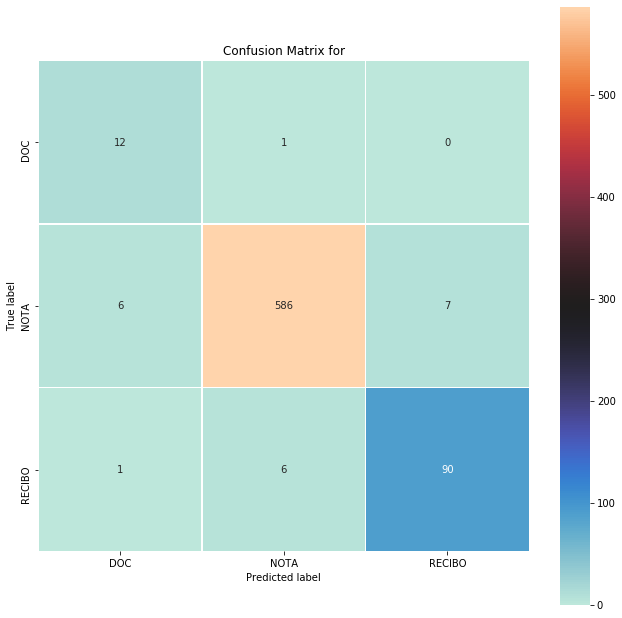

In [606]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [607]:
#Refined decision tree - Extra features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=12345)
dt.get_params().keys()
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

##grid = GridSearchCV(dt, param_grid, cv=5)
##grid.fit(combined_train, train.out)
##print(grid.best_estimator_)

DT_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
dt_pipeline = make_pipeline(RandomOverSampler(random_state=777),DT_best)

dt_model  = dt_pipeline.fit(X_train, y_train)

In [608]:
dt_results = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(dt_results,y_test)

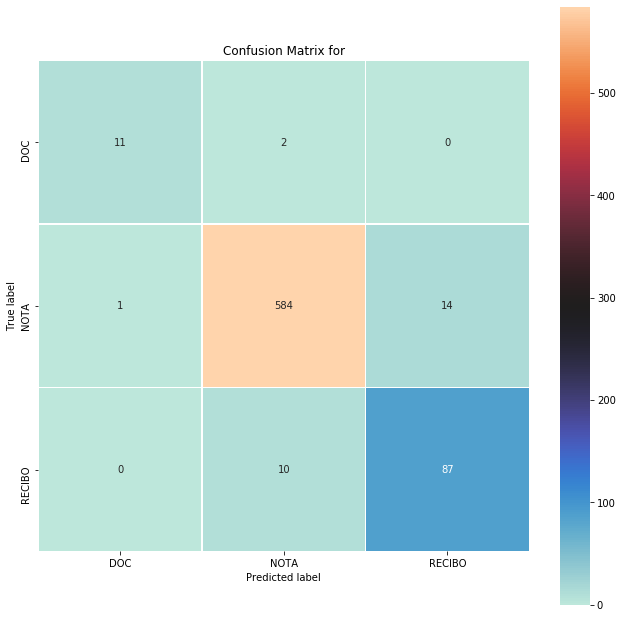

In [609]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [610]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=12345)

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
rf_pipeline = make_pipeline(RandomOverSampler(random_state=777),rf)
rf_model  = rf_pipeline.fit(X_train, y_train)

In [611]:
rf_results = rf_model.predict(X_test)
rf_results_prob = rf_model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(rf_results,y_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [ ]:
print(rf_results_prob)

# Validating with the original file df1

# Joing body text and labels

In [555]:
df = pd.read_csv("C:/AI/krypton-01/jpeg/revisado3.csv") 
##df =df.head(10000) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    3543 non-null   object
 1   tipo    3543 non-null   object
dtypes: object(2)
memory usage: 55.5+ KB


In [556]:
df5 = pd.DataFrame (columns = ['body','label','name','label1'])

In [557]:
from os import listdir
from os.path import isfile, join
mypath1="C:/AI/Krypton-01/texto4"
onlyfiles1 = [f for f in listdir(mypath1) if isfile(join(mypath1, f))]
print(len(onlyfiles1))
#print(onlyfiles1)

393


In [558]:
for file1 in onlyfiles1:
    #print(file1[-3:])
    #print(file1)
    #print(file1[:-4])
    if file1[-3:]=="txt":
        print(file1)
        text1 = open('C:/AI/krypton-01/texto4/'+file1, "r+",encoding = 'utf-8-sig').read()
        df2 = pd.DataFrame([[text1, "",file1[:-4],""]], columns = ['body','label','name','label1'])
        df5=df5.append(df2)
        df5.reset_index(inplace = True, drop = True)

2018-01-03_16-26_3687490.txt
2018-01-03_16-26_4703491.txt
2018-01-03_16-26_5524444.txt
2018-01-03_16-26_6231938.txt
2018-01-03_16-27_5976388.txt
2018-02-28_17-18_9989703.txt
2018-03-01_10-17_3132133.txt
2018-03-02_10-01_2736574.txt
2018-03-28_14-31_8622216.txt
2018-03-28_14-38_7547926.txt
2018-04-03_09-31_2771237.txt
2018-04-04_12-55_8373498.txt
2018-04-04_13-06_1440297.txt
2018-04-20_17-01_9523594.txt
2018-04-30_15-35_2921528.txt
2018-04-30_17-01_1797878.txt
2018-06-07_11-05_9763679.txt
2018-06-07_13-40_4636502.txt
2018-06-08_08-38_7070374.txt
2018-06-19_15-24_7898558.txt
2018-07-02_15-30_7991822.txt
2018-07-11_17-31_3900563.txt
2018-07-11_17-31_4230133.txt
2018-07-16_11-25_7904157.txt
2018-07-17_16-34_3053226.txt
2018-08-09_13-26_7969628.txt
2018-08-23_12-19_8864061.txt
2018-08-23_17-24_4325695.txt
2018-08-27_16-48_E_1314_2994433.txt
2018-09-03_16-27_8705581.txt
2018-09-21_14-46_2421773.txt
2018-09-25_10-45_E_1314_4140401.txt
2018-09-25_10-47_E_1314_4577560.txt
2018-09-25_10-49_E_131

2019-04-02_13-55-35-1554224135_E_1421_5228515.txt
2019-04-02_13-55-35-1554224135_E_1421_6616554.txt
2019-04-02_13-55-50-1554224150_E_1421_3264066.txt
2019-04-02_14-53-49-1554227629_E_1421_5043661.txt
2019-04-02_14-54-08-1554227648_E_1421_9926159.txt
2019-04-02_14-54-20-1554227660_E_1421_5384393.txt
2019-04-03_16-00-14-1554318014_I_158_1930363.txt
2019-04-03_16-00-14-1554318014_I_158_4682641.txt
2019-04-03_16-00-14-1554318014_I_158_7930046.txt
2019-04-03_16-00-14-1554318014_I_158_8149713.txt
2019-04-03_16-00-14-1554318014_I_158_8416949.txt
2019-04-03_16-00-14-1554318014_I_158_8888174.txt
2019-04-03_16-00-14-1554318014_I_158_9477807.txt
2019-04-03_16-00-14-1554318014_I_158_9947377.txt
2019-04-03_16-00-15-1554318015_I_158_3743417.txt
2019-04-03_16-00-15-1554318015_I_158_5345545.txt
2019-04-03_16-00-15-1554318015_I_158_9570740.txt
2019-04-05_08-35-02-1554464102_I_158_2380350.txt
2019-04-05_08-35-02-1554464102_I_158_3857353.txt
2019-04-05_08-35-02-1554464102_I_158_5758172.txt
2019-04-09_16-

2019-06-26_10-35-15-1561556115_I_158_6562012.txt
2019-06-26_10-37-15-1561556235_I_158_5820145.txt
2019-06-26_10-37-16-1561556236_I_158_8588339.txt
2019-06-26_11-02-22-1561557742_I_158_5818815.txt
2019-06-27_10-50-54-1561643454_E_1314_7593164.txt
2019-06-27_10-56-56-1561643816_E_1314_1630944.txt
2019-06-27_11-00_CP_E_1314__5080130.txt
2019-06-27_16-27-53-1561663673_E_2007_2119707.txt
2019-06-27_16-33-48-1561664028_E_1421_1117341.txt
2019-06-27_16-39-49-1561664389_E_2007_2396771.txt
2019-06-28_13-19-58-1561738798_E_1421_1320953.txt
2019-07-01_14-08-33-1562000913_E_1421_6164334.txt
2019-07-01_14-08-33-1562000913_E_1421_8608408.txt
2019-07-01_14-08-33-1562000913_E_1421_9128101.txt
2019-07-02_08-31-06-1562067066_E_2007_9067506.txt
2019-07-02_10-20-08-1562073608_E_2007_5256827.txt
2019-07-03_14-01-35-1562173295_E_2007_6571756.txt
2019-07-03_14-09-28-1562173768_E_2007_5610601.txt
2019-07-03_14-18-50-1562174330_E_2007_4608740.txt
2019-07-03_14-18-50-1562174330_E_2007_6036370.txt
2019-07-03_14-

In [559]:
df5

,body,label,name,label1
0,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-26_3687490,
1,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-26_4703491,
2,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-26_5524444,
3,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-26_6231938,
4,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,,2018-01-03_16-27_5976388,
...,...,...,...,...
388,PREFEITURA MUNICIPAL DE CONTAGEM Número da\nSE...,,2019-07-05_11-35-48-1562337348_E_2007_3700020,
389,NFS-e - NOTA FISCAL DE SERVIÇOS ELETRÔNICA\n\n...,,2019-07-05_16-13-02-1562353982_E_1421_5345669,
390,PREFEITURA DA CIDADE DO RIO DE JANEIRO “00151 ...,,2019-07-05_16-33-02-1562355182_E_2007_1558707,
391,"VERDE FERTILIZANTES LTDA\nROD LMG 764, KM 22\n...",,2019-07-05_16-52-20-1562356340_I_158_8879165,


In [560]:
len1=len(df)
len2=len(df5)
for i in range(len1):
    label1x=df['tipo'][i]
    file1x=df['nome'][i]
    
    for i1 in range(len2):
        file2x=df5['name'][i1]
    
        if file1x==file2x:
            print(file1x)
            print(file2x)
            df5['label'][i1]=label1x
            if df5['label'][i1]=='NOTA':
                df5['label1'][i1]=0
            if df5['label'][i1]=='DOC':
                df5['label1'][i1]=1
            if df5['label'][i1]=='RECIBO':
                df5['label1'][i1]=2

2018-01-03_16-26_3687490
2018-01-03_16-26_3687490
2018-01-03_16-26_4703491
2018-01-03_16-26_4703491
2018-01-03_16-26_5524444
2018-01-03_16-26_5524444
2018-01-03_16-26_6231938
2018-01-03_16-26_6231938
2018-01-03_16-27_5976388
2018-01-03_16-27_5976388
2018-02-28_17-18_9989703
2018-02-28_17-18_9989703
2018-03-02_10-01_2736574
2018-03-02_10-01_2736574
2018-03-28_14-31_8622216
2018-03-28_14-31_8622216
2018-04-03_09-31_2771237
2018-04-03_09-31_2771237
2018-04-04_12-55_8373498
2018-04-04_12-55_8373498
2018-04-04_13-06_1440297
2018-04-04_13-06_1440297
2018-04-20_17-01_9523594
2018-04-20_17-01_9523594
2018-04-30_15-35_2921528
2018-04-30_15-35_2921528
2018-06-07_11-05_9763679
2018-06-07_11-05_9763679
2018-06-08_08-38_7070374
2018-06-08_08-38_7070374
2018-06-19_15-24_7898558
2018-06-19_15-24_7898558
2018-07-02_15-30_7991822
2018-07-02_15-30_7991822
2018-07-11_17-31_3900563
2018-07-11_17-31_3900563
2018-07-11_17-31_4230133
2018-07-11_17-31_4230133
2018-07-16_11-25_7904157
2018-07-16_11-25_7904157


2019-03-11_08-45-56-1552304756_E_1314_4955564
2019-03-11_08-45-56-1552304756_E_1314_4955564
2019-03-11_08-45-56-1552304756_E_1314_6307939
2019-03-11_08-45-56-1552304756_E_1314_6307939
2019-03-11_08-45-56-1552304756_E_1314_7002355
2019-03-11_08-45-56-1552304756_E_1314_7002355
2019-03-11_08-45-56-1552304756_E_1314_8364691
2019-03-11_08-45-56-1552304756_E_1314_8364691
2019-03-11_08-45-56-1552304756_E_1314_8917862
2019-03-11_08-45-56-1552304756_E_1314_8917862
2019-03-11_08-53-50-1552305230_E_1314_1369510
2019-03-11_08-53-50-1552305230_E_1314_1369510
2019-03-11_08-53-50-1552305230_E_1314_1806091
2019-03-11_08-53-50-1552305230_E_1314_1806091
2019-03-11_08-53-50-1552305230_E_1314_4043270
2019-03-11_08-53-50-1552305230_E_1314_4043270
2019-03-11_08-53-50-1552305230_E_1314_4390049
2019-03-11_08-53-50-1552305230_E_1314_4390049
2019-03-11_08-53-50-1552305230_E_1314_5075073
2019-03-11_08-53-50-1552305230_E_1314_5075073
2019-03-11_08-53-50-1552305230_E_1314_5495991
2019-03-11_08-53-50-1552305230_E_1

2019-05-06_14-03-26-1557162206_E_2007_8892151
2019-05-06_14-03-26-1557162206_E_2007_8892151
2019-05-06_16-33-53-1557171233_E_2007_1894377
2019-05-06_16-33-53-1557171233_E_2007_1894377
2019-05-06_16-33-53-1557171233_E_2007_2973434
2019-05-06_16-33-53-1557171233_E_2007_2973434
2019-05-06_16-33-53-1557171233_E_2007_5640018
2019-05-06_16-33-53-1557171233_E_2007_5640018
2019-05-06_16-33-53-1557171233_E_2007_6196672
2019-05-06_16-33-53-1557171233_E_2007_6196672
2019-05-06_16-33-53-1557171233_E_2007_6363574
2019-05-06_16-33-53-1557171233_E_2007_6363574
2019-05-06_16-33-53-1557171233_E_2007_7152781
2019-05-06_16-33-53-1557171233_E_2007_7152781
2019-05-09_10-55-56-1557410156_E_2007_2687871
2019-05-09_10-55-56-1557410156_E_2007_2687871
2019-05-09_10-55-56-1557410156_E_2007_4906144
2019-05-09_10-55-56-1557410156_E_2007_4906144
2019-05-09_10-55-56-1557410156_E_2007_7010728
2019-05-09_10-55-56-1557410156_E_2007_7010728
2019-05-09_11-27-35-1557412055_E_2007_1492514
2019-05-09_11-27-35-1557412055_E_2

2019-06-26_10-31-54-1561555914_I_158_6896698
2019-06-26_10-32-34-1561555954_I_158_2049616
2019-06-26_10-32-34-1561555954_I_158_2049616
2019-06-26_10-32-35-1561555955_I_158_2410231
2019-06-26_10-32-35-1561555955_I_158_2410231
2019-06-26_10-32-35-1561555955_I_158_7506832
2019-06-26_10-32-35-1561555955_I_158_7506832
2019-06-26_10-33-12-1561555992_I_158_2442558
2019-06-26_10-33-12-1561555992_I_158_2442558
2019-06-26_10-33-12-1561555992_I_158_5104116
2019-06-26_10-33-12-1561555992_I_158_5104116
2019-06-26_10-33-12-1561555992_I_158_6836352
2019-06-26_10-33-12-1561555992_I_158_6836352
2019-06-26_10-33-12-1561555992_I_158_7304506
2019-06-26_10-33-12-1561555992_I_158_7304506
2019-06-26_10-33-54-1561556034_I_158_3504289
2019-06-26_10-33-54-1561556034_I_158_3504289
2019-06-26_10-33-54-1561556034_I_158_4982847
2019-06-26_10-33-54-1561556034_I_158_4982847
2019-06-26_10-33-54-1561556034_I_158_8229831
2019-06-26_10-33-54-1561556034_I_158_8229831
2019-06-26_10-34-31-1561556071_I_158_7242434
2019-06-26

In [561]:
df5

,body,label,name,label1
0,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_3687490,0
1,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_4703491,0
2,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_5524444,0
3,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_6231938,0
4,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-27_5976388,0
...,...,...,...,...
388,PREFEITURA MUNICIPAL DE CONTAGEM Número da\nSE...,NOTA,2019-07-05_11-35-48-1562337348_E_2007_3700020,0
389,NFS-e - NOTA FISCAL DE SERVIÇOS ELETRÔNICA\n\n...,NOTA,2019-07-05_16-13-02-1562353982_E_1421_5345669,0
390,PREFEITURA DA CIDADE DO RIO DE JANEIRO “00151 ...,NOTA,2019-07-05_16-33-02-1562355182_E_2007_1558707,0
391,"VERDE FERTILIZANTES LTDA\nROD LMG 764, KM 22\n...",,2019-07-05_16-52-20-1562356340_I_158_8879165,


In [562]:
df5 = df5[((df5['label']) != "")]
df5
df5.reset_index(inplace = True, drop = True)

In [563]:
df5

,body,label,name,label1
0,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_3687490,0
1,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_4703491,0
2,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_5524444,0
3,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-26_6231938,0
4,:: NFS-e - Nota Fiscal de Serviços eletrônica ...,NOTA,2018-01-03_16-27_5976388,0
...,...,...,...,...
351,DECLARO QUE RECEBI OS SERVIÇOS DESTE CONHECIME...,NOTA,2019-07-05_11-32-24-1562337144_E_2007_9856443,0
352,PREFEITURA MUNICIPAL DE CONTAGEM Número da\nSE...,NOTA,2019-07-05_11-35-48-1562337348_E_2007_3700020,0
353,NFS-e - NOTA FISCAL DE SERVIÇOS ELETRÔNICA\n\n...,NOTA,2019-07-05_16-13-02-1562353982_E_1421_5345669,0
354,PREFEITURA DA CIDADE DO RIO DE JANEIRO “00151 ...,NOTA,2019-07-05_16-33-02-1562355182_E_2007_1558707,0


In [564]:
df5['label'].value_counts()[:50]

NOTA      338
RECIBO     12
DOC         6
Name: label, dtype: int64

In [565]:
# apply clean function to body
for i in range(len(df5)):
      df5["body"][i]= clean(str(df5["body"][i]))
      print(i,df5['name'][i])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0 2018-01-03_16-26_3687490
1 2018-01-03_16-26_4703491
2 2018-01-03_16-26_5524444
3 2018-01-03_16-26_6231938
4 2018-01-03_16-27_5976388
5 2018-02-28_17-18_9989703
6 2018-03-02_10-01_2736574
7 2018-03-28_14-31_8622216
8 2018-04-03_09-31_2771237
9 2018-04-04_12-55_8373498
10 2018-04-04_13-06_1440297
11 2018-04-20_17-01_9523594
12 2018-04-30_15-35_2921528
13 2018-06-07_11-05_9763679
14 2018-06-08_08-38_7070374
15 2018-06-19_15-24_7898558
16 2018-07-02_15-30_7991822
17 2018-07-11_17-31_3900563
18 2018-07-11_17-31_4230133
19 2018-07-16_11-25_7904157
20 2018-07-17_16-34_3053226
21 2018-08-09_13-26_7969628
22 2018-08-23_12-19_8864061
23 2018-08-23_17-24_4325695
24 2018-08-27_16-48_E_1314_2994433
25 2018-09-03_16-27_8705581
26 2018-09-21_14-46_2421773
27 2018-10-03_16-47_E_1314_1729470
28 2018-10-19_16-46_CP_I_728__4232674
29 2018-11-22_15-02_CP_I_728__6316307
30 2018-12-20_10-52-57-1545310377_CP_I_986_5145704
31 2018-12-28_10-14-44-1545999284_E_1421_7212959
32 2018-12-28_10-14-44-1545999284_E_

195 2019-05-02_15-34-37-1556822077_E_1421_2553097
196 2019-05-02_15-34-37-1556822077_E_1421_4112820
197 2019-05-03_12-36-28-1556897788_E_1970_9998146
198 2019-05-03_12-36-29-1556897789_E_1970_5776604
199 2019-05-03_12-36-32-1556897792_E_1970_8215664
200 2019-05-03_12-36-33-1556897793_E_1970_5891631
201 2019-05-03_12-36-33-1556897793_E_1970_6734682
202 2019-05-03_12-36-34-1556897794_E_1970_3707255
203 2019-05-03_12-36-35-1556897795_E_1970_1750459
204 2019-05-03_12-36-35-1556897795_E_1970_6056129
205 2019-05-06_14-03-26-1557162206_E_2007_8892151
206 2019-05-06_16-33-53-1557171233_E_2007_1894377
207 2019-05-06_16-33-53-1557171233_E_2007_2973434
208 2019-05-06_16-33-53-1557171233_E_2007_5640018
209 2019-05-06_16-33-53-1557171233_E_2007_6196672
210 2019-05-06_16-33-53-1557171233_E_2007_6363574
211 2019-05-06_16-33-53-1557171233_E_2007_7152781
212 2019-05-09_10-55-56-1557410156_E_2007_2687871
213 2019-05-09_10-55-56-1557410156_E_2007_4906144
214 2019-05-09_10-55-56-1557410156_E_2007_7010728


In [566]:
df5

,body,label,name,label1
0,NFS E NOTA FISCAL DE SERVI OS ELETR NICA P GI...,NOTA,2018-01-03_16-26_3687490,0
1,NFS E NOTA FISCAL DE SERVI OS ELETR NICA P GI...,NOTA,2018-01-03_16-26_4703491,0
2,NFS E NOTA FISCAL DE SERVI OS ELETR NICA P GI...,NOTA,2018-01-03_16-26_5524444,0
3,NFS E NOTA FISCAL DE SERVI OS ELETR NICA P GI...,NOTA,2018-01-03_16-26_6231938,0
4,NFS E NOTA FISCAL DE SERVI OS ELETR NICA P GI...,NOTA,2018-01-03_16-27_5976388,0
...,...,...,...,...
351,DECLARO QUE RECEBI OS SERVI OS DESTE CONHECIME...,NOTA,2019-07-05_11-32-24-1562337144_E_2007_9856443,0
352,PREFEITURA MUNICIPAL DE CONTAGEM N MERO DA\nSE...,NOTA,2019-07-05_11-35-48-1562337348_E_2007_3700020,0
353,NFS E NOTA FISCAL DE SERVI OS ELETR NICA EMITI...,NOTA,2019-07-05_16-13-02-1562353982_E_1421_5345669,0
354,PREFEITURA DA CIDADE DO RIO DE JANEIRO SECRETA...,NOTA,2019-07-05_16-33-02-1562355182_E_2007_1558707,0


In [567]:
# apply clean function to body
len5 = len(df5)
for i in range(len5):
    #print(i)
    #zz= clean1(str(df3["body"][i]))
    df5["body"][i]= clean1(str(df5["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [568]:
df5

,body,label,name,label1
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA GIN...,NOTA,2018-01-03_16-26_3687490,0
1,NFS NOTA FISCAL DE SERVI OS ELETR NICA GIN...,NOTA,2018-01-03_16-26_4703491,0
2,NFS NOTA FISCAL DE SERVI OS ELETR NICA GIN...,NOTA,2018-01-03_16-26_5524444,0
3,NFS NOTA FISCAL DE SERVI OS ELETR NICA GIN...,NOTA,2018-01-03_16-26_6231938,0
4,NFS NOTA FISCAL DE SERVI OS ELETR NICA GIN...,NOTA,2018-01-03_16-27_5976388,0
...,...,...,...,...
351,DECLARO QUE RECEBI OS SERVI OS DESTE CONHECIM...,NOTA,2019-07-05_11-32-24-1562337144_E_2007_9856443,0
352,PREFEITURA MUNICIPAL DE CONTAGEM MERO DA SEC...,NOTA,2019-07-05_11-35-48-1562337348_E_2007_3700020,0
353,NFS NOTA FISCAL DE SERVI OS ELETR NICA EMITI...,NOTA,2019-07-05_16-13-02-1562353982_E_1421_5345669,0
354,PREFEITURA DA CIDADE DO RIO DE JANEIRO SECRET...,NOTA,2019-07-05_16-33-02-1562355182_E_2007_1558707,0


In [570]:
# apply clean function to body
len5 = len(df5)
for i in range(len5):
    #print(i)
    #zz= clean1(str(df3["body"][i]))
    df5["body"][i]= clean2(str(df5["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

In [571]:
df5

,body,label,name,label1
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2018-01-03_16-26_3687490,0
1,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2018-01-03_16-26_4703491,0
2,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2018-01-03_16-26_5524444,0
3,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2018-01-03_16-26_6231938,0
4,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,NOTA,2018-01-03_16-27_5976388,0
...,...,...,...,...
351,QUE RECEBI OS SERVI OS DESTE CONHECIMENTO E...,NOTA,2019-07-05_11-32-24-1562337144_E_2007_9856443,0
352,PREFEITURA MUNICIPAL DE CONTAGEM MERO DA SEC...,NOTA,2019-07-05_11-35-48-1562337348_E_2007_3700020,0
353,NFS NOTA FISCAL DE SERVI OS ELETR NICA EMITI...,NOTA,2019-07-05_16-13-02-1562353982_E_1421_5345669,0
354,PREFEITURA DA CIDADE DO RIO DE JANEIRO SECRE...,NOTA,2019-07-05_16-33-02-1562355182_E_2007_1558707,0


In [572]:
X = tfidfconverter.fit_transform(df3['body']).toarray()

In [573]:
df3

,body,label,name,label1
0,OM HEO HH AN MM NM UM MM MW UW QU OM IQH M...,NOTA,2019-04-02_13-55-35-1554224135_E_1421_5228515-0,0
1,PREFEITURA MUNICIPAL DE FORTALEZA MERO DA WE...,NOTA,2019-01-17_14-30-16-1547742616_E_1125_4196168,0
2,NF NOTA FISCAL ELETR NICA DE SERVI OS PAULO ...,NOTA,2018-08-23_16-41_E_1125_6831290,0
3,PREFEITURA DA CIDADE DO RIO DE JANEIRO SECRE...,NOTA,2020-06-30_01-40-40-1593492040_E_2198_1713212,0
4,HR FISAL ART SERVI OS PREFEITURA MUNICIPAL D...,NOTA,2020-09-21_16-27-15-1600716435_E_2307_3657075,0
...,...,...,...,...
1495,BANCO ITA SA RECIBO DO PAGADOR LOCAL DE PAGA...,DOC,2019-05-03_12-36-31-1556897791_E_1970_2102950-3,1
1496,BANCO ITA SA RECIBO DO PAGADOR LOCAL DE PAGA...,DOC,2019-05-03_12-36-37-1556897797_E_1970_8178017-3,1
1497,BANCO BRADESCO HTTPS WWW NE BRADESCONETEMPRE...,DOC,2018-09-25_10-47_E_1314_4577560-0,1
1498,BANCO BRADESCO HTTPS WWW NE BRADESCONETEMPRE...,DOC,2018-09-25_10-47_E_1314_4577560-0,1


In [574]:
#Refined decision tree - Extra features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=12345)
dt.get_params().keys()
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

##grid = GridSearchCV(dt, param_grid, cv=5)
##grid.fit(combined_train, train.out)
##print(grid.best_estimator_)

DT_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
dt_pipeline = make_pipeline(RandomOverSampler(random_state=777),DT_best)

dt_model  = dt_pipeline.fit(X, df3['label'])

In [575]:
tfidfconverter = TfidfVectorizer(max_features=500, min_df=5,max_df=0.7,stop_words=stopwords.words('portuguese'))
X1 = tfidfconverter.fit_transform(df5['body']).toarray()
dt_results1 = dt_model.predict(X1)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(dt_results1,df5['label'])

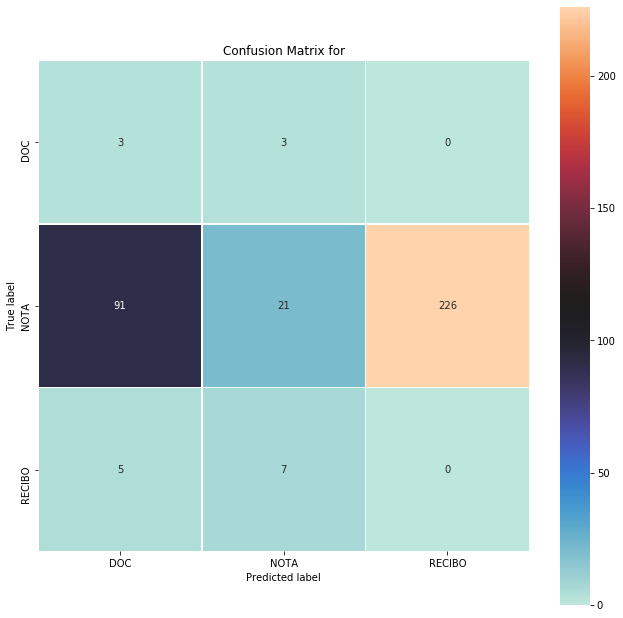

In [576]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [469]:
X1 = tfidfconverter.fit_transform(df1['body']).toarray()

rf_results = rf_model.predict(X1)
rf_results_prob = rf_model.predict_proba(X1)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(rf_results,df1['label'])

In [470]:
df1['label'].value_counts()[:50]

NOTA      338
RECIBO     12
DOC         6
Name: label, dtype: int64

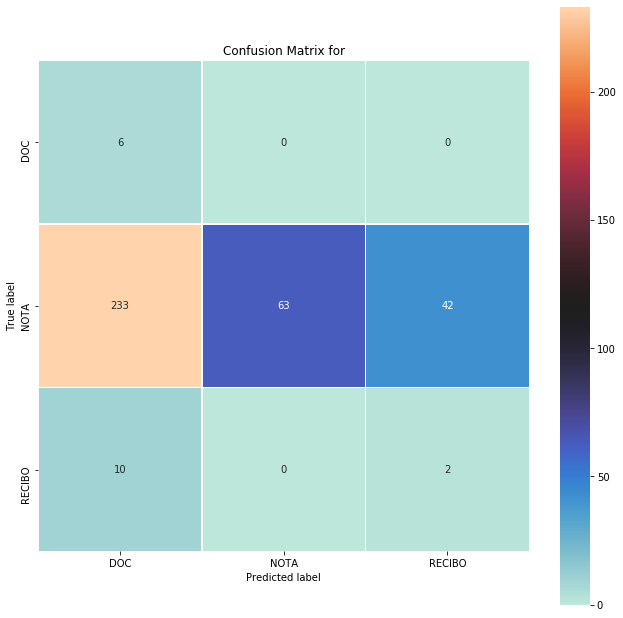

In [471]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [340]:
len3=len(test2)
test2['result1']=""
for i in range(len3):
    test2['result1'][i]=rf_results[i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [341]:
test2[test2['label']!=test2['result1']]

,body,label,name,label1,array,v0,v1,v2,v3,v4,...,v31,v32,v33,v34,v35,v36,v37,v38,v39,result1
17,KRYPTONBPO MM RECIBO DE DO ALUGUEL EFET...,RECIBO,2018-04-30_17-01_1797878-1,2,"[[1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,...",1,1,1,4,1,...,0,0,0,0,0,0,0,0,0,NOTA
42,PREFEITURA MUNICIPAL OE ARAXA SECRETARIA MUN...,NOTA,2018-10-03_16-47_E_1314_1729470,0,"[[1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,...",1,1,1,1,5,...,0,0,0,0,0,0,0,0,0,DOC
59,MPETENC CODFG VERI QJ UNEME ZQNT SLM OOUL NS...,NOTA,2018-12-28_10-14-44-1545999284_E_1421_7212959,0,"[[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,DOC
61,FM FR III RI IF GL SY LGA NR EMITIDA SM CAMP...,NOTA,2018-12-28_10-14-45-1545999285_E_1421_9709237,0,"[[1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,RECIBO
62,NF NOTA FISCAL DE SERVI OS ELETR NICA OFL I...,NOTA,2018-12-28_11-08-44-1546002524_E_1421_9080387,0,"[[1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,...",1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,RECIBO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,QUE RECEBI OS SERVI OS DESTE CONHECIMENTO E...,NOTA,2019-07-05_11-32-24-1562337144_E_2007_9856443,0,"[[1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,RECIBO
430,NFS UOTA FISCAL DE SEVA OS ELERRONICA NO EMM...,NOTA,2019-07-05_16-13-02-1562353982_E_1421_5345669,0,"[[1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,RECIBO
431,MEIRNERE ELE PREFEITURA DA CIDADE DD RID DE...,NOTA,2019-07-05_16-33-02-1562355182_E_2007_1558707,0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,RECIBO
436,NOTA NOTA NUMERO DA NOTA PREFEITURA MUNICIP...,NOTA,2019-07-05_16-52-51-1562356371_I_158_7903569,0,"[[1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,...",1,1,3,1,1,...,0,0,0,0,0,0,0,0,0,RECIBO


In [342]:
dt_results = dt_model.predict(combined_test2)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(dt_results,test2.label)

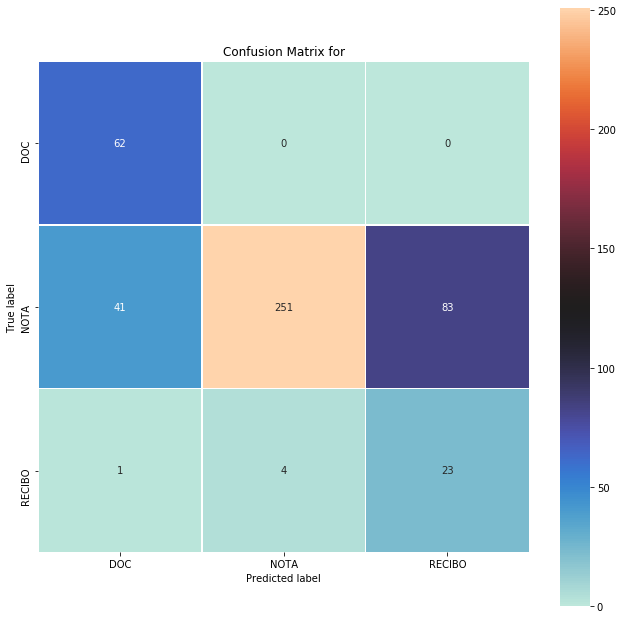

In [343]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

# Classifying the new file

In [345]:
df4=df3
#df3.info()
df4=df4[df4.label == "ALL"]
df4=df4.reindex()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    0 non-null      object
 1   label   0 non-null      object
 2   name    0 non-null      object
 3   label1  0 non-null      object
 4   array   0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [346]:
from os import listdir
from os.path import isfile, join
mypath = 'C:/AI/krypton-01/texto6'
onlyfile1 = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfile1))

3075


In [347]:
for file1 in onlyfile1:
    #print(file1[-3:])
    #print(file1)
    #print(file1[:-4])
    if file1[-3:]=="txt":
        print(file1[:-4])
        text1 = open('C:/AI/krypton-01/texto6/'+file1, "r+",encoding = 'utf-8-sig').read()
        #print(text1)
        df2 = pd.DataFrame([[text1, "",file1[:-4],"",""]], columns = ['body','label','name','label1',"array"])
        #print(df2)
        df4=df4.append(df2)
        df4.reset_index(inplace = True, drop = True)

2017-09-14_11-33_2110779
2017-09-15_14-38_1863933
2017-09-15_14-38_2599686
2017-09-15_14-38_2651021
2017-09-15_14-38_2713927
2017-09-15_14-38_2725904
2017-09-15_14-38_2878777
2017-09-15_14-38_3965392
2017-09-15_14-38_4335964
2017-09-15_14-38_4977766
2017-09-15_14-38_4994884
2017-09-15_14-38_5016288
2017-09-15_14-38_5411977
2017-09-15_14-38_5759170
2017-09-15_14-38_6214744
2017-09-15_14-38_6592846
2017-09-15_14-38_6770033
2017-09-15_14-38_6790576
2017-09-15_14-38_6862756
2017-09-15_14-38_7470138
2017-09-15_14-38_8299805
2017-09-15_14-38_8421961
2017-09-15_14-38_8458388
2017-09-15_14-38_8604518
2017-09-15_14-38_8945728
2017-09-15_14-38_9466414
2017-09-15_14-38_9727707
2017-09-15_15-20_1823400-0
2017-09-15_15-20_1823400-1
2017-09-15_15-20_2383921
2017-09-15_15-20_2697541-0
2017-09-15_15-20_2697541-1
2017-09-15_15-20_8613846
2017-09-15_15-20_9999098-0
2017-09-15_15-20_9999098-1
2017-09-21_16-09_7901415
2017-09-21_16-09_8223148
2017-09-21_16-09_8332740
2017-09-21_16-09_9219526
2017-09-29_13

2018-04-02_11-09_5476537
2018-04-02_11-09_6002208
2018-04-02_11-09_6254929
2018-04-02_11-09_6358151
2018-04-02_11-09_6510914
2018-04-02_11-09_6528018
2018-04-02_11-09_6712866
2018-04-02_11-09_7267017
2018-04-02_11-09_7331546
2018-04-02_11-09_8167124
2018-04-02_11-09_8379584
2018-04-02_11-09_8510355
2018-04-02_11-09_8855745
2018-04-02_11-09_9123504
2018-04-02_11-09_9186309
2018-04-02_11-09_9204519
2018-04-02_11-09_9236037
2018-04-02_11-09_9246609
2018-04-02_11-09_9436671
2018-04-02_11-09_9915615
2018-04-02_11-25_1205726
2018-04-02_11-25_2559384
2018-04-02_11-25_3143162
2018-04-02_11-25_7420594
2018-04-02_11-25_7430868
2018-04-02_11-25_8594627
2018-04-13_17-07_1822208
2018-04-13_17-07_5786870
2018-04-16_09-25_2716943
2018-04-16_09-33_4561158
2018-04-24_16-29_2718623
2018-04-24_16-29_4025783
2018-04-24_16-29_4923761-0
2018-04-24_16-29_4923761-1
2018-04-24_16-29_6225563-0
2018-04-24_16-29_6225563-1
2018-04-24_16-29_7732517-0
2018-04-24_16-29_7732517-1
2018-04-24_16-32_1954647
2018-04-24_16

2018-08-31_17-16_E_1125_7548300
2018-08-31_17-16_E_1125_7555824
2018-08-31_17-16_E_1125_8814721
2018-08-31_17-16_E_1125_9556841
2018-09-28_11-23_E_1125_1257670
2018-09-28_11-23_E_1125_5170496
2018-09-28_11-24_E_1125_1982069
2018-09-28_11-24_E_1125_5434703-0
2018-09-28_11-24_E_1125_5434703-1
2018-09-28_11-24_E_1125_6500365-0
2018-09-28_11-24_E_1125_6500365-1
2018-09-28_11-24_E_1125_6533212
2018-09-28_11-24_E_1125_9839990-0
2018-09-28_11-24_E_1125_9839990-1
2018-09-28_11-34_E_1125_6249922
2018-09-28_11-34_E_1125_9709630
2018-09-28_11-34_E_1125_9966113
2018-09-28_11-37_E_1125_1408260
2018-09-28_11-37_E_1125_3320927
2018-09-28_11-37_E_1125_3877916
2018-09-28_11-37_E_1125_4901922
2018-09-28_11-37_E_1125_5690727
2018-09-28_11-37_E_1125_5900154
2018-09-28_11-37_E_1125_6478456
2018-09-28_11-37_E_1125_8065807
2018-09-28_11-37_E_1125_9215805
2018-09-28_11-45_E_1125_6004908
2018-09-28_11-52_E_1125_2671162
2018-09-28_11-52_E_1125_7596659
2018-09-28_11-53_E_1125_7203401
2018-09-28_11-54_E_1125_2032

2018-12-21_13-51-52-1545407512_E_1125_8142450
2018-12-21_13-51-52-1545407512_E_1125_9523432
2018-12-21_14-13-36-1545408816_E_1125_7131183
2018-12-21_14-13-37-1545408817_E_1125_1463814
2018-12-21_14-13-37-1545408817_E_1125_2823257
2018-12-21_14-13-37-1545408817_E_1125_2887178
2018-12-21_14-13-37-1545408817_E_1125_3166623
2018-12-21_14-13-37-1545408817_E_1125_3280602
2018-12-21_14-13-37-1545408817_E_1125_4554845
2018-12-21_14-13-37-1545408817_E_1125_5381635
2018-12-21_14-13-37-1545408817_E_1125_9946307
2018-12-21_14-14-22-1545408862_E_1125_1258786
2018-12-21_14-14-22-1545408862_E_1125_1400718
2018-12-21_14-14-22-1545408862_E_1125_3135256
2018-12-21_14-14-22-1545408862_E_1125_4396670
2018-12-21_14-14-22-1545408862_E_1125_4753380
2018-12-21_14-14-22-1545408862_E_1125_4980509
2018-12-21_14-14-22-1545408862_E_1125_5218489
2018-12-21_14-14-22-1545408862_E_1125_5276494
2018-12-21_14-14-22-1545408862_E_1125_5584176
2018-12-21_14-14-22-1545408862_E_1125_6081415
2018-12-21_14-14-22-1545408862_E_1

2019-02-26_11-39-09-1551191949_E_1125_2531167
2019-02-26_11-39-09-1551191949_E_1125_3802367
2019-02-26_11-39-09-1551191949_E_1125_5206776
2019-02-26_11-39-09-1551191949_E_1125_8901308
2019-02-26_11-39-40-1551191980_E_1125_1603166
2019-02-26_11-40-22-1551192022_E_1125_1089603
2019-02-26_11-40-22-1551192022_E_1125_1964552
2019-02-26_11-40-22-1551192022_E_1125_2079764
2019-02-26_11-40-22-1551192022_E_1125_2103231
2019-02-26_11-40-22-1551192022_E_1125_2555278
2019-02-26_11-40-22-1551192022_E_1125_3068465
2019-02-26_11-40-22-1551192022_E_1125_4632276
2019-02-26_11-40-22-1551192022_E_1125_4748924
2019-02-26_11-40-22-1551192022_E_1125_6357868
2019-02-26_11-40-22-1551192022_E_1125_6443726
2019-02-26_11-40-22-1551192022_E_1125_7869490
2019-02-26_11-40-22-1551192022_E_1125_7886761
2019-02-26_11-40-22-1551192022_E_1125_7904291
2019-02-26_11-40-22-1551192022_E_1125_8327641
2019-02-26_11-41-36-1551192096_E_1125_1856400
2019-02-26_11-41-36-1551192096_E_1125_2181402
2019-02-26_11-41-36-1551192096_E_1

2019-05-02_15-14-11-1556820851_E_1056_3581617
2019-05-02_15-14-11-1556820851_E_1056_5330610
2019-05-02_15-14-11-1556820851_E_1056_5756339
2019-05-02_15-14-11-1556820851_E_1056_5993905
2019-05-02_15-14-11-1556820851_E_1056_6266450
2019-05-02_15-14-11-1556820851_E_1056_6390868
2019-05-02_15-14-11-1556820851_E_1056_6769183
2019-05-02_15-14-11-1556820851_E_1056_7066997
2019-05-02_15-14-11-1556820851_E_1056_7416321
2019-05-02_15-14-11-1556820851_E_1056_8371379
2019-05-02_15-14-11-1556820851_E_1056_8456056
2019-05-02_15-14-11-1556820851_E_1056_8632108
2019-05-02_15-14-11-1556820851_E_1056_8656144
2019-05-02_15-14-11-1556820851_E_1056_9050072
2019-05-02_15-14-11-1556820851_E_1056_9184901
2019-05-02_15-14-11-1556820851_E_1056_9334987
2019-05-02_15-14-11-1556820851_E_1056_9806761
2019-05-02_15-14-12-1556820852_E_1056_2200894
2019-05-02_15-14-12-1556820852_E_1056_2363247
2019-05-02_15-14-12-1556820852_E_1056_2496244
2019-05-02_15-14-12-1556820852_E_1056_3395442
2019-05-02_15-14-12-1556820852_E_1

2019-06-27_17-12-13-1561666333_E_1125_7747858
2019-06-27_17-14-23-1561666463_E_1125_1299159
2019-06-27_17-14-23-1561666463_E_1125_3856718
2019-06-27_17-14-23-1561666463_E_1125_7721498
2019-06-27_17-14-24-1561666464_E_1125_6209246
2019-06-27_17-18-18-1561666698_E_1125_1216781
2019-06-27_17-18-18-1561666698_E_1125_3565079
2019-06-27_17-18-18-1561666698_E_1125_4176124
2019-06-27_17-21-37-1561666897_E_1125_3294525
2019-06-27_17-21-37-1561666897_E_1125_4176691
2019-06-27_17-21-37-1561666897_E_1125_4643234
2019-06-27_17-21-37-1561666897_E_1125_5507036
2019-06-27_17-21-37-1561666897_E_1125_7124520
2019-06-27_17-21-37-1561666897_E_1125_7698567
2019-06-27_17-21-37-1561666897_E_1125_9644714
2019-06-27_17-21-37-1561666897_E_1125_9650770
2019-06-27_17-29-07-1561667347_E_1125_3475875
2019-06-27_17-29-56-1561667396_E_1125_3011321
2019-06-27_17-29-56-1561667396_E_1125_5200882
2019-06-27_17-31-20-1561667480_E_1125_7111636
2019-06-27_17-32-19-1561667539_E_1125_4641745
2019-06-27_17-32-19-1561667539_E_1

2019-08-26_13-57-18-1566838638_E_1125_3137911
2019-08-26_13-57-18-1566838638_E_1125_5191052
2019-08-26_13-57-18-1566838638_E_1125_8271630
2019-08-26_14-16-24-1566839784_E_1125_2145907
2019-08-26_14-16-24-1566839784_E_1125_8082109
2019-08-26_14-18-21-1566839901_E_1125_1875083
2019-08-26_14-18-21-1566839901_E_1125_3196539
2019-08-26_14-18-21-1566839901_E_1125_6398885
2019-08-26_14-20-13-1566840013_E_1125_2879798
2019-08-26_14-22-04-1566840124_E_1125_3212861
2019-08-26_14-25-45-1566840345_E_1125_5313100
2019-08-26_14-25-45-1566840345_E_1125_7708073
2019-08-26_14-28-19-1566840499_E_1125_1174263
2019-08-26_14-28-19-1566840499_E_1125_5289513
2019-08-26_14-28-19-1566840499_E_1125_6712091
2019-08-26_14-30-42-1566840642_E_1125_2248035
2019-08-26_14-30-42-1566840642_E_1125_8356908
2019-08-26_14-30-42-1566840642_E_1125_8706027
2019-08-26_14-32-38-1566840758_E_1125_1987431
2019-08-26_14-32-38-1566840758_E_1125_3925665
2019-08-26_14-32-38-1566840758_E_1125_5579206
2019-08-26_14-46-29-1566841589_E_1

2019-10-29_17-16-00-1572380160_E_1125_3827395
2019-10-29_17-16-00-1572380160_E_1125_9362211
2019-10-29_17-17-39-1572380259_E_1125_6216379
2019-10-29_17-17-39-1572380259_E_1125_6403908
2019-10-29_17-24-09-1572380649_E_1125_1600958
2019-10-29_17-32-31-1572381151_E_1125_3227800
2019-10-29_17-32-31-1572381151_E_1125_7052735
2019-10-29_17-32-31-1572381151_E_1125_8981549
2019-10-29_17-34-22-1572381262_E_1125_3101948
2019-10-29_17-34-22-1572381262_E_1125_7641030
2019-10-29_17-34-22-1572381262_E_1125_9961301
2019-10-29_17-38-36-1572381516_E_1125_7960780
2019-10-29_17-38-36-1572381516_E_1125_8135441
2019-10-30_15-38-30-1572460710_E_1125_9594093
2019-10-30_15-38-31-1572460711_E_1125_8074244
2019-10-30_15-38-33-1572460713_E_1125_4030515-0
2019-10-30_15-38-33-1572460713_E_1125_4030515-1
2019-10-30_15-38-33-1572460713_E_1125_8296276-0
2019-10-30_15-38-33-1572460713_E_1125_8296276-1
2019-10-30_15-38-34-1572460714_E_1125_3378953-0
2019-10-30_15-38-34-1572460714_E_1125_3378953-1
2019-10-30_15-47-33-15

2019-11-29_17-54-53-1575060893_E_1125_2126568
2019-11-29_17-54-53-1575060893_E_1125_2263853
2019-11-29_17-54-53-1575060893_E_1125_4980000
2019-11-29_17-54-53-1575060893_E_1125_5395579
2019-11-29_17-54-53-1575060893_E_1125_7073241
2019-11-29_17-54-53-1575060893_E_1125_7736312
2019-11-29_17-54-53-1575060893_E_1125_8388115
2019-11-29_17-54-54-1575060894_E_1125_1130040
2019-11-29_17-54-54-1575060894_E_1125_2532528
2019-11-29_17-54-54-1575060894_E_1125_4387618
2019-11-29_17-54-54-1575060894_E_1125_5139450
2019-11-29_17-54-54-1575060894_E_1125_7393798
2019-11-29_17-54-54-1575060894_E_1125_7982206
2019-11-29_17-54-54-1575060894_E_1125_8653365
2019-11-29_17-54-55-1575060895_E_1125_2359590
2019-11-29_17-54-55-1575060895_E_1125_2709159
2019-11-29_17-54-55-1575060895_E_1125_9194745
2019-11-29_17-54-56-1575060896_E_1125_1158009
2019-11-29_17-54-56-1575060896_E_1125_2694866
2019-11-29_17-54-56-1575060896_E_1125_3362766
2019-11-29_17-54-56-1575060896_E_1125_4489056
2019-11-29_17-54-56-1575060896_E_1

2019-12-27_17-59-03-1577480343_E_1125_8828022
2019-12-27_17-59-04-1577480344_E_1125_1247692
2019-12-27_17-59-04-1577480344_E_1125_2728274
2019-12-27_17-59-04-1577480344_E_1125_2832188
2019-12-27_17-59-04-1577480344_E_1125_2854493
2019-12-27_17-59-04-1577480344_E_1125_3231303
2019-12-27_17-59-04-1577480344_E_1125_5953523
2019-12-27_17-59-04-1577480344_E_1125_6160058
2019-12-27_17-59-04-1577480344_E_1125_6622792
2019-12-27_17-59-04-1577480344_E_1125_9202378
2019-12-27_18-24-48-1577481888_E_1125_5415867
2020-01-03_14-54-13-1578074053_E_1125_1105923
2020-01-03_14-54-31-1578074071_E_1125_8702801
2020-01-06_09-43-35-1578314615_E_1125_1494820
2020-01-06_09-55-19-1578315319_E_1125_5989694
2020-01-06_09-55-19-1578315319_E_1125_6027730
2020-01-30_09-20-50-1580386850_E_1125_3287372
2020-01-30_09-20-50-1580386850_E_1125_4786673-0
2020-01-30_09-20-50-1580386850_E_1125_4786673-1
2020-01-30_09-20-50-1580386850_E_1125_9872074
2020-01-30_09-20-51-1580386851_E_1125_3085313-0
2020-01-30_09-20-51-15803868

2020-02-21_17-40-36-1582317636_E_1125_3670299
2020-02-21_17-40-36-1582317636_E_1125_8655694
2020-02-21_17-40-54-1582317654_E_1125_8740315
2020-02-21_17-40-55-1582317655_E_1125_1248230
2020-02-21_17-40-55-1582317655_E_1125_3120799
2020-02-21_17-40-55-1582317655_E_1125_3553156
2020-02-21_17-41-14-1582317674_E_1125_1928731
2020-02-21_17-41-14-1582317674_E_1125_3395040
2020-02-21_17-41-14-1582317674_E_1125_6917499
2020-02-21_17-41-15-1582317675_E_1125_8498237
2020-02-27_17-11-13-1582834273_E_1125_4901814-0
2020-02-27_17-11-13-1582834273_E_1125_4901814-1
2020-02-27_17-11-13-1582834273_E_1125_6126906-0
2020-02-27_17-11-13-1582834273_E_1125_6126906-1
2020-02-27_17-11-13-1582834273_E_1125_6262800-0
2020-02-27_17-11-13-1582834273_E_1125_6262800-1
2020-02-27_17-11-13-1582834273_E_1125_6262800-2
2020-02-27_17-11-13-1582834273_E_1125_6460854
2020-02-27_17-11-14-1582834274_E_1125_7825131-0
2020-02-27_17-11-14-1582834274_E_1125_7825131-1
2020-02-27_17-15-25-1582834525_E_1125_5218305
2020-02-27_17-15

2020-06-05_12-35-42-1591371342_E_2198_1850921
2020-06-05_12-35-42-1591371342_E_2198_3923895
2020-06-05_12-37-58-1591371478_E_2198_2412883
2020-06-05_15-15-02-1591380902_E_2198_3591027
2020-06-05_15-15-02-1591380902_E_2198_5798244
2020-06-05_15-15-02-1591380902_E_2198_7298340
2020-06-05_15-15-02-1591380902_E_2198_9563679
2020-06-05_15-15-02-1591380902_E_2198_9996449
2020-06-05_15-15-03-1591380903_E_2198_4693782
2020-06-05_15-15-03-1591380903_E_2198_5775712
2020-06-05_15-15-03-1591380903_E_2198_6892597
2020-06-05_15-15-03-1591380903_E_2198_7669968
2020-06-05_15-15-03-1591380903_E_2198_8897778
2020-06-05_15-15-03-1591380903_E_2198_9962468
2020-06-05_15-15-04-1591380904_E_2198_3609660
2020-06-05_15-15-04-1591380904_E_2198_4150617
2020-06-05_15-15-04-1591380904_E_2198_4613233
2020-06-05_15-15-04-1591380904_E_2198_5736732
2020-06-05_15-15-04-1591380904_E_2198_7907775
2020-06-05_15-15-04-1591380904_E_2198_9438737
2020-06-05_15-15-05-1591380905_E_2198_5421304
2020-06-05_15-15-05-1591380905_E_2

2020-07-30_20-44-24-1596152664_E_2198_9004723
2020-07-30_20-44-25-1596152665_E_2198_2561780
2020-07-30_20-44-26-1596152666_E_2198_1181902
2020-07-30_20-44-26-1596152666_E_2198_3919361
2020-07-30_20-44-26-1596152666_E_2198_5285534
2020-07-30_20-44-26-1596152666_E_2198_8549629
2020-07-30_20-44-27-1596152667_E_2198_5285341
2020-07-30_20-44-28-1596152668_E_2198_1932779
2020-07-30_20-44-28-1596152668_E_2198_2623431
2020-07-30_20-44-28-1596152668_E_2198_3632555
2020-07-30_20-44-28-1596152668_E_2198_3968083
2020-07-30_20-44-28-1596152668_E_2198_6428377
2020-07-30_20-44-28-1596152668_E_2198_7753583
2020-07-30_20-44-28-1596152668_E_2198_9002648
2020-07-30_20-44-29-1596152669_E_2198_4481491
2020-07-30_20-44-29-1596152669_E_2198_8719429
2020-07-30_20-44-30-1596152670_E_2198_1030666
2020-07-30_20-44-30-1596152670_E_2198_6601596
2020-07-30_20-44-31-1596152671_E_2198_3295901
2020-07-30_20-44-32-1596152672_E_2198_2998160
2020-07-30_20-44-33-1596152673_E_2198_1229521
2020-07-30_20-44-33-1596152673_E_2

2020-10-20_10-44-45-1603201485_E_2307_8245179
2020-10-20_11-07-14-1603202834_E_2307_1290083
2020-10-20_11-07-14-1603202834_E_2307_2733241
2020-10-20_11-07-14-1603202834_E_2307_3346866
2020-10-20_11-07-15-1603202835_E_2307_2849582
2020-10-20_11-07-15-1603202835_E_2307_2963411
2020-10-20_11-07-15-1603202835_E_2307_7720051
2020-10-20_11-07-15-1603202835_E_2307_7749851
2020-10-20_11-07-15-1603202835_E_2307_7990857
2020-10-20_11-07-15-1603202835_E_2307_8389700
2020-10-20_11-07-15-1603202835_E_2307_9639446
2020-10-20_11-07-18-1603202838_E_2307_6883268
2020-10-20_11-07-20-1603202840_E_2307_5663315
2020-10-20_11-07-21-1603202841_E_2307_1374800
2020-10-20_11-07-21-1603202841_E_2307_1703977
2020-10-20_11-07-21-1603202841_E_2307_3051886
2020-10-20_11-07-21-1603202841_E_2307_7536250
2020-10-20_11-07-21-1603202841_E_2307_7583484
2020-10-20_11-07-22-1603202842_E_2307_1750536
2020-10-20_11-07-22-1603202842_E_2307_2597126
2020-10-20_11-07-22-1603202842_E_2307_3180365
2020-10-20_11-07-22-1603202842_E_2

2020-12-18_17-25-30-1608323130_E_2307_4899250
2020-12-18_17-25-30-1608323130_E_2307_5300033
2020-12-18_17-25-30-1608323130_E_2307_6661477
2020-12-18_17-25-30-1608323130_E_2307_7851370
2020-12-18_17-25-30-1608323130_E_2307_9240124
2020-12-18_17-25-31-1608323131_E_2307_1772328
2020-12-18_17-25-31-1608323131_E_2307_2137377
2020-12-18_17-25-31-1608323131_E_2307_3600343
2020-12-18_17-25-31-1608323131_E_2307_5016623
2020-12-18_17-25-31-1608323131_E_2307_6249618
2020-12-18_17-25-31-1608323131_E_2307_6884535
2020-12-21_13-42-49-1608568969_I_158_4717860
2021-01-04_14-02-52-1609779772_E_2307_2155795
2021-01-04_14-02-52-1609779772_E_2307_5664303
2021-01-04_14-02-52-1609779772_E_2307_6922762
2021-01-04_14-02-53-1609779773_E_2307_2206460
2021-01-04_14-02-53-1609779773_E_2307_2726919
2021-01-04_14-02-53-1609779773_E_2307_3048548
2021-01-04_14-02-53-1609779773_E_2307_3934950
2021-01-04_14-02-53-1609779773_E_2307_4840535
2021-01-04_14-02-53-1609779773_E_2307_5352298
2021-01-04_14-02-53-1609779773_E_23

In [348]:
# apply clean function to body
for i in range(len(df4)):
      df4["body"][i]= clean(str(df4["body"][i]))
      print(i,df4['name'][i])

0 2017-09-14_11-33_2110779
1 2017-09-15_14-38_1863933
2 2017-09-15_14-38_2599686
3 2017-09-15_14-38_2651021
4 2017-09-15_14-38_2713927
5 2017-09-15_14-38_2725904
6 2017-09-15_14-38_2878777
7 2017-09-15_14-38_3965392
8 2017-09-15_14-38_4335964
9 2017-09-15_14-38_4977766
10 2017-09-15_14-38_4994884
11 2017-09-15_14-38_5016288
12 2017-09-15_14-38_5411977
13 2017-09-15_14-38_5759170
14 2017-09-15_14-38_6214744
15 2017-09-15_14-38_6592846
16 2017-09-15_14-38_6770033
17 2017-09-15_14-38_6790576
18 2017-09-15_14-38_6862756
19 2017-09-15_14-38_7470138
20 2017-09-15_14-38_8299805
21 2017-09-15_14-38_8421961
22 2017-09-15_14-38_8458388
23 2017-09-15_14-38_8604518
24 2017-09-15_14-38_8945728
25 2017-09-15_14-38_9466414
26 2017-09-15_14-38_9727707
27 2017-09-15_15-20_1823400-0
28 2017-09-15_15-20_1823400-1
29 2017-09-15_15-20_2383921
30 2017-09-15_15-20_2697541-0
31 2017-09-15_15-20_2697541-1
32 2017-09-15_15-20_8613846
33 2017-09-15_15-20_9999098-0
34 2017-09-15_15-20_9999098-1
35 2017-09-21_16-0

297 2018-03-02_16-23_9655912
298 2018-03-02_16-23_9851704
299 2018-03-15_14-26_3322416
300 2018-04-02_09-42_3347477
301 2018-04-02_09-42_6325869
302 2018-04-02_09-42_8518004-0
303 2018-04-02_09-42_8518004-1
304 2018-04-02_09-42_9854572
305 2018-04-02_11-09_1314582
306 2018-04-02_11-09_1464341
307 2018-04-02_11-09_1498708
308 2018-04-02_11-09_2002984
309 2018-04-02_11-09_2344958
310 2018-04-02_11-09_2450772
311 2018-04-02_11-09_2505301
312 2018-04-02_11-09_2524511
313 2018-04-02_11-09_2538057
314 2018-04-02_11-09_2924641
315 2018-04-02_11-09_3360136
316 2018-04-02_11-09_3458703
317 2018-04-02_11-09_3491393
318 2018-04-02_11-09_3588564
319 2018-04-02_11-09_3959376
320 2018-04-02_11-09_3992695
321 2018-04-02_11-09_4124542
322 2018-04-02_11-09_4288245
323 2018-04-02_11-09_4413363
324 2018-04-02_11-09_4841910
325 2018-04-02_11-09_5036271
326 2018-04-02_11-09_5101753
327 2018-04-02_11-09_5120018
328 2018-04-02_11-09_5387281
329 2018-04-02_11-09_5476537
330 2018-04-02_11-09_6002208
331 2018-0

682 2018-09-28_14-43_E_1125_3803635
683 2018-09-28_14-43_E_1125_6683480
684 2018-09-28_14-43_E_1125_7778348
685 2018-09-28_14-46_E_1125_1531087
686 2018-09-28_14-46_E_1125_2304097
687 2018-09-28_14-46_E_1125_4380305
688 2018-09-28_14-46_E_1125_7676047
689 2018-09-28_14-50_E_1125_4380021
690 2018-09-28_14-50_E_1125_5602170
691 2018-09-28_14-50_E_1125_7470720
692 2018-09-28_14-50_E_1125_7862741
693 2018-09-28_14-53_E_1125_1596190
694 2018-09-28_14-53_E_1125_3793971
695 2018-09-28_14-53_E_1125_7864099
696 2018-09-28_14-53_E_1125_9187942
697 2018-11-01_09-54_E_1125_1064925
698 2018-11-01_09-54_E_1125_2898055
699 2018-11-01_09-54_E_1125_3642721
700 2018-11-01_09-54_E_1125_4815746-0
701 2018-11-01_09-54_E_1125_4815746-1
702 2018-11-01_09-54_E_1125_8777766-0
703 2018-11-01_09-54_E_1125_8777766-1
704 2018-11-01_09-54_E_1125_8777766-2
705 2018-11-01_10-01_E_1125_7247671
706 2018-11-01_10-05_E_1125_5185164
707 2018-11-01_11-27_E_1125_5215409
708 2018-11-01_11-36_E_1125_1097645
709 2018-11-01_11-

929 2019-01-17_14-30-17-1547742617_E_1125_1493137
930 2019-01-17_14-30-17-1547742617_E_1125_1926217
931 2019-01-17_14-30-17-1547742617_E_1125_3132819
932 2019-01-17_14-30-17-1547742617_E_1125_4425247
933 2019-01-17_14-30-17-1547742617_E_1125_5821367
934 2019-01-17_14-30-17-1547742617_E_1125_6830392
935 2019-01-17_14-30-17-1547742617_E_1125_7005699
936 2019-01-17_14-30-17-1547742617_E_1125_7171072
937 2019-01-17_14-30-17-1547742617_E_1125_7328739
938 2019-01-17_14-30-17-1547742617_E_1125_8218029
939 2019-01-17_14-30-17-1547742617_E_1125_8792667
940 2019-01-17_14-30-17-1547742617_E_1125_9346091
941 2019-01-17_14-30-18-1547742618_E_1125_2008338
942 2019-01-17_14-30-18-1547742618_E_1125_2011396
943 2019-01-17_14-30-18-1547742618_E_1125_5662327
944 2019-01-17_14-30-18-1547742618_E_1125_6024615
945 2019-01-17_14-30-18-1547742618_E_1125_6717484
946 2019-01-17_14-30-18-1547742618_E_1125_6818282
947 2019-01-17_14-30-18-1547742618_E_1125_7669750
948 2019-01-17_14-30-18-1547742618_E_1125_9570988


1110 2019-03-29_14-18-55-1553879935_E_1125_5218017
1111 2019-03-29_14-18-55-1553879935_E_1125_6141558
1112 2019-03-29_14-18-55-1553879935_E_1125_6722399
1113 2019-03-29_14-18-55-1553879935_E_1125_6807526
1114 2019-03-29_14-18-55-1553879935_E_1125_7788467
1115 2019-03-29_14-18-55-1553879935_E_1125_8318621
1116 2019-03-29_14-25-37-1553880337_E_1125_3623221
1117 2019-03-29_14-25-37-1553880337_E_1125_4159613
1118 2019-03-29_14-25-37-1553880337_E_1125_7167793
1119 2019-03-29_14-25-37-1553880337_E_1125_7227554
1120 2019-03-29_14-25-37-1553880337_E_1125_9196689
1121 2019-03-29_14-25-37-1553880337_E_1125_9264705
1122 2019-03-29_14-33-08-1553880788_E_1125_4305952
1123 2019-03-29_14-33-08-1553880788_E_1125_5541087
1124 2019-03-29_14-44-00-1553881440_E_1125_2254564
1125 2019-03-29_14-44-01-1553881441_E_1125_9332378
1126 2019-03-29_14-46-26-1553881586_E_1125_3295469
1127 2019-03-29_14-46-26-1553881586_E_1125_3449962
1128 2019-03-29_14-46-26-1553881586_E_1125_3713268
1129 2019-03-29_14-46-26-155388

1400 2019-06-27_17-32-19-1561667539_E_1125_7173105
1401 2019-06-27_17-32-19-1561667539_E_1125_9071125
1402 2019-06-27_17-33-48-1561667628_E_1125_5948421
1403 2019-06-28_10-14-40-1561727680_E_1125_5638163
1404 2019-06-28_10-14-40-1561727680_E_1125_9537709
1405 2019-06-28_10-19-06-1561727946_E_1125_1982111
1406 2019-06-28_10-19-06-1561727946_E_1125_6010868
1407 2019-06-28_10-19-06-1561727946_E_1125_6043927
1408 2019-06-28_10-19-06-1561727946_E_1125_7640904
1409 2019-06-28_10-19-06-1561727946_E_1125_8064760
1410 2019-06-28_10-27-34-1561728454_E_1125_1505660
1411 2019-06-28_10-27-34-1561728454_E_1125_5342587
1412 2019-06-28_10-27-34-1561728454_E_1125_7008711
1413 2019-06-28_10-27-34-1561728454_E_1125_9525627
1414 2019-06-28_11-07-10-1561730830_E_1125_1627697
1415 2019-06-28_11-07-10-1561730830_E_1125_2431675
1416 2019-06-28_11-07-10-1561730830_E_1125_6765350
1417 2019-06-28_11-12-28-1561731148_E_1125_2307749
1418 2019-06-28_11-12-28-1561731148_E_1125_2524979
1419 2019-06-28_11-12-28-156173

1617 2019-08-29_16-17-28-1567106248_E_1125_6868543
1618 2019-08-29_16-17-28-1567106248_E_1125_9987729
1619 2019-08-29_16-25-17-1567106717_E_1125_3274192
1620 2019-08-29_16-25-17-1567106717_E_1125_3276920
1621 2019-08-29_16-25-17-1567106717_E_1125_6157693
1622 2019-08-29_16-25-17-1567106717_E_1125_7042632
1623 2019-08-29_16-28-26-1567106906_E_1125_1656958
1624 2019-08-29_16-28-26-1567106906_E_1125_1658106
1625 2019-08-29_16-28-26-1567106906_E_1125_2166761
1626 2019-08-29_16-28-26-1567106906_E_1125_6319846
1627 2019-08-29_16-28-26-1567106906_E_1125_7176765
1628 2019-08-29_16-28-26-1567106906_E_1125_7635367
1629 2019-08-29_16-28-26-1567106906_E_1125_7949922
1630 2019-08-29_16-28-26-1567106906_E_1125_8469229
1631 2019-08-29_16-28-26-1567106906_E_1125_8826148
1632 2019-08-29_16-35-23-1567107323_E_1125_3277000
1633 2019-08-29_16-35-23-1567107323_E_1125_5076750
1634 2019-08-29_16-35-23-1567107323_E_1125_6510851
1635 2019-08-30_09-33-27-1567168407_E_1125_5924523
1636 2019-08-30_13-51-44-156718

1785 2019-10-30_17-15-37-1572466537_E_1125_6565921
1786 2019-10-30_17-19-09-1572466749_E_1125_2476225
1787 2019-10-30_17-19-09-1572466749_E_1125_8090309
1788 2019-10-30_17-19-09-1572466749_E_1125_8880550
1789 2019-10-30_17-21-45-1572466905_E_1125_6787529
1790 2019-10-30_17-23-01-1572466981_E_1125_3219228
1791 2019-10-30_17-23-01-1572466981_E_1125_9885500
1792 2019-11-01_11-24-55-1572618295_E_1125_1704303
1793 2019-11-01_11-24-55-1572618295_E_1125_4048941
1794 2019-11-01_11-24-55-1572618295_E_1125_5835852
1795 2019-11-01_11-24-55-1572618295_E_1125_7711582
1796 2019-11-01_11-24-55-1572618295_E_1125_8924622
1797 2019-11-01_11-33-18-1572618798_E_1125_3819267
1798 2019-11-01_11-33-58-1572618838_E_1125_3543996
1799 2019-11-01_11-33-58-1572618838_E_1125_6658611-0
1800 2019-11-01_11-33-58-1572618838_E_1125_6658611-1
1801 2019-11-01_11-38-21-1572619101_E_1125_5598938
1802 2019-11-01_11-40-39-1572619239_E_1125_1614198
1803 2019-11-01_11-40-39-1572619239_E_1125_2875409
1804 2019-11-01_11-40-39-15

2014 2019-12-27_17-56-58-1577480218_E_1125_2931227
2015 2019-12-27_17-56-58-1577480218_E_1125_5520250
2016 2019-12-27_17-56-58-1577480218_E_1125_5665057
2017 2019-12-27_17-56-59-1577480219_E_1125_2246295
2018 2019-12-27_17-56-59-1577480219_E_1125_4891759
2019 2019-12-27_17-56-59-1577480219_E_1125_6938749
2020 2019-12-27_17-56-59-1577480219_E_1125_8289815
2021 2019-12-27_17-57-00-1577480220_E_1125_1263796
2022 2019-12-27_17-57-00-1577480220_E_1125_1794017
2023 2019-12-27_17-57-00-1577480220_E_1125_1839528
2024 2019-12-27_17-57-00-1577480220_E_1125_2272996
2025 2019-12-27_17-57-00-1577480220_E_1125_8459194
2026 2019-12-27_17-57-24-1577480244_E_1125_1083458
2027 2019-12-27_17-57-24-1577480244_E_1125_2458251
2028 2019-12-27_17-57-24-1577480244_E_1125_3724744
2029 2019-12-27_17-57-24-1577480244_E_1125_4615210
2030 2019-12-27_17-57-24-1577480244_E_1125_4907892
2031 2019-12-27_17-57-24-1577480244_E_1125_7040997
2032 2019-12-27_17-57-24-1577480244_E_1125_8170837
2033 2019-12-27_17-57-24-157748

2182 2020-02-06_09-49-10-1580993350_E_1125_1314101
2183 2020-02-06_09-52-30-1580993550_E_1125_4662017
2184 2020-02-06_09-52-30-1580993550_E_1125_6691343
2185 2020-02-06_09-52-42-1580993562_E_1125_5734562
2186 2020-02-06_09-53-21-1580993601_E_1125_3995181
2187 2020-02-06_09-54-12-1580993652_E_1125_6612830
2188 2020-02-06_09-54-12-1580993652_E_1125_9507353
2189 2020-02-06_09-55-09-1580993709_E_1125_3682277
2190 2020-02-06_09-55-09-1580993709_E_1125_4474080
2191 2020-02-06_09-55-09-1580993709_E_1125_4524342
2192 2020-02-06_09-55-09-1580993709_E_1125_5246904
2193 2020-02-06_09-55-09-1580993709_E_1125_7002134
2194 2020-02-06_09-55-09-1580993709_E_1125_7191452
2195 2020-02-06_09-55-09-1580993709_E_1125_9369810
2196 2020-02-06_09-55-10-1580993710_E_1125_5427095
2197 2020-02-06_09-55-10-1580993710_E_1125_7735854
2198 2020-02-06_09-55-10-1580993710_E_1125_8349894
2199 2020-02-06_09-59-30-1580993970_E_1125_4831417
2200 2020-02-06_09-59-30-1580993970_E_1125_8596309
2201 2020-02-06_09-59-31-158099

2406 2020-05-15_09-33-07-1589545987_E_2198_6570668
2407 2020-05-15_09-33-07-1589545987_E_2198_9976043
2408 2020-05-15_09-33-08-1589545988_E_2198_4931635
2409 2020-05-15_09-33-08-1589545988_E_2198_8718240
2410 2020-05-15_09-33-08-1589545988_E_2198_9396906
2411 2020-05-15_09-33-09-1589545989_E_2198_1062022
2412 2020-05-15_09-33-09-1589545989_E_2198_2553941-0
2413 2020-05-15_09-33-09-1589545989_E_2198_2553941-1
2414 2020-05-15_09-33-09-1589545989_E_2198_2553941-2
2415 2020-05-15_09-33-09-1589545989_E_2198_6163778
2416 2020-05-15_09-33-10-1589545990_E_2198_3265470
2417 2020-05-15_15-10-28-1589566228_E_1731_2127259
2418 2020-05-15_15-10-28-1589566228_E_1731_7741514
2419 2020-05-20_15-11-04-1589998264_E_2198_3126319
2420 2020-05-20_15-11-04-1589998264_E_2198_3548618
2421 2020-05-20_15-11-04-1589998264_E_2198_5446034
2422 2020-05-20_15-11-04-1589998264_E_2198_5474199
2423 2020-05-20_15-11-04-1589998264_E_2198_9820859
2424 2020-05-20_15-19-20-1589998760_E_2198_3174741
2425 2020-05-20_15-19-20-

2610 2020-07-30_20-44-11-1596152651_E_2198_9402915
2611 2020-07-30_20-44-13-1596152653_E_2198_3753565
2612 2020-07-30_20-44-13-1596152653_E_2198_6476001
2613 2020-07-30_20-44-13-1596152653_E_2198_9301321
2614 2020-07-30_20-44-14-1596152654_E_2198_7658519
2615 2020-07-30_20-44-14-1596152654_E_2198_9809732
2616 2020-07-30_20-44-15-1596152655_E_2198_1823920
2617 2020-07-30_20-44-15-1596152655_E_2198_4730120
2618 2020-07-30_20-44-16-1596152656_E_2198_3311391
2619 2020-07-30_20-44-16-1596152656_E_2198_5010403
2620 2020-07-30_20-44-18-1596152658_E_2198_3619229-0
2621 2020-07-30_20-44-18-1596152658_E_2198_3619229-1
2622 2020-07-30_20-44-18-1596152658_E_2198_3619229-2
2623 2020-07-30_20-44-18-1596152658_E_2198_3619229-3
2624 2020-07-30_20-44-18-1596152658_E_2198_8186710
2625 2020-07-30_20-44-18-1596152658_E_2198_9685732
2626 2020-07-30_20-44-19-1596152659_E_2198_2983542
2627 2020-07-30_20-44-19-1596152659_E_2198_8433873
2628 2020-07-30_20-44-20-1596152660_E_2198_5811803
2629 2020-07-30_20-44-2

2824 2020-10-20_11-07-15-1603202835_E_2307_7990857
2825 2020-10-20_11-07-15-1603202835_E_2307_8389700
2826 2020-10-20_11-07-15-1603202835_E_2307_9639446
2827 2020-10-20_11-07-18-1603202838_E_2307_6883268
2828 2020-10-20_11-07-20-1603202840_E_2307_5663315
2829 2020-10-20_11-07-21-1603202841_E_2307_1374800
2830 2020-10-20_11-07-21-1603202841_E_2307_1703977
2831 2020-10-20_11-07-21-1603202841_E_2307_3051886
2832 2020-10-20_11-07-21-1603202841_E_2307_7536250
2833 2020-10-20_11-07-21-1603202841_E_2307_7583484
2834 2020-10-20_11-07-22-1603202842_E_2307_1750536
2835 2020-10-20_11-07-22-1603202842_E_2307_2597126
2836 2020-10-20_11-07-22-1603202842_E_2307_3180365
2837 2020-10-20_11-07-22-1603202842_E_2307_5868125
2838 2020-10-20_11-07-22-1603202842_E_2307_8954299
2839 2020-10-20_11-07-23-1603202843_E_2307_2619011
2840 2020-10-20_11-07-23-1603202843_E_2307_3623003
2841 2020-10-20_11-07-23-1603202843_E_2307_4406139
2842 2020-10-20_11-07-23-1603202843_E_2307_4927025
2843 2020-10-20_11-07-23-160320

3011 2021-01-04_14-02-53-1609779773_E_2307_2726919
3012 2021-01-04_14-02-53-1609779773_E_2307_3048548
3013 2021-01-04_14-02-53-1609779773_E_2307_3934950
3014 2021-01-04_14-02-53-1609779773_E_2307_4840535
3015 2021-01-04_14-02-53-1609779773_E_2307_5352298
3016 2021-01-04_14-02-53-1609779773_E_2307_6705626
3017 2021-01-04_14-02-53-1609779773_E_2307_8511857
3018 2021-01-04_14-02-53-1609779773_E_2307_8890917
3019 2021-01-04_14-02-53-1609779773_E_2307_9229699
3020 2021-01-04_14-02-54-1609779774_E_2307_1226656
3021 2021-01-06_15-58-05-1609959485_I_158_3534225
3022 2021-01-06_15-59-52-1609959592_I_158_7515159
3023 2021-01-07_16-51-01-1610049061_E_1731_9433376
3024 2021-01-07_16-53-16-1610049196_E_1731_7117944
3025 2021-01-07_16-54-41-1610049281_E_1731_8656885
3026 2021-01-07_17-03-26-1610049806_E_1731_2250007
3027 2021-01-11_15-41-08-1610390468_I_158_5367001
3028 2021-01-11_15-41-09-1610390469_I_158_9477634
3029 2021-01-12_11-35-49-1610462149_E_2307_3454443
3030 2021-01-12_11-35-49-1610462149

In [349]:
# apply clean function to body
len5 = len(df4)
for i in range(len5):
    #print(i)
    #zz= clean1(str(df3["body"][i]))
    df4["body"][i]= clean1(str(df4["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

In [350]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    3074 non-null   object
 1   label   3074 non-null   object
 2   name    3074 non-null   object
 3   label1  3074 non-null   object
 4   array   3074 non-null   object
dtypes: object(5)
memory usage: 120.2+ KB


In [351]:
# apply clean function to body
len5 = len(df4)
print(len5)
for i in range(len5):
    print(i)
    #zz= clean1(str(df3["body"][i]))
    df4["body"][i]= clean2(str(df4["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

3074
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059


In [352]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
df4['array']=''
len4=len(df4)
for i in range(len4):
    print(i,len(df4['body'][i]))
    text =  [df4['body'][i]]
    text1=listToString(text)
    text1=text1.strip()
    print(len(text1))
    if len(text1) !=0:
        # create the transform
        vectorizer = CountVectorizer()
        # tokenize and build vocab
        vectorizer.fit(text)
        # summarize
        #print(vectorizer.vocabulary_)
        # encode document
        vector = vectorizer.transform(text)
        # summarize encoded vector
        #print(vector.shape)
        #print(type(vector))
        #print(vector)
        #print(vector.toarray())
        df4['array'][i]=list(vector.toarray())
        #print(df3['body'][i])
        #print(vectorizer.get_feature_names())
    else:
        #Store documents not able to classify - Name
        df4=df4.drop(i)
df4.reset_index(inplace = True, drop = True)

0 1168
1165
1 1452
1447
2 1483
1480
3 1488
1485
4 1021
1017
5 1478
1475
6 1685
1682
7 1433
1430
8 1355
1352
9 1664
1661
10 1585
1582
11 1576
1573
12 1464
1461
13 1603
1600
14 1110
1107
15 1482
1479
16 1572
1569
17 1612
1609
18 1540
1537
19 1068
1065
20 1434
1431
21 1414
1411
22 1583
1580
23 1600
1597
24 1346
1343
25 1454
1450
26 1582
1579
27 540
537
28 626
623
29 650
647
30 640
637
31 626
623
32 605
602
33 662
659
34 626
623
35 920
917
36 1616
1613
37 1138
1135
38 1481
1478
39 1646
1643
40 1558
1555
41 1655
1652
42 1183
1180
43 1663
1660
44 1439
1436
45 1497
1494
46 1674
1671
47 1503
1500
48 608
605
49 1675
1672
50 1108
1105
51 631
628
52 1502
1499
53 1588
1585
54 653
650
55 1456
1453
56 1488
1485
57 1484
1481
58 1700
1697
59 920
917
60 1493
1490
61 1442
1438
62 614
611
63 1437
1434
64 637
634
65 1184
1181
66 1493
1490
67 1487
1484
68 1406
1403
69 1473
1470
70 655
652
71 1034
1030
72 1439
1436
73 1512
1509
74 1491
1488
75 1351
1348
76 1856
1853
77 1677
1674
78 1651
1648
79 1856
1853
80

624 1638
1635
625 1641
1638
626 1183
1180
627 1603
1600
628 1624
1621
629 1574
1571
630 1135
1132
631 688
685
632 611
608
633 612
609
634 625
622
635 612
609
636 640
637
637 637
634
638 612
609
639 1420
1416
640 1082
1079
641 1140
1137
642 1260
1257
643 1247
1244
644 1246
1243
645 1270
1267
646 1271
1268
647 1256
1253
648 1273
1270
649 1297
1294
650 1247
1244
651 1238
1235
652 1224
1221
653 1173
1168
654 1343
1339
655 1228
1225
656 1234
1231
657 1234
1231
658 1215
1212
659 1222
1219
660 1186
1183
661 1019
1015
662 1345
1342
663 1641
1638
664 1638
1635
665 1630
1627
666 1647
1644
667 1641
1638
668 1642
1639
669 1598
1595
670 1638
1635
671 1629
1626
672 1436
1433
673 1433
1430
674 1387
1384
675 1496
1493
676 1123
1120
677 1542
1539
678 1561
1558
679 1564
1561
680 1571
1568
681 1576
1573
682 1498
1495
683 1453
1450
684 1431
1428
685 1482
1479
686 1463
1460
687 1451
1448
688 1478
1475
689 1484
1481
690 1485
1482
691 1475
1472
692 1470
1467
693 1473
1470
694 1473
1470
695 1422
1419
696 1464

1229 1469
1466
1230 1473
1470
1231 1436
1433
1232 1443
1440
1233 1184
1181
1234 1514
1511
1235 1464
1461
1236 1468
1465
1237 1186
1183
1238 1075
1072
1239 1645
1642
1240 1324
1321
1241 1435
1432
1242 743
740
1243 729
726
1244 649
646
1245 1180
1177
1246 662
659
1247 1180
1177
1248 622
619
1249 1180
1177
1250 818
815
1251 811
807
1252 1433
1430
1253 1113
1110
1254 1368
1365
1255 959
956
1256 1254
1251
1257 1079
1076
1258 1268
1264
1259 884
881
1260 1184
1181
1261 1044
1041
1262 1335
1330
1263 1221
1217
1264 1202
1199
1265 1037
1034
1266 1044
1041
1267 1161
1156
1268 1314
1311
1269 1392
1389
1270 1296
1293
1271 1322
1319
1272 1639
1636
1273 1448
1445
1274 1144
1141
1275 1106
1103
1276 1105
1102
1277 1198
1195
1278 1370
1367
1279 1024
1020
1280 1446
1443
1281 1337
1334
1282 1439
1436
1283 1484
1481
1284 1446
1443
1285 1489
1486
1286 1476
1473
1287 1469
1466
1288 1472
1469
1289 1361
1358
1290 1688
1685
1291 1602
1599
1292 1450
1447
1293 1119
1116
1294 1641
1638
1295 1643
1640
1296 728
725


1799 1940
1937
1800 1925
1922
1801 1344
1341
1802 947
944
1803 1048
1044
1804 1365
1362
1805 1203
1200
1806 1237
1234
1807 1204
1201
1808 1054
1051
1809 1092
1089
1810 1047
1044
1811 1374
1371
1812 1258
1255
1813 1191
1186
1814 1441
1438
1815 1269
1266
1816 1151
1148
1817 1474
1471
1818 1476
1473
1819 1489
1486
1820 1454
1451
1821 1492
1489
1822 1466
1463
1823 1471
1468
1824 1492
1489
1825 1486
1483
1826 1498
1495
1827 1460
1457
1828 1473
1470
1829 1472
1469
1830 1508
1505
1831 1499
1496
1832 1551
1548
1833 1564
1561
1834 1537
1534
1835 1479
1476
1836 1553
1550
1837 1488
1485
1838 1465
1462
1839 1543
1540
1840 1557
1554
1841 1544
1541
1842 1487
1484
1843 1483
1480
1844 1549
1546
1845 1450
1447
1846 749
746
1847 735
732
1848 1110
1107
1849 1243
1240
1850 1445
1442
1851 1320
1317
1852 1390
1387
1853 572
569
1854 603
598
1855 646
643
1856 603
598
1857 1499
1496
1858 1499
1496
1859 1500
1497
1860 608
605
1861 603
598
1862 1454
1451
1863 1354
1351
1864 1496
1493
1865 1558
1555
1866 1532
152

2401 1190
1187
2402 1371
1368
2403 1108
1105
2404 1298
1295
2405 1100
1097
2406 1098
1095
2407 1202
1199
2408 1012
1009
2409 1160
1157
2410 1144
1141
2411 1388
1385
2412 1692
1689
2413 1406
1403
2414 263
259
2415 1056
1053
2416 1095
1092
2417 1265
1262
2418 1375
1372
2419 656
653
2420 625
621
2421 957
952
2422 622
619
2423 1027
1022
2424 802
799
2425 817
814
2426 1070
1067
2427 1142
1139
2428 1104
1101
2429 1108
1105
2430 1454
1451
2431 1493
1490
2432 1112
1109
2433 729
726
2434 739
736
2435 1001
998
2436 1187
1184
2437 1273
1270
2438 1278
1275
2439 1258
1255
2440 1206
1203
2441 1135
1132
2442 1395
1392
2443 1137
1134
2444 935
932
2445 1535
1532
2446 1155
1152
2447 992
987
2448 1544
1541
2449 1147
1144
2450 1204
1201
2451 1121
1118
2452 1164
1161
2453 1127
1124
2454 1055
1052
2455 1309
1306
2456 1292
1289
2457 1626
1623
2458 1637
1634
2459 1611
1608
2460 1167
1164
2461 1109
1106
2462 1190
1187
2463 1162
1159
2464 1155
1152
2465 1554
1551
2466 1156
1153
2467 1163
1160
2468 1132
1129
246

2997 1167
1164
2998 1265
1260
2999 1618
1615
3000 1252
1249
3001 1123
1117
3002 1274
1271
3003 1085
1082
3004 1312
1309
3005 1087
1084
3006 1897
1894
3007 1147
1144
3008 1619
1616
3009 1598
1595
3010 1124
1121
3011 1340
1337
3012 1588
1585
3013 1099
1094
3014 1457
1454
3015 1251
1248
3016 1035
1032
3017 974
971
3018 1188
1185
3019 1101
1097
3020 1398
1395
3021 638
635
3022 523
520
3023 507
504
3024 535
532
3025 547
544
3026 503
500
3027 1638
1634
3028 1327
1323
3029 1325
1322
3030 1316
1313
3031 1077
1074
3032 1064
1061
3033 1061
1058
3034 1139
1136
3035 1123
1120
3036 1169
1166
3037 1241
1238
3038 1321
1318
3039 1554
1551
3040 1295
1292
3041 1457
1454
3042 1381
1378
3043 1454
1451
3044 991
987
3045 198
192
3046 1015
1012
3047 1254
1251
3048 1114
1111
3049 1308
1305
3050 1201
1198
3051 1077
1074
3052 1306
1303
3053 1392
1389
3054 1126
1123
3055 1222
1219
3056 1896
1893
3057 1433
1430
3058 1345
1342
3059 1119
1116
3060 1622
1619
3061 1228
1225
3062 1635
1632
3063 1492
1489
3064 1444
144

In [353]:
df4

,body,label,name,label1,array
0,ARE DE MUNIC PIO DE AS NOTA SECRETARIA FIN...,,2017-09-14_11-33_2110779,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1,..."
1,NOTA FISCAL DE SERVI OS ELETR NICA GERAR D...,,2017-09-15_14-38_1863933,,"[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,..."
2,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,,2017-09-15_14-38_2599686,,"[[1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1,..."
3,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,,2017-09-15_14-38_2651021,,"[[1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1,..."
4,ASPX IMAGEM DE PREFEITURA MUNICIPAL DE CU...,,2017-09-15_14-38_2713927,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,..."
...,...,...,...,...,...
3065,NFS NOTA FISCAL DE SERVI ELETR NICA EM TIDA ...,,2021-01-15_17-22-14-1610742134_E_2307_9868111,,"[[1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,..."
3066,PAGINA INICIAL RETORNAR DOWNLOAD DE NOTA FI...,,2021-01-15_17-22-15-1610742135_E_2307_3171154,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,..."
3067,WENCESLAU MADEIRA SERVI OS DE ADVOCACIA NOTA...,,2021-01-15_17-23-23-1610742203_E_2307_7038775,,"[[2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2,..."
3068,DANFSE DOCUMENTO AUXILIAR NFS DELL COMPUTADO...,,2021-01-19_08-56-11-1611057371_I_158_9794120,,"[[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,..."


In [354]:
df4.reset_index(inplace = True, drop = True)
df4['array'][0]

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  2,  1,  1,  1,  1,  1,  1,
         1,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2, 13,  1,
         1,  2,  1,  1,  2,  1,  3,  1,  1,  1,  3,  1,  2,  2,  1,  8,  1,
         2,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  3,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  3,  2,  1,  1,  1,
         1,  1,  1,  1,  3,  1,  3,  1,  1,  6,  2,  2,  1,  1,  1,  1,  3,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,
         1,  1,  1,  7,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  3,
         1,  1,  1], dtype=int64)]

In [355]:
for i in range(len(df4)):
    a= list(df4['array'][i])
    ##print(i)
    b=list(a[0])
    #print(b)
    #print(b[0:len(b)])
    if len(b)<29:
        #Store documents not able to classify - Name
        df4=df4.drop(i)    
        print(i,len(b))
df4.reset_index(inplace = True, drop = True)

995 21
1001 21
2204 17
2209 17
3041 25


In [356]:
test2=df4

In [357]:
from scipy.sparse import coo_matrix
import scipy.sparse as sp
test2['v0']=0
test2['v1']=0
test2['v2']=0
test2['v3']=0
test2['v4']=0
test2['v5']=0
test2['v6']=0
test2['v7']=0
test2['v8']=0
test2['v9']=0
test2['v10']=0
test2['v11']=0
test2['v12']=0
test2['v13']=0
test2['v14']=0
test2['v15']=0
test2['v16']=0
test2['v17']=0
test2['v18']=0
test2['v19']=0
test2['v20']=0
test2['v21']=0
test2['v22']=0
test2['v23']=0
test2['v24']=0
test2['v25']=0
test2['v26']=0
test2['v27']=0
test2['v28']=0
test2['v29']=0
test2['v30']=0
test2['v31']=0
test2['v32']=0
test2['v33']=0
test2['v34']=0
test2['v35']=0
test2['v36']=0
test2['v37']=0
test2['v38']=0
test2['v39']=0



len4=len(test2)
for i in range(len4):
    a= list(test2['array'][i])
    #print(i,a)
    #print('teste',a[0])
    b=list(a[0])
    print(i,'test',b[0])
    test2['v0'][i]=b[0]
    test2['v1'][i]=b[1]
    test2['v2'][i]=b[2]
    test2['v3'][i]=b[3]
    test2['v4'][i]=b[4]
    test2['v5'][i]=b[5]
    test2['v6'][i]=b[6]
    test2['v7'][i]=b[7]
    test2['v8'][i]=b[8]
    test2['v9'][i]=b[9]
    test2['v10'][i]=b[10]
    test2['v11'][i]=b[11]
    test2['v12'][i]=b[12]
    test2['v13'][i]=b[13]
    test2['v14'][i]=b[14]
    test2['v15'][i]=b[15]
    test2['v16'][i]=b[16]
    test2['v17'][i]=b[17]
    test2['v18'][i]=b[18]
    test2['v19'][i]=b[19]
    test2['v20'][i]=b[20]
    test2['v21'][i]=b[21]
    test2['v22'][i]=b[22]
    test2['v23'][i]=b[23]
    test2['v24'][i]=b[24]
    test2['v25'][i]=b[25]
    test2['v26'][i]=b[26]
    test2['v27'][i]=b[27]
    test2['v28'][i]=b[28]

 

   
#print(b[8])


var1 = coo_matrix(test2['v0'])
var2 = coo_matrix(test2['v1'])
var3 = coo_matrix(test2['v2'])
var4 = coo_matrix(test2['v3'])
var5 = coo_matrix(test2['v4'])
var6 = coo_matrix(test2['v5'])
var7 = coo_matrix(test2['v6'])
var8 = coo_matrix(test2['v7'])
var9 = coo_matrix(test2['v8'])
var10 = coo_matrix(test2['v9'])
var11 = coo_matrix(test2['v10'])
var12 = coo_matrix(test2['v11'])
var13 = coo_matrix(test2['v12'])
var14 = coo_matrix(test2['v13'])
var15 = coo_matrix(test2['v14'])
var16 = coo_matrix(test2['v15'])
var17 = coo_matrix(test2['v16'])
var18 = coo_matrix(test2['v17'])
var19 = coo_matrix(test2['v18'])
var20 = coo_matrix(test2['v19'])
var21 = coo_matrix(test2['v20'])
var22 = coo_matrix(test2['v21'])
var23 = coo_matrix(test2['v22'])
var24 = coo_matrix(test2['v23'])
var25 = coo_matrix(test2['v24'])
var26 = coo_matrix(test2['v25'])
var27 = coo_matrix(test2['v26'])
var28 = coo_matrix(test2['v27'])
var29 = coo_matrix(test2['v28'])





combined_test2    = sp.hstack([var1.T, var2.T, var3.T,var4.T,var5.T,var6.T,var7.T,var8.T,var9.T,var10.T, var11.T, var12.T, var13.T,var14.T,var15.T,var16.T,var17.T,var18.T,var19.T,var20.T,var21.T, var22.T, var23.T,var24.T,var25.T,var26.T,var27.T,var28.T,var29.T], format='csr')


print(combined_test2)

0 test 1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A valu

1 test 1
2 test 1
3 test 1
4 test 1
5 test 1
6 test 1
7 test 1
8 test 1
9 test 2
10 test 1
11 test 1
12 test 1
13 test 1
14 test 1
15 test 1
16 test 1
17 test 1
18 test 1
19 test 1
20 test 1
21 test 1
22 test 1
23 test 1
24 test 1
25 test 2
26 test 1
27 test 1
28 test 1
29 test 3
30 test 1
31 test 1
32 test 3
33 test 1
34 test 1
35 test 1
36 test 1
37 test 1
38 test 1
39 test 2
40 test 1
41 test 2
42 test 1
43 test 2
44 test 1
45 test 2
46 test 2
47 test 1
48 test 3
49 test 1
50 test 1
51 test 1
52 test 1
53 test 1
54 test 3
55 test 1
56 test 1
57 test 1
58 test 1
59 test 1
60 test 1
61 test 1
62 test 1
63 test 1
64 test 1
65 test 1
66 test 1
67 test 1
68 test 1
69 test 1
70 test 1
71 test 1
72 test 1
73 test 1
74 test 1
75 test 1
76 test 1
77 test 1
78 test 2
79 test 1
80 test 2
81 test 1
82 test 1
83 test 3
84 test 1
85 test 1
86 test 1
87 test 1
88 test 1
89 test 1
90 test 1
91 test 1
92 test 1
93 test 1
94 test 1
95 test 1
96 test 1
97 test 1
98 test 1
99 test 1
100 test 1
101 test

787 test 1
788 test 1
789 test 1
790 test 1
791 test 1
792 test 1
793 test 1
794 test 1
795 test 1
796 test 1
797 test 1
798 test 1
799 test 1
800 test 1
801 test 1
802 test 1
803 test 1
804 test 1
805 test 1
806 test 1
807 test 1
808 test 1
809 test 1
810 test 1
811 test 1
812 test 1
813 test 1
814 test 1
815 test 1
816 test 1
817 test 1
818 test 1
819 test 1
820 test 1
821 test 1
822 test 1
823 test 1
824 test 2
825 test 1
826 test 2
827 test 2
828 test 2
829 test 1
830 test 4
831 test 4
832 test 1
833 test 1
834 test 1
835 test 1
836 test 1
837 test 1
838 test 1
839 test 1
840 test 1
841 test 1
842 test 1
843 test 1
844 test 1
845 test 1
846 test 1
847 test 1
848 test 1
849 test 1
850 test 1
851 test 1
852 test 1
853 test 1
854 test 1
855 test 2
856 test 1
857 test 1
858 test 1
859 test 1
860 test 1
861 test 1
862 test 1
863 test 1
864 test 1
865 test 1
866 test 1
867 test 1
868 test 1
869 test 1
870 test 1
871 test 1
872 test 1
873 test 1
874 test 1
875 test 1
876 test 1
877 test 1

1498 test 1
1499 test 1
1500 test 1
1501 test 1
1502 test 1
1503 test 1
1504 test 2
1505 test 1
1506 test 1
1507 test 1
1508 test 1
1509 test 1
1510 test 1
1511 test 1
1512 test 1
1513 test 1
1514 test 1
1515 test 1
1516 test 1
1517 test 1
1518 test 2
1519 test 1
1520 test 1
1521 test 1
1522 test 1
1523 test 1
1524 test 1
1525 test 1
1526 test 1
1527 test 1
1528 test 1
1529 test 1
1530 test 1
1531 test 1
1532 test 1
1533 test 1
1534 test 1
1535 test 1
1536 test 1
1537 test 2
1538 test 2
1539 test 2
1540 test 1
1541 test 2
1542 test 2
1543 test 1
1544 test 1
1545 test 2
1546 test 1
1547 test 1
1548 test 1
1549 test 2
1550 test 1
1551 test 1
1552 test 1
1553 test 1
1554 test 2
1555 test 2
1556 test 1
1557 test 2
1558 test 1
1559 test 1
1560 test 1
1561 test 1
1562 test 1
1563 test 2
1564 test 1
1565 test 1
1566 test 1
1567 test 1
1568 test 1
1569 test 1
1570 test 1
1571 test 1
1572 test 1
1573 test 1
1574 test 1
1575 test 3
1576 test 1
1577 test 1
1578 test 1
1579 test 1
1580 test 1
1581

2203 test 1
2204 test 1
2205 test 1
2206 test 1
2207 test 1
2208 test 1
2209 test 1
2210 test 1
2211 test 1
2212 test 2
2213 test 1
2214 test 1
2215 test 1
2216 test 1
2217 test 1
2218 test 1
2219 test 1
2220 test 1
2221 test 1
2222 test 2
2223 test 1
2224 test 2
2225 test 1
2226 test 1
2227 test 1
2228 test 1
2229 test 1
2230 test 1
2231 test 1
2232 test 1
2233 test 1
2234 test 1
2235 test 1
2236 test 2
2237 test 1
2238 test 1
2239 test 1
2240 test 1
2241 test 1
2242 test 1
2243 test 1
2244 test 1
2245 test 1
2246 test 1
2247 test 1
2248 test 1
2249 test 1
2250 test 1
2251 test 1
2252 test 1
2253 test 1
2254 test 1
2255 test 1
2256 test 1
2257 test 1
2258 test 1
2259 test 1
2260 test 1
2261 test 1
2262 test 1
2263 test 1
2264 test 1
2265 test 1
2266 test 1
2267 test 1
2268 test 1
2269 test 1
2270 test 1
2271 test 1
2272 test 1
2273 test 1
2274 test 1
2275 test 1
2276 test 2
2277 test 1
2278 test 1
2279 test 1
2280 test 1
2281 test 1
2282 test 1
2283 test 1
2284 test 1
2285 test 5
2286

2911 test 1
2912 test 1
2913 test 1
2914 test 2
2915 test 1
2916 test 1
2917 test 1
2918 test 1
2919 test 1
2920 test 1
2921 test 1
2922 test 3
2923 test 1
2924 test 1
2925 test 1
2926 test 1
2927 test 1
2928 test 1
2929 test 1
2930 test 1
2931 test 1
2932 test 1
2933 test 1
2934 test 1
2935 test 1
2936 test 1
2937 test 1
2938 test 1
2939 test 1
2940 test 1
2941 test 2
2942 test 1
2943 test 2
2944 test 1
2945 test 1
2946 test 1
2947 test 1
2948 test 1
2949 test 1
2950 test 2
2951 test 2
2952 test 4
2953 test 1
2954 test 1
2955 test 1
2956 test 1
2957 test 2
2958 test 1
2959 test 1
2960 test 1
2961 test 2
2962 test 1
2963 test 1
2964 test 1
2965 test 1
2966 test 1
2967 test 1
2968 test 1
2969 test 1
2970 test 1
2971 test 1
2972 test 1
2973 test 1
2974 test 1
2975 test 2
2976 test 1
2977 test 1
2978 test 1
2979 test 2
2980 test 1
2981 test 1
2982 test 2
2983 test 1
2984 test 1
2985 test 1
2986 test 1
2987 test 1
2988 test 1
2989 test 1
2990 test 1
2991 test 2
2992 test 1
2993 test 1
2994

In [358]:
rf_results = rf_model.predict(combined_test2)

In [359]:
rf_results_prob = rf_model.predict_proba(combined_test2)

In [360]:
len3=len(test2)
test2['result1']=""
test2['nota_pro']=0.0
test2['doc_pro']=0.0
test2['recibo_pro']=0.0
for i in range(len3):
    test2['result1'][i]=rf_results[i]
    prob1 = rf_results_prob[i]
    test2['doc_pro'][i]=prob1[0]
    test2['nota_pro'][i]=prob1[1]
    test2['recibo_pro'][i]=prob1[2]
    print(prob1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Pro

[0.1 0.7 0.2]
[0.4 0.5 0.1]
[0.  0.9 0.1]
[0.1 0.8 0.1]
[0.3 0.4 0.3]
[0.1 0.8 0.1]
[0.1 0.9 0. ]
[0.2 0.6 0.2]
[0.  0.1 0.9]
[0. 1. 0.]
[0.1 0.9 0. ]
[0.1 0.7 0.2]
[0.1 0.9 0. ]
[0.2 0.4 0.4]
[0.2 0.1 0.7]
[0. 1. 0.]
[0.5 0.3 0.2]
[0.1 0.8 0.1]
[0. 1. 0.]
[0.1 0.5 0.4]
[0. 1. 0.]
[0.  0.9 0.1]
[0.2 0.8 0. ]
[0. 1. 0.]
[0. 0. 1.]
[0.4 0.1 0.5]
[0.1 0.8 0.1]
[0.  0.1 0.9]
[0.1 0.1 0.8]
[0.  0.1 0.9]
[0. 0. 1.]
[0.1 0.1 0.8]
[0. 0. 1.]
[0.  0.1 0.9]
[0.1 0.1 0.8]
[0.  0.7 0.3]
[0.1 0.7 0.2]
[0.1 0.8 0.1]
[0. 1. 0.]
[0.  0.8 0.2]
[0.5 0.3 0.2]
[0. 1. 0.]
[0.1 0.6 0.3]
[0. 1. 0.]
[0.2 0.6 0.2]
[0.1 0.8 0.1]
[0.3 0.4 0.3]
[0.  0.6 0.4]
[0. 0. 1.]
[0.  0.7 0.3]
[0.2 0.1 0.7]
[0. 0. 1.]
[0.  0.8 0.2]
[0.8 0.1 0.1]
[0. 0. 1.]
[0.1 0.9 0. ]
[0. 1. 0.]
[0.1 0.7 0.2]
[0. 1. 0.]
[0.  0.7 0.3]
[0.1 0.7 0.2]
[0.  0.9 0.1]
[0.1 0.2 0.7]
[0. 1. 0.]
[0. 0. 1.]
[0.3 0.5 0.2]
[0. 1. 0.]
[0. 1. 0.]
[0.1 0.6 0.3]
[0. 1. 0.]
[0.  0.1 0.9]
[0.3 0.4 0.3]
[0.2 0.6 0.2]
[0.1 0.7 0.2]
[0.  0.8 0.2]
[0.2 0.  0.8]

[0.1 0.9 0. ]
[0.  0.9 0.1]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.1 0.7 0.2]
[0.1 0.7 0.2]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0.1 0.  0.9]
[0. 0. 1.]
[0.  0.1 0.9]
[0.3 0.4 0.3]
[0.1 0.8 0.1]
[0.1 0.6 0.3]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.1 0.5 0.4]
[0. 1. 0.]
[0.  0.9 0.1]
[0. 1. 0.]
[0.1 0.8 0.1]
[0.3 0.7 0. ]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.3 0.5 0.2]
[0. 1. 0.]
[0. 1. 0.]
[0.  0.8 0.2]
[0.1 0.7 0.2]
[0.  0.7 0.3]
[0.1 0.6 0.3]
[0.2 0.4 0.4]
[0.1 0.7 0.2]
[0. 1. 0.]
[0.1 0.7 0.2]
[0. 1. 0.]
[0.1 0.7 0.2]
[0.  0.1 0.9]
[0.1 0.8 0.1]
[0.1 0.2 0.7]
[0. 1. 0.]
[0.  0.6 0.4]
[0. 1. 0.]
[0.1 0.7 0.2]
[0. 1. 0.]
[0.  0.9 0.1]
[0.3 0.4 0.3]
[0.4 0.5 0.1]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.1 0.4 0.5]
[0.  0.9 0.1]
[0.1 0.8 0.1]
[0.3 0.4 0.3]
[0.2 0.5 0.3]
[0.  0.8 0.2]
[0.  0.7 0.3]
[0. 1. 0.]
[0.3 0.4 0.3]
[0.1 0.5 0.4]
[0.1 0.6 0.3]
[0.1 0.3 0.6]
[0.  0.7

[0.3 0.4 0.3]
[0.2 0.5 0.3]
[0.1 0.3 0.6]
[0.1 0.7 0.2]
[0.3 0.6 0.1]
[0.1 0.8 0.1]
[0.1 0.8 0.1]
[0.1 0.8 0.1]
[0.3 0.5 0.2]
[0.3 0.6 0.1]
[0. 1. 0.]
[0.2 0.3 0.5]
[0.1 0.7 0.2]
[0.3 0.3 0.4]
[0.  0.5 0.5]
[0.2 0.2 0.6]
[0.1 0.8 0.1]
[0. 1. 0.]
[0.1 0.5 0.4]
[0.2 0.4 0.4]
[0.1 0.7 0.2]
[0.16666667 0.3        0.53333333]
[0.2 0.4 0.4]
[0.2 0.5 0.3]
[0.2 0.5 0.3]
[0.4 0.3 0.3]
[0.  0.1 0.9]
[0.5 0.2 0.3]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0.  0.3 0.7]
[0. 0. 1.]
[0.  0.3 0.7]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.1 0.9 0. ]
[0.1 0.4 0.5]
[0.2 0.2 0.6]
[0. 1. 0.]
[0.2 0.5 0.3]
[0.  0.8 0.2]
[0.1 0.9 0. ]
[0.  0.9 0.1]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.  0.8 0.2]
[0.  0.5 0.5]
[0.1 0.  0.9]
[0. 0. 1.]
[0.  0.1 0.9]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0.  0.1 0.9]
[0. 0. 1.]
[0.1 0.1 0.8]
[0. 0. 1.]
[0.  0.4 0.6]
[0.1 0.7 0.2]
[0. 1. 0.]
[0.  0.7 0.3]


[0.  0.8 0.2]
[0.  0.8 0.2]
[0.  0.6 0.4]
[0.  0.6 0.4]
[0.2 0.7 0.1]
[0.2 0.7 0.1]
[0.  0.9 0.1]
[0.  0.9 0.1]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0. 1. 0.]
[0. 1. 0.]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0.  0.7 0.3]
[0.  0.7 0.3]
[0. 1. 0.]
[0. 1. 0.]
[0.2 0.7 0.1]
[0.2 0.7 0.1]
[0.1 0.7 0.2]
[0.2 0.8 0. ]
[0.  0.9 0.1]
[0. 1. 0.]
[0.1 0.7 0.2]
[0.1 0.5 0.4]
[0.1 0.7 0.2]
[0.1 0.5 0.4]
[0.1 0.7 0.2]
[0.1 0.8 0.1]
[0.1 0.6 0.3]
[0.4 0.5 0.1]
[0.2 0.7 0.1]
[0. 0. 1.]
[0.2 0.1 0.7]
[0.1 0.  0.9]
[0.1 0.1 0.8]
[0.  0.1 0.9]
[0.  0.1 0.9]
[0. 0. 1.]
[0.  0.1 0.9]
[0. 0. 1.]
[0.  0.1 0.9]
[0. 0. 1.]
[0. 0. 1.]
[0.  0.8 0.2]
[0.1 0.6 0.3]
[0.  0.3 0.7]
[0.1 0.5 0.4]
[0.  0.9 0.1]
[0.1 0.5 0.4]
[0.2 0.4 0.4]
[0. 0. 1.]
[0.1 0.7 0.2]
[0.  0.5 0.5]
[0.2 0.  0.8]
[0.  0.1 0.9]
[0.  0.9 0.1]
[0.1 0.8 0.1]
[0.1 0.6 0.3]
[0. 0. 1.]
[0.4 0.4 0.2]
[0.  0.5 0.5]
[0.  0.6 0.4]
[0.1 0.8 0.1]
[0.  0.9 0.1]
[0.2 0.7 0.1]
[0.1 0.8 0.1]
[0.  0.9 0.1]
[0.1 0.6 0.3]
[0.  0.7 0.3]
[0.3 0.7 0. ]
[0. 1. 0.]
[0.1 0.9 0. ]
[0.

[0.  0.8 0.2]
[0. 1. 0.]
[0.2 0.6 0.2]
[0.  0.3 0.7]
[0. 1. 0.]
[0. 1. 0.]
[0.4 0.3 0.3]
[0.2 0.7 0.1]
[0.2 0.5 0.3]
[0.1 0.8 0.1]
[0.  0.2 0.8]
[0.2 0.6 0.2]
[0.1 0.8 0.1]
[0.2 0.8 0. ]
[0.2 0.6 0.2]
[0. 1. 0.]
[0.  0.5 0.5]
[0.1875 0.5    0.3125]
[0.2 0.5 0.3]
[0.  0.5 0.5]
[0.  0.9 0.1]
[0.3 0.3 0.4]
[0.1 0.9 0. ]
[0.1 0.8 0.1]
[0.2 0.5 0.3]
[0.1 0.6 0.3]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0.1 0.4 0.5]
[0.1 0.9 0. ]
[0.1 0.7 0.2]
[0.5 0.3 0.2]
[0.1 0.9 0. ]
[0.1 0.9 0. ]
[0.1 0.8 0.1]
[0.1 0.2 0.7]
[0.6675 0.     0.3325]
[0.  0.8 0.2]
[0. 1. 0.]
[0.5675 0.     0.4325]
[0.  0.4 0.6]
[0.  0.8 0.2]
[0.2 0.5 0.3]
[1. 0. 0.]
[0.2 0.8 0. ]
[0.1 0.7 0.2]
[0.3 0.3 0.4]
[0.1 0.7 0.2]
[0.1 0.6 0.3]
[0.1 0.5 0.4]
[0.1 0.4 0.5]
[0.  0.8 0.2]
[0.  0.7 0.3]
[0.  0.8 0.2]
[0.3 0.7 0. ]
[0.  0.8 0.2]
[0.  0.6 0.4]
[0. 1. 0.]
[0.  0.8 0.2]
[0.1 0.7 0.2]
[0.1 0.3 0.6]
[0.1 0.4 0.5]
[0.1 0.1 0.8]
[0.3 0.4 0.3]
[0.2 0.8 0. ]
[0.2 0.7 0.1]
[0.2 0.4 0.4]
[0.2 0.4 0.4]
[0.2 0.7 0.1]
[0.2 0.6 0.2]
[0.   0.37 0.6

In [361]:
test2

,body,label,name,label1,array,v0,v1,v2,v3,v4,...,v34,v35,v36,v37,v38,v39,result1,nota_pro,doc_pro,recibo_pro
0,ARE DE MUNIC PIO DE AS NOTA SECRETARIA FIN...,,2017-09-14_11-33_2110779,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,0,0,NOTA,0.7,0.1000,0.2000
1,NOTA FISCAL DE SERVI OS ELETR NICA GERAR D...,,2017-09-15_14-38_1863933,,"[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,...",1,1,2,1,1,...,0,0,0,0,0,0,NOTA,0.5,0.4000,0.1000
2,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,,2017-09-15_14-38_2599686,,"[[1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1,...",1,2,1,1,2,...,0,0,0,0,0,0,NOTA,0.9,0.0000,0.1000
3,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,,2017-09-15_14-38_2651021,,"[[1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1,...",1,1,2,1,1,...,0,0,0,0,0,0,NOTA,0.8,0.1000,0.1000
4,ASPX IMAGEM DE PREFEITURA MUNICIPAL DE CU...,,2017-09-15_14-38_2713927,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,...",1,1,1,1,1,...,0,0,0,0,0,0,NOTA,0.4,0.3000,0.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,NFS NOTA FISCAL DE SERVI ELETR NICA EM TIDA ...,,2021-01-15_17-22-14-1610742134_E_2307_9868111,,"[[1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,...",1,1,1,1,1,...,0,0,0,0,0,0,DOC,0.4,0.5000,0.1000
3061,PAGINA INICIAL RETORNAR DOWNLOAD DE NOTA FI...,,2021-01-15_17-22-15-1610742135_E_2307_3171154,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,...",1,1,1,1,1,...,0,0,0,0,0,0,NOTA,0.8,0.1000,0.1000
3062,WENCESLAU MADEIRA SERVI OS DE ADVOCACIA NOTA...,,2021-01-15_17-23-23-1610742203_E_2307_7038775,,"[[2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2,...",2,1,2,1,1,...,0,0,0,0,0,0,NOTA,0.4,0.2875,0.3125
3063,DANFSE DOCUMENTO AUXILIAR NFS DELL COMPUTADO...,,2021-01-19_08-56-11-1611057371_I_158_9794120,,"[[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,0,0,DOC,0.2,0.6000,0.2000


In [362]:
len1=len(test2)
test2['certeza']=0.0
test2['rever']=""
for i in range(len1):
    if test2['result1'][i]=="NOTA":
        test2['certeza'][i]=test2['nota_pro'][i]
    if test2['result1'][i]=="DOC":
        test2['certeza'][i]=test2['doc_pro'][i] 
    if test2['result1'][i]=="RECIBO":
        test2['certeza'][i]=test2['recibo_pro'][i]
for i in range(len1):
    if test2['certeza'][i]<.75:
        print(test2['certeza'][i])
        test2['rever'][i]="Rever manualmente"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.7
0.5
0.4
0.6
0.7
0.4
0.7
0.5
0.5
0.5
0.7
0.7
0.5
0.6
0.6
0.4
0.6
0.7
0.7
0.7
0.7
0.7
0.7
0.5
0.6
0.4
0.6
0.7
0.5
0.5
0.6
0.7
0.4
0.7
0.6
0.7
0.6
0.6
0.7
0.4
0.6
0.5
0.4
0.4
0.5
0.4
0.7
0.7
0.4
0.5
0.6
0.6
0.7
0.7
0.6
0.5
0.7
0.5
0.4
0.7
0.5
0.6
0.5
0.7
0.6
0.5
0.5
0.6
0.6
0.6
0.7
0.4
0.6
0.5
0.7
0.6
0.5
0.6
0.5
0.6
0.4
0.7
0.5
0.6
0.5
0.4
0.7
0.5
0.4
0.6
0.6
0.7
0.5
0.5
0.6
0.4
0.7
0.7
0.7
0.7
0.7
0.5
0.5
0.5
0.7
0.6
0.5
0.5
0.7
0.4
0.6
0.5
0.7
0.6
0.6
0.7
0.7
0.6
0.6
0.7
0.5
0.7
0.6
0.5
0.4
0.6
0.7
0.7
0.7
0.6
0.7
0.6
0.4
0.7
0.6
0.4
0.5
0.7
0.6
0.7
0.4
0.4
0.5
0.7
0.6
0.7
0.4
0.4
0.6
0.4
0.6
0.6
0.7
0.7
0.7
0.7
0.5
0.5
0.7
0.6
0.6
0.5
0.6
0.6
0.6
0.6
0.7
0.5
0.7
0.5
0.5
0.4
0.7
0.4
0.4
0.5
0.7
0.5
0.6
0.5
0.5
0.4
0.5
0.6
0.6
0.6
0.5
0.52
0.7
0.5
0.6
0.6
0.7
0.5
0.5
0.5
0.4
0.6
0.7
0.5
0.6
0.5
0.4
0.7
0.52
0.4
0.5
0.7
0.6
0.4
0.4
0.6
0.5
0.4
0.7
0.6
0.7
0.5
0.4
0.6
0.7
0.7
0.7
0.5
0.4
0.5
0.7
0.7
0.6
0.5
0.7
0.5
0.6
0.5
0.6
0.5
0.4
0.7
0.6
0.5
0.4
0.6
0.7
0.5
0.7
0.5
0.6
0.6
0.7
0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.7
0.4
0.6
0.7
0.4
0.5
0.7
0.5
0.6
0.6
0.7
0.7
0.6
0.6
0.6
0.7
0.6
0.5666666666666667
0.5
0.7
0.6
0.7
0.5
0.5
0.6
0.5
0.6
0.7
0.4
0.4
0.7
0.6
0.7
0.5
0.7
0.5
0.7
0.7
0.6
0.6
0.5
0.5
0.5
0.5
0.6
0.6
0.4
0.5
0.4
0.7
0.5
0.4
0.5
0.4
0.5
0.5
0.4
0.6
0.7
0.7
0.7
0.6
0.6
0.7
0.6
0.7
0.5
0.6
0.5
0.5
0.5
0.4
0.5
0.7
0.4
0.6
0.6
0.5
0.6
0.7
0.6
0.7
0.6
0.5
0.7
0.5
0.6
0.4
0.5
0.6
0.5
0.6
0.4
0.7
0.7
0.7
0.6
0.7
0.7
0.6
0.7
0.5
0.7
0.7
0.6
0.5
0.5
0.5
0.5
0.7
0.5
0.5
0.7
0.5
0.63
0.5
0.7
0.6
0.4
0.7
0.4
0.7
0.4
0.7
0.6
0.4
0.7
0.6
0.5
0.5
0.5
0.7
0.5
0.6
0.6
0.7
0.4
0.7
0.4
0.7
0.7
0.5
0.7
0.5
0.7
0.5
0.7
0.6
0.5
0.5
0.5
0.7
0.5
0.6
0.5
0.6
0.7
0.5
0.7
0.5
0.5
0.7
0.5
0.7
0.5
0.7
0.5
0.6
0.7
0.63
0.4
0.5
0.5
0.6
0.6
0.6
0.6
0.7
0.7
0.7
0.7
0.7
0.63
0.4
0.4
0.6
0.7
0.7
0.5
0.5
0.5
0.6
0.5
0.7
0.7
0.5
0.7
0.7
0.5
0.7
0.6
0.6
0.4
0.5
0.6
0.7
0.6
0.5
0.6
0.5
0.7
0.4
0.5
0.6
0.5
0.4
0.7
0.5333333333333333
0.4
0.5
0.5
0.4
0.5
0.7
0.7
0.5
0.6
0.5
0.5
0.6
0.7
0.7
0.5
0.6
0.5
0.7
0.6
0.6
0.52
0.4
0.6
0.

In [363]:
test2[test2['certeza']<.75]

,body,label,name,label1,array,v0,v1,v2,v3,v4,...,v36,v37,v38,v39,result1,nota_pro,doc_pro,recibo_pro,certeza,rever
0,ARE DE MUNIC PIO DE AS NOTA SECRETARIA FIN...,,2017-09-14_11-33_2110779,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,NOTA,0.7,0.1000,0.2000,0.7,Rever manualmente
1,NOTA FISCAL DE SERVI OS ELETR NICA GERAR D...,,2017-09-15_14-38_1863933,,"[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,...",1,1,2,1,1,...,0,0,0,0,NOTA,0.5,0.4000,0.1000,0.5,Rever manualmente
4,ASPX IMAGEM DE PREFEITURA MUNICIPAL DE CU...,,2017-09-15_14-38_2713927,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,...",1,1,1,1,1,...,0,0,0,0,NOTA,0.4,0.3000,0.3000,0.4,Rever manualmente
7,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS N...,,2017-09-15_14-38_3965392,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,...",1,1,1,1,1,...,0,0,0,0,NOTA,0.6,0.2000,0.2000,0.6,Rever manualmente
11,NFS NOTA FISCAL DE SERVI OS ELETR NICA LIDEL...,,2017-09-15_14-38_5016288,,"[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2,...",1,1,2,1,1,...,0,0,0,0,NOTA,0.7,0.1000,0.2000,0.7,Rever manualmente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS N...,,2021-01-15_17-22-14-1610742134_E_2307_9563194,,"[[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,NOTA,0.5,0.4000,0.1000,0.5,Rever manualmente
3060,NFS NOTA FISCAL DE SERVI ELETR NICA EM TIDA ...,,2021-01-15_17-22-14-1610742134_E_2307_9868111,,"[[1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,...",1,1,1,1,1,...,0,0,0,0,DOC,0.4,0.5000,0.1000,0.5,Rever manualmente
3062,WENCESLAU MADEIRA SERVI OS DE ADVOCACIA NOTA...,,2021-01-15_17-23-23-1610742203_E_2307_7038775,,"[[2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2,...",2,1,2,1,1,...,0,0,0,0,NOTA,0.4,0.2875,0.3125,0.4,Rever manualmente
3063,DANFSE DOCUMENTO AUXILIAR NFS DELL COMPUTADO...,,2021-01-19_08-56-11-1611057371_I_158_9794120,,"[[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,...",1,1,1,1,1,...,0,0,0,0,DOC,0.2,0.6000,0.2000,0.6,Rever manualmente


In [364]:
df4=df4.drop('array', axis=1)

In [365]:
df4.to_csv('C:/AI/krypton-01/texto6/revisado2.csv')

In [366]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   body        3065 non-null   object 
 1   label       3065 non-null   object 
 2   name        3065 non-null   object 
 3   label1      3065 non-null   object 
 4   v0          3065 non-null   int64  
 5   v1          3065 non-null   int64  
 6   v2          3065 non-null   int64  
 7   v3          3065 non-null   int64  
 8   v4          3065 non-null   int64  
 9   v5          3065 non-null   int64  
 10  v6          3065 non-null   int64  
 11  v7          3065 non-null   int64  
 12  v8          3065 non-null   int64  
 13  v9          3065 non-null   int64  
 14  v10         3065 non-null   int64  
 15  v11         3065 non-null   int64  
 16  v12         3065 non-null   int64  
 17  v13         3065 non-null   int64  
 18  v14         3065 non-null   int64  
 19  v15         3065 non-null  

In [367]:
df4

,body,label,name,label1,v0,v1,v2,v3,v4,v5,...,v36,v37,v38,v39,result1,nota_pro,doc_pro,recibo_pro,certeza,rever
0,ARE DE MUNIC PIO DE AS NOTA SECRETARIA FIN...,,2017-09-14_11-33_2110779,,1,1,1,1,1,1,...,0,0,0,0,NOTA,0.7,0.1000,0.2000,0.7,Rever manualmente
1,NOTA FISCAL DE SERVI OS ELETR NICA GERAR D...,,2017-09-15_14-38_1863933,,1,1,2,1,1,1,...,0,0,0,0,NOTA,0.5,0.4000,0.1000,0.5,Rever manualmente
2,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,,2017-09-15_14-38_2599686,,1,2,1,1,2,1,...,0,0,0,0,NOTA,0.9,0.0000,0.1000,0.9,
3,NFS NOTA FISCAL DE SERVI OS ELETR NICA GINA ...,,2017-09-15_14-38_2651021,,1,1,2,1,1,1,...,0,0,0,0,NOTA,0.8,0.1000,0.1000,0.8,
4,ASPX IMAGEM DE PREFEITURA MUNICIPAL DE CU...,,2017-09-15_14-38_2713927,,1,1,1,1,1,1,...,0,0,0,0,NOTA,0.4,0.3000,0.3000,0.4,Rever manualmente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,NFS NOTA FISCAL DE SERVI ELETR NICA EM TIDA ...,,2021-01-15_17-22-14-1610742134_E_2307_9868111,,1,1,1,1,1,2,...,0,0,0,0,DOC,0.4,0.5000,0.1000,0.5,Rever manualmente
3061,PAGINA INICIAL RETORNAR DOWNLOAD DE NOTA FI...,,2021-01-15_17-22-15-1610742135_E_2307_3171154,,1,1,1,1,1,1,...,0,0,0,0,NOTA,0.8,0.1000,0.1000,0.8,
3062,WENCESLAU MADEIRA SERVI OS DE ADVOCACIA NOTA...,,2021-01-15_17-23-23-1610742203_E_2307_7038775,,2,1,2,1,1,1,...,0,0,0,0,NOTA,0.4,0.2875,0.3125,0.4,Rever manualmente
3063,DANFSE DOCUMENTO AUXILIAR NFS DELL COMPUTADO...,,2021-01-19_08-56-11-1611057371_I_158_9794120,,1,1,1,1,1,1,...,0,0,0,0,DOC,0.2,0.6000,0.2000,0.6,Rever manualmente
